# import packages

In [1]:
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from scipy.stats import pearsonr
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import spearmanr
from scipy.spatial.distance import cosine
from scipy.stats import zscore

C:\Users\jymbc\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\jymbc\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
# import pyteomics

In [3]:
import random

In [4]:
import warnings
warnings.filterwarnings('ignore')

# data path and save path

In [10]:
file_read_path = r'F:\SMAD PROJECT\new_druganalysis\multi\files'

In [11]:
figure_save_path = r'F:\SMAD PROJECT\new_druganalysis\multi\figures'
file_save_path = r'F:\SMAD PROJECT\new_druganalysis\multi\files'

In [12]:
pro_file_read_path   = r'F:\SMAD PROJECT\new_druganalysis\proteome\test\files'
meta_file_read_path = r'F:\SMAD PROJECT\new_druganalysis\metabolome\test\files'

In [13]:
dfpro_p = pd.read_csv(f'{pro_file_read_path}\proteome_Pvalues.csv',index_col = 0)
dfpro_pbh = pd.read_csv(f'{pro_file_read_path}\proteome_Pvalues_afterBH.csv',index_col = 0)

dfmeta_p = pd.read_csv(f'{meta_file_read_path}\metabolome_Pvalues.csv',index_col = 0)
dfmeta_pbh = pd.read_csv(f'{meta_file_read_path}\metabolome_Pvalues_afterBH.csv',index_col = 0)


In [14]:
df_drug_cato = pd.read_excel(f'{file_read_path}\drugs0506.xlsx', sheet_name = 'Sheet6')

# plot number of multiomic-dysregulation to drugs

In [15]:
dys_result_dict = {'sig_pro_num':    dfpro_p.lt(0.05).sum(),
               'sig_pro_bhnum':  dfpro_pbh.lt(0.05).sum(), 
               'sig_meta_num':   dfmeta_p.lt(0.05).sum(), 
               'sig_meta_bhnum': dfmeta_pbh.lt(0.05).sum()
              }

In [16]:
df_dys = pd.DataFrame(dys_result_dict)
df_dys

sig_pro_num  sig_pro_bhnum  sig_meta_num  sig_meta_bhnum
Acamprosate                100              4            31               3
Acenocoumarol               50              1            39              12
Adenosylcobalamin           83              3            17               1
Aminophylline              125              0            71               2
Asenapine                  131              2            40               3
...                        ...            ...           ...             ...
Troxerutin                 105              2            81              18
Valbenazine                 96              9           183             143
Vinpocetine                105              2           109              48
Yohimbine                   76              2           166             116
Zaltoprofen                 90              0           127              82

[72 rows x 4 columns]

In [37]:
df_drug_cato[df_drug_cato['cato'] == 'CNS Agents'].drugs.tolist()

['Asenapine',
 'Melitracen',
 'Nortriptyline',
 'Penfluridol',
 'Quetiapine',
 'Frovatriptan',
 'Rotigotine',
 'Sulpiride',
 'Tetrabenazine',
 'Valbenazine']

In [36]:
df_drug_cato[df_drug_cato['cato'] == 'Cardiovascular Agents'].drugs.tolist()

['Acenocoumarol',
 'Chlorthalidone',
 'Fenofibrate',
 'Finasteride',
 'Hydroquinidine',
 'Linagliptin',
 'Nilvadipine',
 'Ticlopidine',
 'Trimetazidine']

In [18]:
from collections import Counter

# Count the occurrences of each element in the list
count = Counter(df_drug_cato['cato'])
count

Counter({'Analgesics/Anesthetics': 8,
         'Miscellaneous': 15,
         'Nutritional Supplements': 3,
         'Antihistamines/Antiallergics': 3,
         'Antibiotics/Antimicrobials': 13,
         'Cardiovascular Agents': 9,
         'Anticancer Agents': 5,
         'CNS Agents': 10,
         'Immunomodulators': 3,
         'Gastrointestinal Agents': 3})

In [19]:
category_colors ={'Analgesics/Anesthetics': 'green',
         'Miscellaneous': 'orange',
         'Nutritional Supplements': 'blue',
         'Antihistamines/Antiallergics': 'red',
         'Antibiotics/Antimicrobials': 'purple',
         'Cardiovascular Agents':'brown',
         'Anticancer Agents': 'pink',
         'CNS Agents': 'gray',
         'Immunomodulators': 'yellow',
         'Gastrointestinal Agents': 'cyan'}

In [20]:
df2 = df_dys.reset_index().rename(columns={'index': 'drugs'})

In [21]:
merged_df = pd.merge(df2, df_drug_cato, on='drugs', how='left')
merged_df.set_index('drugs',inplace = True)

In [22]:
merged_df2 = merged_df.sort_values(by = 'cato' )

In [23]:
merged_df2

sig_pro_num  sig_pro_bhnum  sig_meta_num  sig_meta_bhnum  \
drugs                                                                          
Zaltoprofen                  90              0           127              82   
Glafenine                    93              2            28               2   
Hexylresorcinol              62              1            23               1   
Lidocaine                    57              2            12               2   
Bupivacaine                  77              4            42               6   
...                         ...            ...           ...             ...   
Edaravone                    95              2            60              13   
Acamprosate                 100              4            31               3   
Adenosylcobalamin            83              3            17               1   
D-Pantothenic acid           98              5            29               1   
Riboflavin                   96              7           176             109   

                                                      Type  \
drugs                                                        
Zaltoprofen                      1. Analgesics/Anesthetics   
Glafenine                        1. Analgesics/Anesthetics   
Hexylresorcinol                  1. Analgesics/Anesthetics   
Lidocaine                        1. Analgesics/Anesthetics   
Bupivacaine                      1. Analgesics/Anesthetics   
...                                                    ...   
Edaravone           18.Free radical scavenger, used in ALS   
Acamprosate             16. Alcohol abstinence maintenance   
Adenosylcobalamin              12. Nutritional Supplements   
D-Pantothenic acid             12. Nutritional Supplements   
Riboflavin                     12. Nutritional Supplements   

                             drugs(full name)                     cato  
drugs                                                                   
Zaltoprofen                       Zaltoprofen   Analgesics/Anesthetics  
Glafenine           Glafenine (hydrochloride)   Analgesics/Anesthetics  
Hexylresorcinol               Hexylresorcinol   Analgesics/Anesthetics  
Lidocaine                           Lidocaine   Analgesics/Anesthetics  
Bupivacaine                       Bupivacaine   Analgesics/Anesthetics  
...                                       ...                      ...  
Edaravone                           Edaravone            Miscellaneous  
Acamprosate             Acamprosate (calcium)            Miscellaneous  
Adenosylcobalamin           Adenosylcobalamin  Nutritional Supplements  
D-Pantothenic acid         D-Pantothenic acid  Nutritional Supplements  
Riboflavin                         Riboflavin  Nutritional Supplements  

[72 rows x 7 columns]

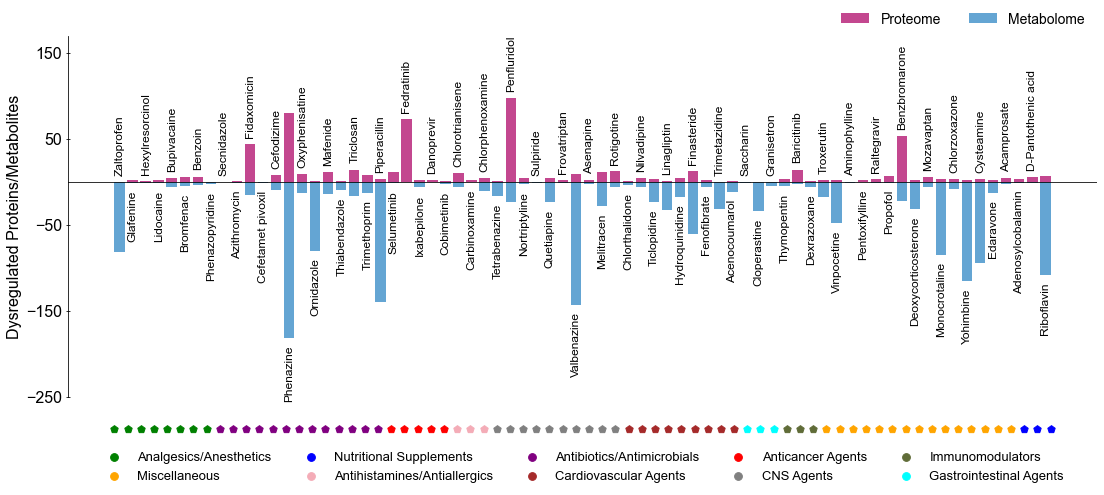

In [24]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'
df = merged_df2

# Define the dictionary mapping categories to colors
category_colors = {
    'Analgesics/Anesthetics': 'green',
    'Miscellaneous': 'orange',
    'Nutritional Supplements': 'blue',
    'Antihistamines/Antiallergics':'#f4acb7' ,
    'Antibiotics/Antimicrobials': 'purple',
    'Cardiovascular Agents': 'brown',
    'Anticancer Agents': 'red',
    'CNS Agents': 'gray',
    'Immunomodulators': '#606c38',
    'Gastrointestinal Agents': 'cyan'
}

# Create subplots - 2 subplots in 1 column (vertical layout)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,7), gridspec_kw={'height_ratios': [14, 1]})
plt.rcParams['font.family'] = 'Arial'

# Reduce space between subplots, allow overlap
plt.subplots_adjust(hspace= - 0.1)

# Plot for Proteome and Metabolome on the first subplot (ax1)
ax1.bar(df.index, df['sig_pro_bhnum'], width=0.8, align='center', label='Proteome', color='#C3478F')
ax1.bar(df.index, -df['sig_meta_bhnum'], width=0.8, align='center', label='Metabolome', color='#64A5D3')

# Add rotated text labels for 'sig_pro_bhnum' (positive values) in ax1
for i in range(0, len(df), 2):
    ax1.text(i, df['sig_pro_bhnum'].iloc[i] + 8, df.index[i], ha='center', va='bottom', rotation=90, fontsize=12)
for i in range(1, len(df), 2):
    ax1.text(i, -df['sig_meta_bhnum'].iloc[i] - 8, df.index[i], ha='center', va='top', rotation=90, fontsize=12)

# Customize ax1 (bar plot)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.axhline(0, color='black', linewidth=0.8)
ax1.set_ylim(-250, 170)
ax1.set_yticks(range(-250, 171, 100))
ax1.set_ylabel('Dysregulated Proteins/Metabolites', fontsize=16)
ax1.set_xticks([])  # Remove x-ticks for the bar plot
ax1.legend(fontsize=14, loc='upper right',frameon=False,ncol=2,bbox_to_anchor=(1, 1.1))
ax1.tick_params(axis='y', labelsize=16, labelcolor='black', direction='inout')
# Scatter plot for category colors on the second subplot (ax2)
for i in range(len(df)):
    category = df['cato'].iloc[i]
    circle_color = category_colors.get(category, 'black')  # Default to 'black' if not found
    ax2.scatter(i, 0, color=circle_color, marker = 'p',s=60, zorder=5)

# Customize ax2 (scatter plot)
ax2.set_ylim(-1, 1)  # Keep the scatter plot tight in height
ax2.set_yticks([])  # Remove y-ticks
ax2.set_xticks([])  # Remove x-ticks
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

# Manually adjust the position of the legend for ax2
scatter_proxies = [ax2.scatter([], [], color=color, s=60) for color in category_colors.values()]
ax2.legend(scatter_proxies, category_colors.keys(), fontsize=13, loc='upper center', ncol=5, frameon=False,
           bbox_to_anchor=(0.5, 0.1))

# Adjust layout
plt.tight_layout()
# plt.savefig(f'{figure_save_path}/barplot_drugs_dys.svg', dpi=800, bbox_inches='tight')
plt.show()


In [103]:
# df = merged_df

# plt.figure(figsize=(16, 6))
# plt.rcParams['font.family'] = 'Arial'

# # Plot for column 'sig_pro_bhnum' (positive values)
# plt.bar(df.index, df['sig_pro_bhnum'], width=0.8, align='center', label='Proteome',color='#C3478F')
# plt.bar(df.index, -df['sig_meta_bhnum'], width=0.8, align='center', label='Metabolome',color='#64A5D3')

# # Add rotated text labels for 'sig_pro_bhnum' (positive values)
# for i in range(0, len(df), 2):
#     plt.text(i, df['sig_pro_bhnum'].iloc[i] + 8, df.index[i], ha='center', va='bottom', rotation=90,fontsize = 12)
# for i in range(1, len(df), 2):
#     plt.text(i, -df['sig_meta_bhnum'].iloc[i] - 8, df.index[i], ha='center', va='top', rotation=90,fontsize = 12)
     
# # Remove plot frame
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
# # plt.gca().spines['left'].set_visible(False)
# plt.gca().spines['bottom'].set_visible(False)

# # Add a horizontal line at y=0 for reference
# plt.axhline(0, color='black', linewidth=0.8)

# # plt.scatter(range(len(df)), [-290]*len(df), color='black', s=60, zorder=5)

# # # Set y-axis limits and custom ticks
# plt.ylim(-250, 170)  # Adjust the limits of the y-axis
# plt.yticks(range(-250, 171, 100))  
# # plt.xlabel('X values (Index)')
# plt.ylabel('dysregulated proteins/metabolites',fontsize = 16)
# # Remove x and y ticks
# plt.xticks([])
# plt.yticks(fontsize = 16)

# # Display the legend and the plot
# plt.legend(fontsize = 14,loc= 'upper right')
# plt.show()


In [401]:
# plt.figure(figsize=(13, 6))
# plt.rcParams['font.family'] = 'Arial'

# # Plot for column 'sig_pro_num' (positive values)
# plt.bar(df.index, df['sig_pro_num'], width=0.8, align='center', label='Proteome',color='#C3478F')
# plt.bar(df.index, -df['sig_meta_num'], width=0.8, align='center', label='Metabolome',color='#64A5D3')

# # Add rotated text labels for 'sig_pro_num' (positive values)
# for i in range(0, len(df), 2):
#     plt.text(i, df['sig_pro_num'].iloc[i] + 10, df.index[i], ha='center', va='bottom', rotation=90)
# for i in range(1, len(df), 2):
#     plt.text(i, -df['sig_meta_num'].iloc[i] - 10, df.index[i], ha='center', va='top', rotation=90)
     
# # Remove plot frame
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
# # plt.gca().spines['left'].set_visible(False)
# plt.gca().spines['bottom'].set_visible(False)

# # Add a horizontal line at y=0 for reference
# plt.axhline(0, color='black', linewidth=0.9)



# # plt.xlabel('X values (Index)')
# plt.ylabel('Dysregulated Proteins/Metabolites',fontsize = 14)
# # Remove x and y ticks
# plt.xticks([])
# plt.yticks(fontsize = 14)

# # Display the legend and the plot
# plt.legend(fontsize = 12)
# plt.show()


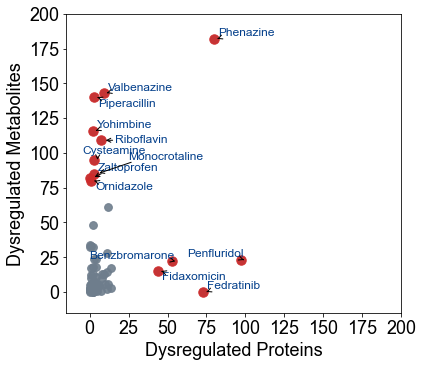

In [25]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

plt.figure(figsize=(6, 5.5))
plt.rcParams['font.family'] = 'Arial'

# Scatter plot using 'sig_pro_num' as X and 'sig_meta_num' as Y
plt.scatter(df['sig_pro_bhnum'], df['sig_meta_bhnum'], color='#6E7D8C', s=60, alpha=0.9)

# Scatter plot for labeled points with different color
condition = (df['sig_pro_bhnum'] > 40) | (df['sig_meta_bhnum'] > 70)
plt.scatter(df['sig_pro_bhnum'][condition], df['sig_meta_bhnum'][condition], color='#CE2B2B', s=90, alpha=0.9)

# Add text labels for points that meet the condition
texts = []
for i in range(len(df)):
    if df['sig_pro_bhnum'].iloc[i] > 40 or df['sig_meta_bhnum'].iloc[i] > 70:
        texts.append(plt.text(df['sig_pro_bhnum'].iloc[i]+2, df['sig_meta_bhnum'].iloc[i], df.index[i],
                              ha='left', va='bottom', fontsize=12, color='#023e8a'))

# Adjust the text to prevent overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black'))

# Customize ticks and labels
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.ylim(-15, 200)
plt.xlim(-15, 200)
plt.xlabel('Dysregulated Proteins', fontsize=18)
plt.ylabel('Dysregulated Metabolites', fontsize=18)
# plt.savefig(f'{figure_save_path}/drug_response_multiomic.svg', dpi=800, bbox_inches='tight')
# Show the plot
plt.show()


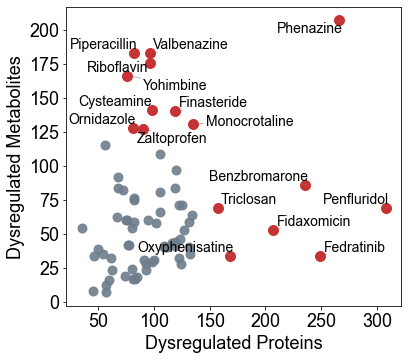

In [31]:
import matplotlib.pyplot as plt
from adjustText import adjust_text


plt.figure(figsize=(6, 5.5))
plt.rcParams['font.family'] = 'Arial'

# Scatter plot using 'sig_pro_num' as X and 'sig_meta_num' as Y
plt.scatter(df['sig_pro_num'], df['sig_meta_num'], color='#6E7D8C', s=80, alpha=0.9)

# Highlight and re-plot labeled points in a different color
condition = (df['sig_pro_num'] > 150) | (df['sig_meta_num'] > 125)
plt.scatter(df.loc[condition, 'sig_pro_num'],
            df.loc[condition, 'sig_meta_num'],
            color='#CE2B2B', s=100, alpha=0.9)

# Collect text artists for adjustText
texts = []
for idx, row in df.loc[condition].iterrows():
    texts.append(plt.text(row['sig_pro_num'] + 3,
                          row['sig_meta_num'],
                          idx,
                          ha='left', va='bottom',
                          fontsize=14, color='black'))

# Automatically adjust text positions
adjust_text(texts,
            only_move={'points':'y', 'texts':'y'},
            arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

# Final formatting
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Dysregulated Proteins', fontsize=18)
plt.ylabel('Dysregulated Metabolites', fontsize=18)
plt.savefig(f'{figure_save_path}/drug_response_multiomic_no_bhcorrection.svg', dpi=800, bbox_inches='tight')
plt.show()

# multiome matrix preparation 

In [10]:
df_meta = pd.read_csv(r'C:\Users\jiangy5\Box\SMAD PROJECT\new_druganalysis\metabolome\test\files\metabolome_after_Normalization and imputation and BC2.csv',index_col = 0)
df_pro =  pd.read_csv(r'C:\Users\jiangy5\Box\SMAD PROJECT\new_druganalysis\proteome\test\files\proteome_after_Normalization and imputation and BC.csv',index_col = 0)

In [11]:
# calculate mean values of 6 duplicates 
mean_meta = pd.read_csv(f'{meta_file_read_path}\metabolome_mean.csv',index_col = 0)
mean_pro  = pd.read_csv(f'{pro_file_read_path}\proteome_mean.csv',index_col = 0)

In [12]:
# take log2 to the mean dataset to make it more normal distributed
log_meta  = np.log2(mean_meta*100) 
log_pro   = np.log2(mean_pro*1000) 

In [13]:
#  up and down calculation by all drugs subtract DMSO column 
heatmap_meta = pd.read_csv(f'{meta_file_read_path}\metabolome_up_down.csv',index_col = 0)
heatmap_pro  = pd.read_csv(f'{pro_file_read_path}\proteome_up_down.csv',index_col = 0)
# heatmap_meta = pd.read_csv(r'C:\Users\jiangy5\Box\SMAD PROJECT\new_druganalysis\metabolome\test\files\metabolome_up_down_scaled.csv',index_col = 0)
# heatmap_pro  = pd.read_csv(r'C:\Users\jiangy5\Box\SMAD PROJECT\new_druganalysis\proteome\test\files\proteome_up_down_scaled.csv',index_col = 0)

In [14]:
# DatasetNormalizeDf.standardscaler(heatmap_pro.T).T

In [15]:
# heatmap_meta.index = [str(item) for item in range(len(heatmap_meta))]

In [16]:
heatmap_multi = pd.concat([heatmap_meta, heatmap_pro], axis=0)
mean_multi    = pd.concat([mean_meta, mean_pro], axis=0)
log_multi     = pd.concat([log_meta, log_pro], axis=0)

In [17]:
# log_meta_updown = log_meta.sub(log_meta.iloc[:, 0], axis=0).iloc[:,1:]
# log_pro_updown  = log_pro.sub(log_pro.iloc[:, 0], axis=0).iloc[:,1:]
# # log_meta_updown


In [18]:
#  up and down calculation by all drugs subtract DMSO column to the dataset after take log2
dfe = log_multi 
updown_multi = dfe.sub(dfe.iloc[:, 0], axis=0).iloc[:,1:]

In [19]:
updown_multi

DFO  Acamprosate  Acenocoumarol  \
1-aminocyclopropane-1-carboxylic acid  0.246573     0.603693       0.181567   
1-aminocyclopropanecarboxylate        -0.103425     0.066514       0.291304   
proline                                0.834857    -0.143302       0.101749   
indoline                               0.457173    -0.109066      -0.093393   
2,6-xylidine                           0.757345     0.125193       0.205934   
...                                         ...          ...            ...   
SUMO4                                 -0.013419     0.049916      -0.036726   
SRSF6                                 -0.186744    -0.099918      -0.044323   
SEP11                                 -0.044324    -0.032134      -0.089582   
HBG2                                   0.078050     0.145259      -0.144850   
H2B1L                                  0.110271     0.044642       0.145781   

                                       Adenosylcobalamin  Aminophylline  \
1-aminocyclopropane-1-carboxylic acid           0.283705       0.542164   
1-aminocyclopropanecarboxylate                 -0.784358       0.156219   
proline                                         0.582299      -0.211243   
indoline                                        0.285082      -0.187646   
2,6-xylidine                                    0.485600       0.101506   
...                                                  ...            ...   
SUMO4                                           0.063257      -0.071241   
SRSF6                                          -0.038457      -0.132248   
SEP11                                           0.007672      -0.072613   
HBG2                                           -0.113435      -0.199101   
H2B1L                                           0.071757      -0.017511   

                                       Asenapine  Azithromycin  Baricitinib  \
1-aminocyclopropane-1-carboxylic acid   0.254458     -0.448922     0.670184   
1-aminocyclopropanecarboxylate          0.352240      0.745042     0.433640   
proline                                 0.451362     -0.060769     0.196576   
indoline                               -0.073622     -0.130449    -0.152071   
2,6-xylidine                            0.172697      0.036505    -0.365570   
...                                          ...           ...          ...   
SUMO4                                   0.068347      0.023480    -0.006354   
SRSF6                                  -0.016535      0.044131    -0.022438   
SEP11                                   0.017357      0.081555     0.000769   
HBG2                                   -0.144890      0.093725     0.055770   
H2B1L                                  -0.002194      0.118948     0.051060   

                                       Benzbromarone   Benzoin  ...  \
1-aminocyclopropane-1-carboxylic acid       0.556150 -0.116215  ...   
1-aminocyclopropanecarboxylate              0.137667  0.153482  ...   
proline                                    -0.102298 -0.036129  ...   
indoline                                    0.078611 -0.043945  ...   
2,6-xylidine                                0.087966  0.370911  ...   
...                                              ...       ...  ...   
SUMO4                                      -0.095738  0.058041  ...   
SRSF6                                      -0.042434 -0.014584  ...   
SEP11                                      -0.036188  0.031825  ...   
HBG2                                        0.018511 -0.105056  ...   
H2B1L                                       0.060048 -0.009704  ...   

                                       Thymopentin  Ticlopidine  Triclosan  \
1-aminocyclopropane-1-carboxylic acid     0.572960     0.378020   0.412127   
1-aminocyclopropanecarboxylate            0.522990     0.098014   0.101313   
proline                                  -0.188299     0.327116   0.265305   
indoline                                 -0.298591    -0.041150  -0.113197   
2,

In [20]:
# dffold = mean_multi
# fold_multi = dffold.div(dffold.iloc[:, 0], axis=0).iloc[:,1:]
# fold_multi

In [21]:
# updown_multi.apply(lambda x: x / np.abs(x).max(), axis=1)

In [22]:
#  normalization class

from sklearn.preprocessing import StandardScaler

class DatasetNormalizeDf:
    
    @staticmethod 
    def divided_by_a_protein(df, row_index = '2/sp|Q16777|H2A2C_HUMAN/sp|Q6FI13|H2A2A_HUMAN'):
        '''Divides the DataFrame by a specific protein row index,
        columns as treatments and rows as proteins'''
        
        # Dividing the entire DataFrame by the chosen row
        normalized_df = df.div(df.loc[row_index], axis=1)
                               
        return normalized_df  
    
    @staticmethod      
    def divided_by_total_counts(df):
        '''Divides each column in the DataFrame by the total sum of that column,
        columns as treatments and rows as proteins'''
               
        column_sums = df.sum()
        normalized_df = df.div(column_sums, axis=1)
        
        return normalized_df
    
    def standardscaler(df):     
        '''apply standard normalization to a dataframe, 
        columns as treatments and rows as proteins'''
        # # Initialize the StandardScaler
        scaler = StandardScaler()
        # Fit and transform the data according to rows
        scaled_data = scaler.fit_transform(df)
        normalized_df = pd.DataFrame(scaled_data, index=df.index, columns=df.columns)
        return normalized_df
        
# abs max normalize to the rows in a dataframe
def max_abs_normalize(row):
    max_abs = row.abs().max()
    if max_abs == 0:
        return row
    return row / max_abs

In [23]:
# function to plot UMAP
# Function to determine label
def get_label(index):
    for name in namestrings:
        if name in index:
            return name
    return 'Others'

# function to plot UMAP, Z-score normalization applied in the function 
import umap 
def plot_umap(df, namestring = ['1'], figuretitle = 'UMAP'):
    plt.rcParams['font.family'] = 'Arial'
    reducer = umap.UMAP(n_neighbors=15, n_components=2, random_state=42)
    scaler = StandardScaler()
    # Fit and transform the data according to rows
    df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
    embedding = reducer.fit_transform(df_scaled)   
    # Step 3: Create a new DataFrame for UMAP results
    umap_df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'], index=df.index)
    
    # Step 4: Add non-numeric labels to the new DataFrame
#     umap_df['Label'] = df.index.map(lambda x: namestring1 if namestring1 in x else
#                                               namestring2 if namestring2 in x else
#                                               namestring3 if namestring3 in x else 'others')
    umap_df['Label'] = df.index.map(get_label)

    # Step 5: Plot using the new DataFrame
    #palette = {namestring: 'red', 'others': 'grey'}
    #palette = color_dict
    plt.figure(figsize=(5, 4))
    sns.scatterplot(x='UMAP1', y='UMAP2', hue='Label', data=umap_df, s=60, alpha=0.8, legend=True)
    plt.title(figuretitle,fontsize=20)
    plt.xlabel('UMAP 1',fontsize=20)
    plt.ylabel('UMAP 2',fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    # plt.savefig(f'{figure_save_path}/{figuretitle}.svg',dpi=800,bbox_inches='tight')
    plt.show()

# plot heatmap for whole dataset

In [24]:
dual_raw_multiome = pd.concat([df_pro, df_meta], axis=0)    # stitch raw values with replicates together for multiome 

In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
def normalize_dataframe(df, method='zscore', axis=0):
    """
    Normalize a DataFrame by rows or columns.
    
    Parameters:
    - df (pd.DataFrame): Input DataFrame to normalize.
    - method (str): Normalization method. Options are:
        'zscore' (standardization using z-score)
        'minmax' (normalization to range [0, 1])
    - axis (int): Axis to normalize along. 0 for columns, 1 for rows.
    
    Returns:
    - pd.DataFrame: Normalized DataFrame.
    """
    if method not in ['zscore', 'minmax']:
        raise ValueError("Method must be 'zscore' or 'minmax'")
    
    scaler = StandardScaler() if method == 'zscore' else MinMaxScaler()
    
    if axis == 0:  # Normalize by columns
        normalized = scaler.fit_transform(df)
    elif axis == 1:  # Normalize by rows
        normalized = scaler.fit_transform(df.T).T
    else:
        raise ValueError("Axis must be 0 (columns) or 1 (rows)")
    
    return pd.DataFrame(normalized, index=df.index, columns=df.columns)


In [26]:
# clustered heatmap function

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def plot_clusterheatmap(dfheatmap, low=-2, high=2):
    # Define custom color map
    colors = ["#437EB8", "#8EBBE7", "#D8E2EB", "white", "#D8E2EB", "#EB6CB6", "#E72998"]
    n_bins = 12  # Number of bins in the color map
    cmap_name = "custom_diverging"
    custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

    # Set font family
    plt.rcParams['font.family'] = 'Arial'

    # Create the heatmap with the custom color map, figure size, and hidden dendrograms
    ax = sns.clustermap(
        dfheatmap,
        annot=False,
        cmap=custom_cmap,
        cbar=True,
        vmin=low,
        vmax=high,
        figsize=(21, 13),  # Set the figure size here
        row_cluster=True,  # Enable row clustering
        col_cluster=True,  # Enable column clustering
        dendrogram_ratio=(.001, .001),  # Minimize the dendrogram size
        tree_kws={'linewidths': 0},  # Make dendrogram lines invisible
        cbar_kws={
            'orientation': 'vertical',  # 'horizontal' or 'vertical'
            # 'shrink': 0.6,  # Adjusts the size of the color bar
            'aspect': 40,  # Adjusts the length-to-width ratio of the color bar
            'pad': 0.05,  # Padding between the heatmap and the color bar
            'label': 'Color Scale'  # Label for the color bar
        },
        cbar_pos=(-0.06, 0.8, 0.03, 0.2)  # (left, bottom, width, height)
    )
    
    # Customize the color bar font
    cbar = ax.ax_cbar  # Access the color bar axis
    cbar.set_ylabel("Color Scale", fontsize=18, fontfamily='Arial')  # Set the label font size and family
    cbar.tick_params(labelsize=18)  # Set tick label size
    for tick_label in cbar.yaxis.get_ticklabels():
        tick_label.set_fontfamily('Arial')  # Set tick label font family
    
    # Hide x and y tick labels
    ax.ax_heatmap.set_xticklabels([])
    ax.ax_heatmap.set_yticklabels([])

    # Hide x-axis ticks
    ax.ax_heatmap.tick_params(axis='both', which='both', length=0)

    # Optional: Uncomment to save the plot
    # plt.savefig('clustered_heatmap.svg', dpi=800, bbox_inches='tight')
    # Show the plot
    plt.show()


In [30]:
df_multiome_duplis_ss  = normalize_dataframe(dual_raw_multiome, method='zscore', axis=1)
heatmap_draw = df_multiome_duplis_ss.copy()

In [31]:
heatmap_draw.index = range(heatmap_draw.shape[0])

In [32]:
# col_colors = pd.Series(list_name_types).map(color_dict).tolist()
# colors_transposed = dict(zip(df_multiome_duplis_ss.index, col_colors))

In [33]:
# dfheatmap = normalize_dataframe(dual_raw_multiome, method='zscore', axis=1)
# plot_clusterheatmap(dfheatmap.T, low=-2, high=2)

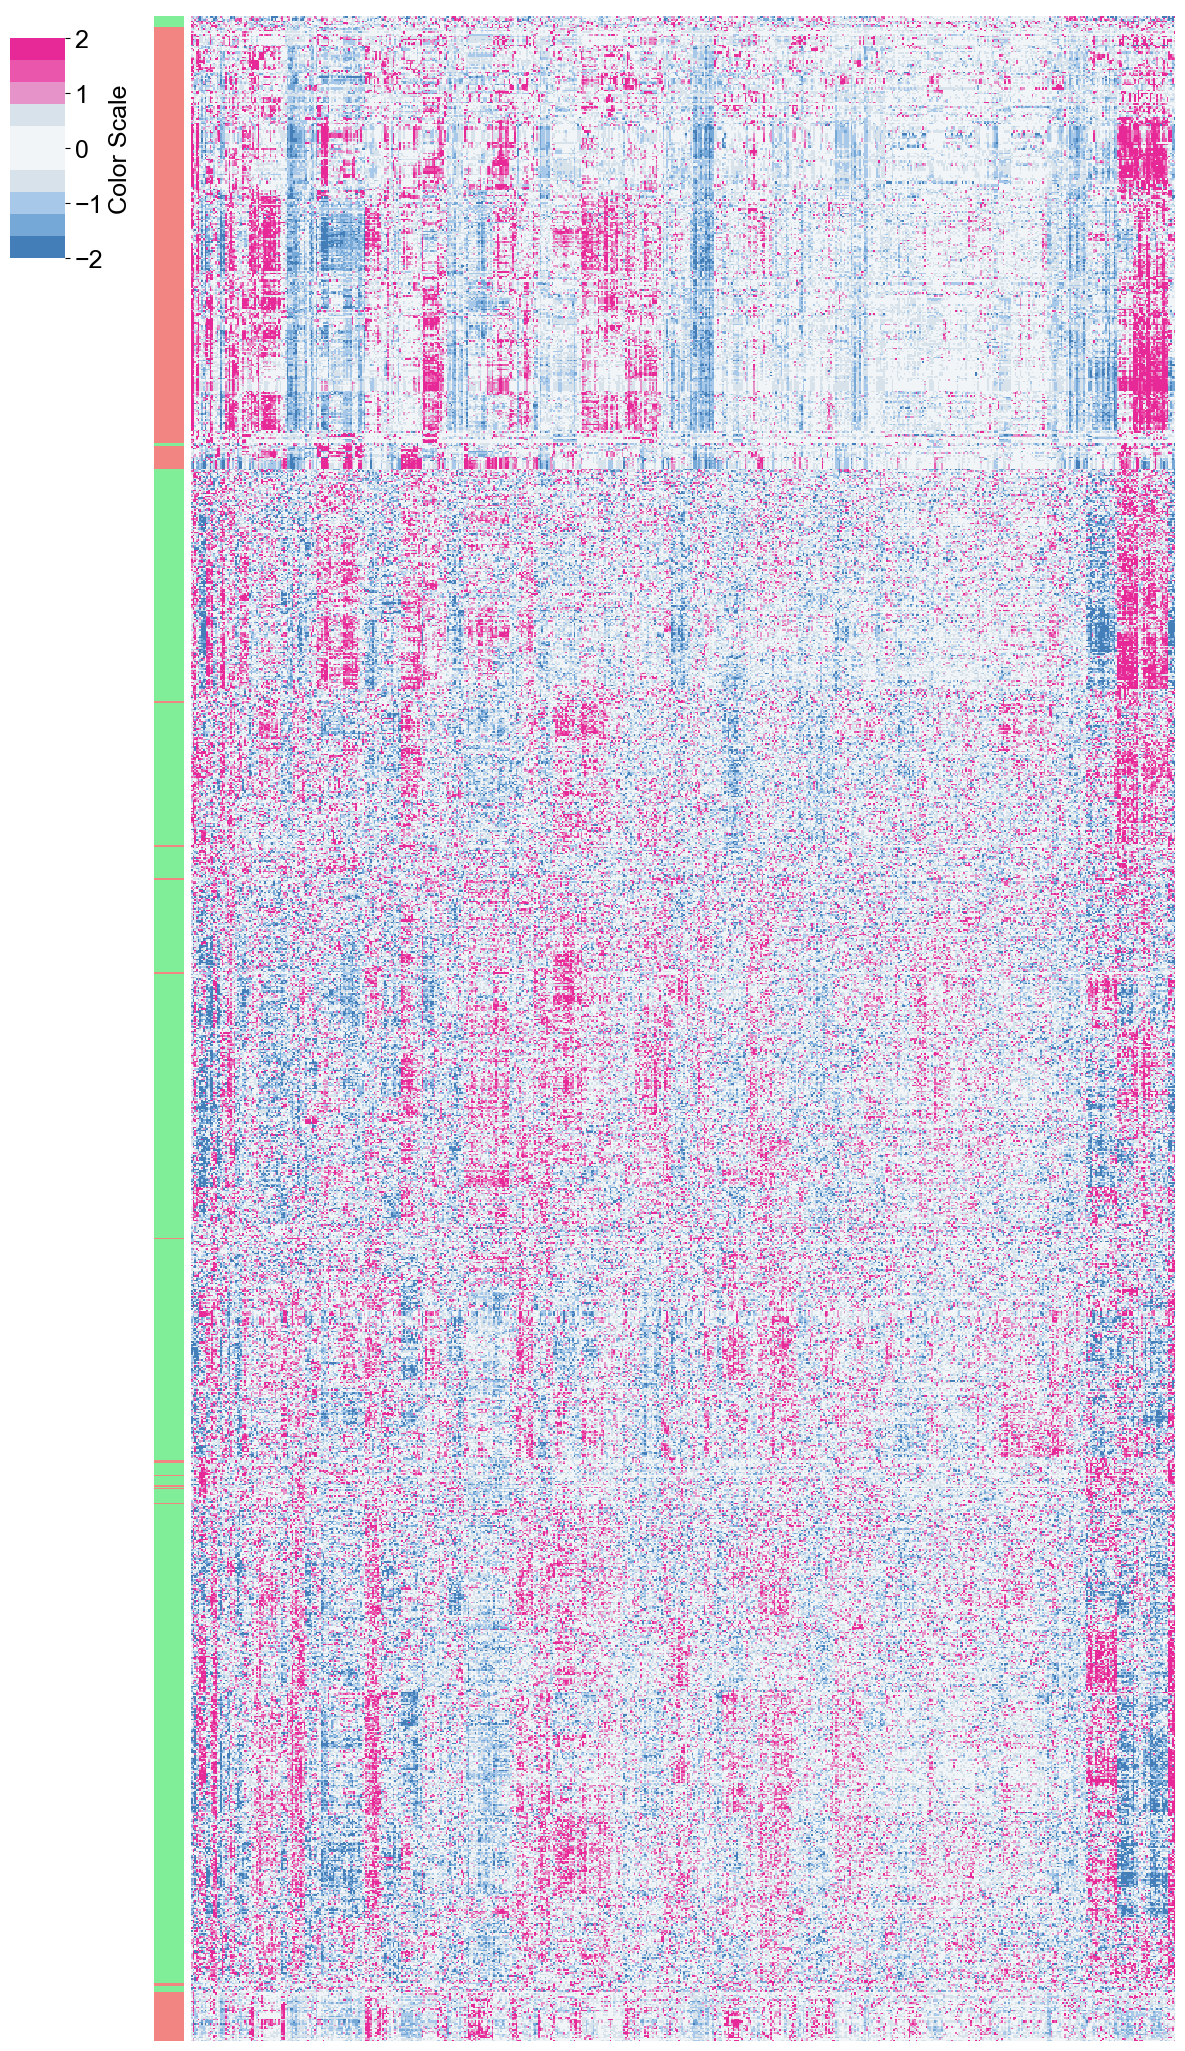

In [34]:
# plot heatmap for the whole dataset
list_name_types = ['yes'] * df_pro.shape[0] + ['no'] * df_meta.shape[0]
colors = ["#437EB8", "#8EBBE7", "#D8E2EB", "white", "#D8E2EB", "#EB6CB6", "#E72998"]
n_bins = 10  # Number of bins in the color map
cmap_name = "custom_diverging"
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)
color_dict = {"yes": '#80ed99', "no": '#f28482'} 
row_colors = pd.Series(list_name_types).map(color_dict).tolist()
row_colors_transposed = dict(zip(heatmap_draw.index, row_colors))
# Set font family
plt.rcParams['font.family'] = 'Arial'

# Create the heatmap with the custom color map, figure size, and hidden dendrograms
ax = sns.clustermap(
    heatmap_draw, annot=False, cmap=custom_cmap, vmin=-2, vmax=2,
    row_colors=heatmap_draw.index.map(row_colors_transposed),
    figsize=(11, 22),  # Set the figure size here
    row_cluster=True,  # Enable row clustering
    col_cluster=True,  # Enable column clustering
    dendrogram_ratio=(.001, .001),  # Minimize the dendrogram size
    tree_kws={'linewidths': 0},  # Make dendrogram lines invisible
    cbar_kws={
        'orientation': 'vertical',  # 'horizontal' or 'vertical'
        'aspect': 40,  # Adjusts the length-to-width ratio of the color bar
        'pad': 0.05,  # Padding between the heatmap and the color bar
        'label': 'Color Scale'  # Label for the color bar
    },
    cbar_pos=(-0.11, 0.88, 0.05, 0.1)  # (left, bottom, width, height)
)
# Customize the color bar font
cbar = ax.ax_cbar  # Access the color bar axis
cbar.set_ylabel("Color Scale", fontsize=18, fontfamily='Arial')  # Set the label font size and family
cbar.tick_params(labelsize=18)  # Set tick label size
for tick_label in cbar.yaxis.get_ticklabels():
    tick_label.set_fontfamily('Arial')  # Set tick label font family
# Hide x and y tick labels
ax.ax_heatmap.set_xticklabels([])
ax.ax_heatmap.set_yticklabels([])
# Hide x-axis ticks
ax.ax_heatmap.tick_params(axis='both', which='both', length=0)
# Show the plot
plt.show()


# define input multiome matrix 
# type1. dysregulated multiome matrix 
# type2. dysregulated multiome matrix with log2
# type3. raw multiome matrix


In [35]:
# heatmap_multi.apply(max_abs_normalize, axis=1)

In [160]:
# input_multi_df = mean_multi
# input_multi_df = mean_multi_norm
# input_multi_df = log_multi
# input_multi_df = updown_multi.apply(zscore, axis=1)
input_multi_df = updown_multi
# input_multi_df = mean_multi.apply(zscore, axis=1)
# input_multi_df = fold_multi
# input_multi_df = updown_multi.apply(lambda x: x / np.abs(x).max(), axis=1)
# input_multi_df = heatmap_multi

In [84]:
def cal_cosine_simi(df = input_multi_df):
    similarity_matrix = pd.DataFrame(index=df.columns, columns=df.columns)
    # 对DataFrame的每对列进行两两比较
    for col1 in df.columns:
        for col2 in df.columns:
            similarity_matrix.loc[col1, col2] = 1 - cosine(df[col1], df[col2])
    similarity_matrix = similarity_matrix.astype(float)
    return similarity_matrix

In [85]:
# check distribution of the first column 
# plt.hist(input_multi_df.iloc[:,0], bins=100, edgecolor='black')

In [86]:
# input_multi_df.iloc[:,:20].boxplot()

In [87]:
# input_multi_df.iloc[:20,:].T.boxplot()   

# clustering analysis 

In [88]:
# namestrings = ['DMSO','DFO']
# plot_umap(updown_multi.T, namestring = namestrings)

In [89]:
# namestrings = ['DMSO','DFO']
# plot_umap(heatmap_multi.T, namestring = namestrings)

# K-means clustering 

In [103]:
kmean_df = input_multi_df.T.copy() 
kmeans=KMeans(n_clusters=5,random_state=42)
kmeans.fit(kmean_df)
kmean_df['kmeans']=kmeans.labels_
# kmean_df

In [104]:
# get dfs for each cluster
cluster4=kmean_df.loc[kmean_df['kmeans']==4]
cluster3=kmean_df.loc[kmean_df['kmeans']==3]
cluster2=kmean_df.loc[kmean_df['kmeans']==2]
cluster1=kmean_df.loc[kmean_df['kmeans']==1]
cluster0=kmean_df.loc[kmean_df['kmeans']==0]

In [105]:
def Kmeans_clustered_umap_normal(use_df = heatmap_multi.T):
    '''input is a dataframw, with features as columns and samples as rows ''' 
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(use_df)
    # set best K
    best_K = 5
    kmeans = KMeans(n_clusters=best_K, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    data['Cluster'] = labels
    
    # use UMAP
    reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
    embedding = reducer.fit_transform(data_scaled)
    
    umap_df = pd.DataFrame()
    umap_df['UMAP1'] = embedding[:, 0]
    umap_df['UMAP2'] = embedding[:, 1]
    umap_df['Cluster'] = labels
    
    plt.figure(figsize=(7, 6))
    sns.scatterplot(
        x='UMAP1', y='UMAP2',
        hue='Cluster',
        palette='tab10',
        data=umap_df, s=150, alpha=0.8, legend=True)
    plt.xlabel('UMAP 1',fontsize=20)
    plt.ylabel('UMAP 2',fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1),fontsize=16)
    plt.title('UMAP with SS')
    plt.show()
    
def Kmeans_clustered_umap_no_normal(use_df = heatmap_multi.T):
    '''input is a dataframw, with features as columns and samples as rows ''' 
    # scaler = StandardScaler()
    data_scaled = use_df.copy()
    # set best K
    best_K = 5
    kmeans = KMeans(n_clusters=best_K, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    data['Cluster'] = labels
    
    # use UMAP
    reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
    embedding = reducer.fit_transform(data_scaled)
    
    umap_df = pd.DataFrame()
    umap_df['UMAP1'] = embedding[:, 0]
    umap_df['UMAP2'] = embedding[:, 1]
    umap_df['Cluster'] = labels
    
    plt.figure(figsize=(7, 6))
    sns.scatterplot(
        x='UMAP1', y='UMAP2',
        hue='Cluster',
        palette='tab10',
        data=umap_df, s=150, alpha=0.8, legend=True)
    plt.xlabel('UMAP 1',fontsize=20)
    plt.ylabel('UMAP 2',fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1),fontsize=16)
    plt.title('UMAP without SS')
    plt.show()

In [106]:
Kmeans_clustered_umap_no_normal(use_df = input_multi_df.T)

NameError: name 'data' is not defined

In [107]:
Kmeans_clustered_umap_normal(use_df = input_multi_df.T)

NameError: name 'data' is not defined

In [109]:
# plot_heatmap

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib.colors import LinearSegmentedColormap
def plot_heatmap(dfheatmap = input_multi_df,low=-4, high=4):
    
    plt.rcParams['font.family'] = 'Arial'
    colors = ["#437EB8","#8EBBE7","#D8E2EB","white", "#D8E2EB","#EB6CB6","#E72998"]
    n_bins =10 # Number of bins in the color map
    cmap_name = "custom_diverging"
    custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

    # Create the heatmap with the custom color map
    plt.figure(figsize=(15, 8))
    ax = sns.heatmap(dfheatmap, annot=False, cmap=custom_cmap, cbar=True, vmin=low, vmax = high,
                     cbar_kws={"shrink": 0.2})
    ax.set_xticks([])
    # # Set the color bar ticks and labels
    # cbar = ax.collections[0].colorbar
    # cbar.set_ticks([-3, -2, -1, 0, 1, 2, 3])
    # cbar.set_ticklabels(['-3', '-2', '-1', '0', '1', '2', '3'])

    # Set the title and labels with custom font size
    # plt.title('Scaled Upregulation and Downregulation Heatmap', fontsize=16)
    plt.xlabel('Proteome', fontsize=16)
    plt.ylabel('Drug Candidates', fontsize=16)
    plt.xticks(rotation=0, fontsize=8)  # Ensure all x-tick labels are shown
    plt.yticks(fontsize=10)
#     plt.savefig(f'{figure_save_path}/heatmap.svg',dpi=800,bbox_inches='tight')
    # Show the plot
    plt.show()


def plot_clusterheatmap(dfheatmap = input_multi_df, low=-2, high=2):
    # Define custom color map
#     colors = ["#437EB8", "#8EBBE7", "#D8E2EB", "white", "#D8E2EB", "#EB6CB6", "#E72998"]
#     n_bins = 10  # Number of bins in the color map
#     cmap_name = "custom_diverging"
#     custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)
    custom_cmap = "viridis"
    # Create the heatmap with the custom color map
    plt.rcParams['font.family'] = 'Arial'
        # Create the heatmap with the custom color map, figure size, and hidden dendrograms
    ax = sns.clustermap(dfheatmap, annot=False, cmap=custom_cmap, cbar=True, vmin=low, vmax=high,
                        figsize=(21, 9),  # Set the figure size here
                        row_cluster=True,  # Enable row clustering
                        col_cluster=True,  # Enable column clustering
                        dendrogram_ratio=(.001, .001),  # Minimize the dendrogram size
                        tree_kws={'linewidths': 0})  # Make dendrogram lines invisible
#                         cbar_kws={'orientation': 'vertical',  # 'horizontal' or 'vertical'
#                                   'shrink': 20,  # Adjusts the size of the color bar
#                                   'aspect': 50,  # Adjusts the length-to-width ratio of the color bar
#                                   'pad': 0.1,  # Padding between the heatmap and the color bar
#                                   'label': 'Color Scale'  # Label for the color bar
#                                  })
    if ax.cax is not None:
        ax.cax.set_visible(False)
    # ax.ax_heatmap.set_xticklabels([])
    # ax.ax_heatmap.set_yticklabels([])
    ax.ax_heatmap.set_xticklabels(ax.ax_heatmap.get_xticklabels(), rotation=90, fontsize=16)  # Customize x-tick labels
    ax.ax_heatmap.set_yticklabels(ax.ax_heatmap.get_yticklabels(), fontsize=14)  # Customize y-tick labels
    ax.ax_heatmap.tick_params(axis='x', which='both', length=0)
    # plt.savefig(f'{figure_save_path}/_clustered_heatmap.svg', dpi=800, bbox_inches='tight')
    plt.show()

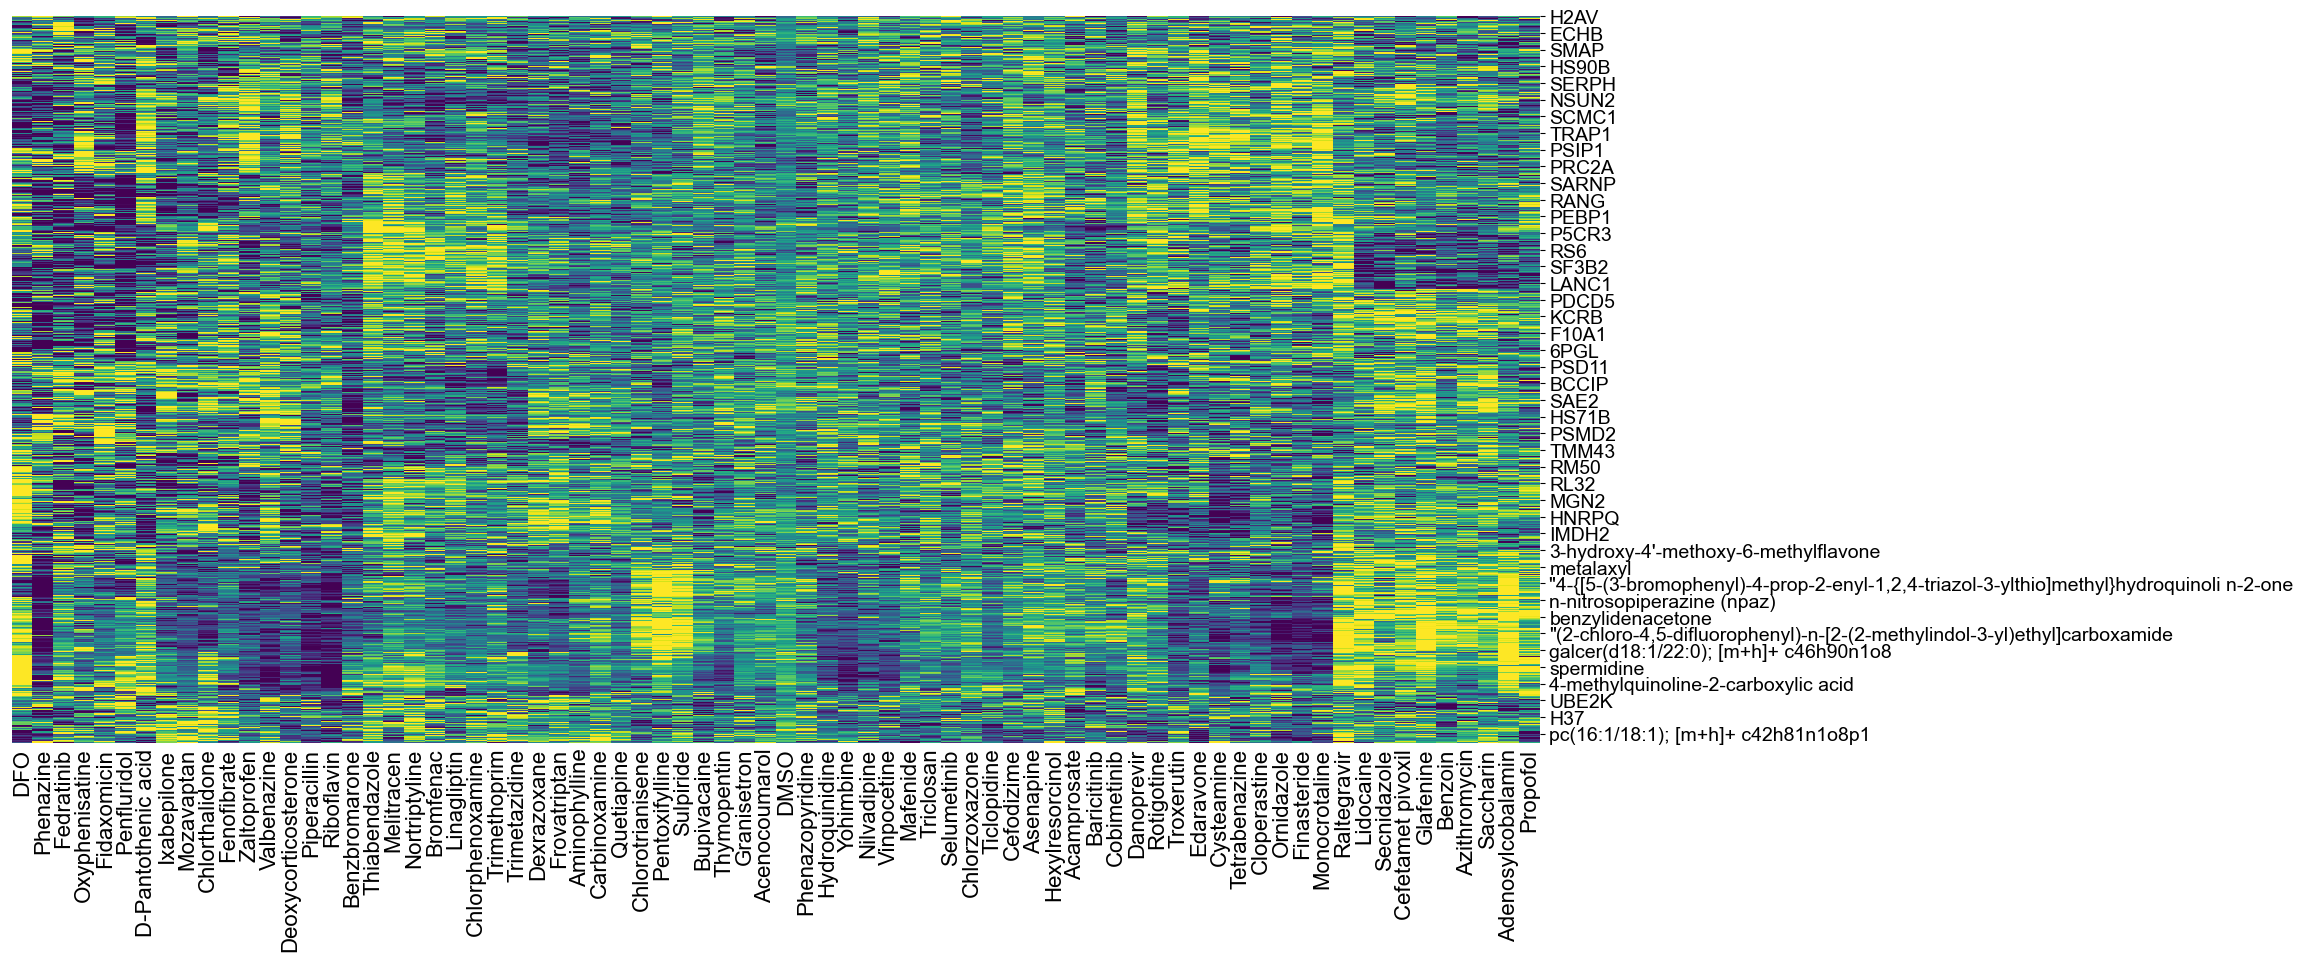

In [110]:
plot_clusterheatmap(dfheatmap = input_multi_df,low=-1.5, high=1.5)

# Correlation analysis

In [165]:
corr_pearson  = input_multi_df.corr(method='pearson')
corr_spearman = input_multi_df.corr(method='spearman')
cosine_similar= cal_cosine_simi(df = input_multi_df )

In [166]:
def plot_boxplot_corr_R(df = corr_pearson, title_name = 'spearman_R_layout_dysregulation_without_log2'):
    plt.style.use('ggplot')
    # 创建箱线图
    plt.figure(figsize=(12, 3.5))
    df.boxplot()
    # 添加标题和
    plt.xticks(rotation = 90)
    plt.ylabel('corr_R')
    plt.title(title_name)
    plt.show()

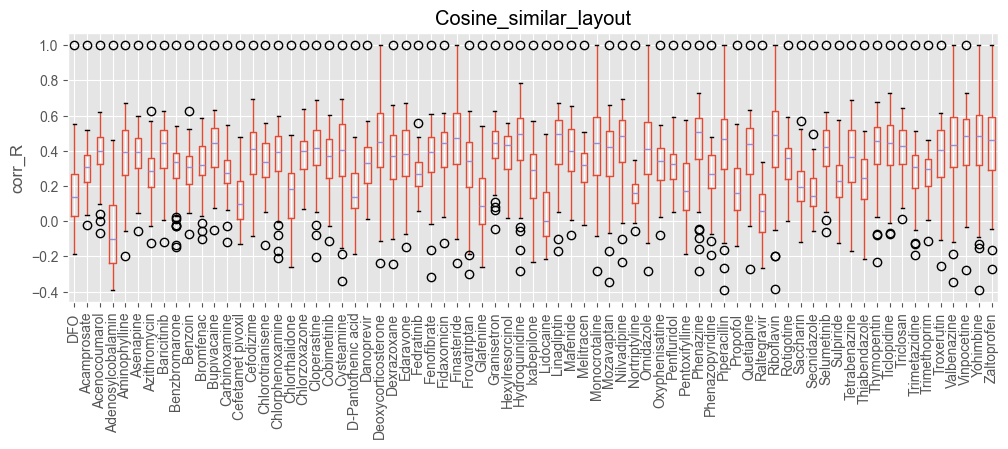

In [167]:
plot_boxplot_corr_R(df = cosine_similar, title_name = 'Cosine_similar_layout')

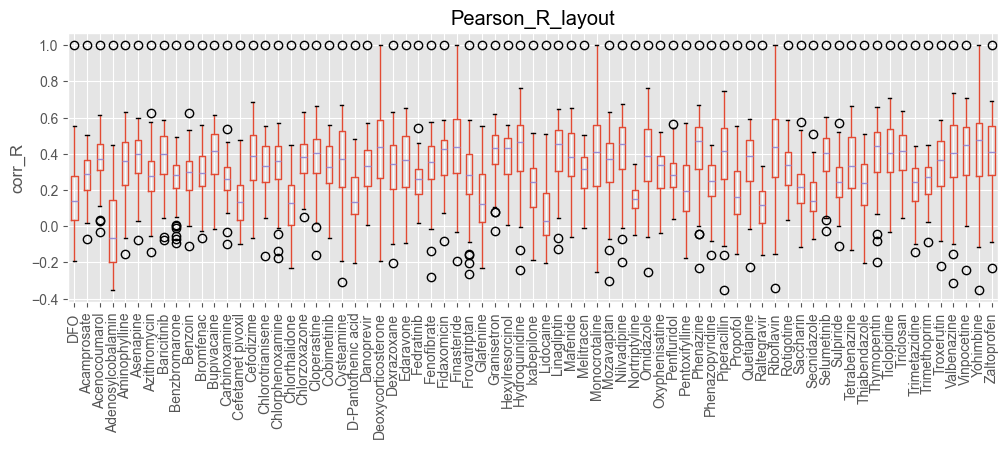

In [168]:
plot_boxplot_corr_R(df = corr_pearson, title_name = 'Pearson_R_layout')

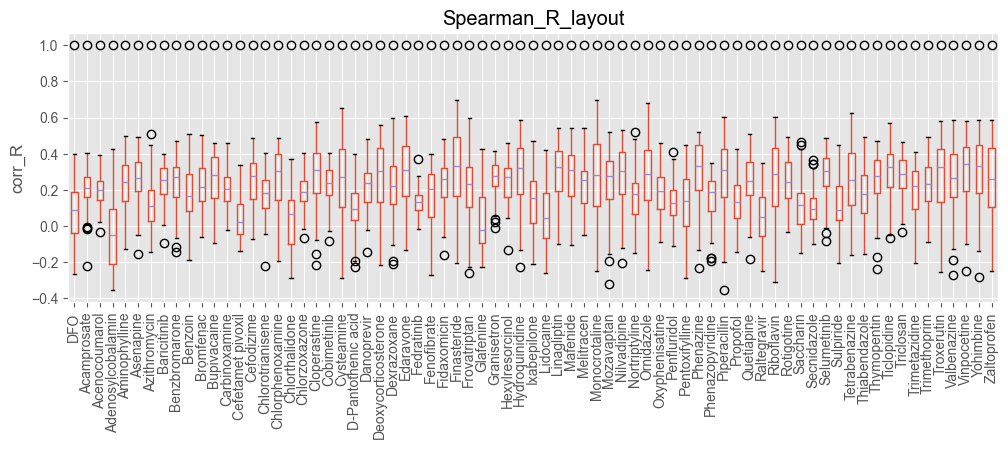

In [169]:
plot_boxplot_corr_R(df = corr_spearman, title_name = 'Spearman_R_layout')

In [170]:
def plot_corr_clustered_heatmap(plot_df = updown_multi.corr(method='pearson'),title_name = "correlation of drugs_pearson"):
    
    ax = sns.clustermap(plot_df, cmap='coolwarm', fmt='.2f', figsize=(12,12),
                            row_cluster=True,  # Enable row clustering
                            col_cluster=True,  # Enable column clustering
                            xticklabels=True, yticklabels=True,
                            dendrogram_ratio=(.1, .09),
                            cbar_pos=(0.02, 0.91, 0.05, 0.05))      
    ax.ax_heatmap.set_yticklabels(ax.ax_heatmap.get_yticklabels(),fontsize=10)
    ax.ax_heatmap.set_xticklabels(ax.ax_heatmap.get_xticklabels(), fontsize=10)
    # ax.ax_heatmap.tick_params(axis='both', which='both', length=0)
    plt.tight_layout() 
    # plt.savefig(f'{figure_save_path}/correlation_drugs_multiomic.svg', dpi=800, bbox_inches='tight')
    plt.title(title_name)
    plt.show()

In [171]:
# plot_corr_clustered_heatmap(plot_df = corr_spearman,title_name = "correlation of drugs_spearman")

In [172]:
# plot_corr_clustered_heatmap(plot_df = corr_pearson,title_name = "correlation of drugs_pearson")

In [173]:
# multi_hm_df = DatasetNormalizeDf.standardscaler(heatmap_multi.T)
# multi_hm_df.T 

In [174]:
# meta = heatmap_meta
# pro = heatmap_pro
# meta.columns = [str(item) for item in range(meta.shape[1])]

# dual = pd.concat([meta,pro], axis=1)

# list_name =  ['no'] * meta.shape[1]+['yes']* pro.shape[1]

# plot network

In [175]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [176]:
# plot joint-plot to check the correlation of selected two drugs 
def plot_jointplot(drug1 = 'DFO', drug2 ='Acamprosate', df = input_multi_df.T): 
    x_value = df[drug1]
    y_value = df[drug2]
    corre1, p_value1 = pearsonr(x_value, y_value)
    corre2, p_value2 = spearmanr(x_value, y_value)
    g0 = sns.jointplot( x = x_value, y = y_value,
                    # xlim = (13,26), ylim = (13,26),
                        kind="reg", 
                    # truncate=False,
                        color="purple", height=6)
    g0.fig.set_size_inches(5.3, 5) 
    g0.ax_joint.tick_params(labelsize=22)
    g0.set_axis_labels(drug1, drug2, fontsize=24)
    print(f"Spearman correlation: {corre2}, p-value: {p_value2}\n",
          f"Pearman correlation: {corre1}, p-value: {p_value1}")
    plt.show()

In [177]:
# cor_matrix_df = corr_df.loc[selected_drugs,selected_drugs]

In [178]:
def plot_network_drugs(cor_matrix_df = corr_pearson, threshold = 0.5, title_name = "corr_network_drugs",fig_size=(15, 15)): 
    # filter low corr
    cor_matrix_filtered = cor_matrix_df.where(abs(cor_matrix_df) >= threshold)
    
    # remove self-correlated
    np.fill_diagonal(cor_matrix_filtered.values, 0)
    
    # Step 3: create edge list
    cor_df = cor_matrix_filtered.stack().reset_index()
    cor_df.columns = ['from', 'to', 'correlation']
    # 过滤掉相关性为0的边
    cor_df = cor_df[cor_df['correlation'] != 0]
    # 如果相关矩阵对称，只保留一半的边
    cor_df = cor_df[cor_df['from'] < cor_df['to']]
    
    # 查看边列表（可选）
    # print(cor_df.head())
    # Step 4: create network
    G = nx.from_pandas_edgelist(cor_df, 'from', 'to', edge_attr='correlation')
    
    # Step 5: visualize 
    # define layout
    plt.figure(figsize=fig_size)  # Use the fig_size parameter
    pos = nx.spring_layout(G, k=0.15, iterations=20, seed=42)  
    # define color and width 
    edges = G.edges(data=True)
    edge_colors = []
    edge_widths = []
    for u, v, data in edges:
        corr = data['correlation']
        if corr > 0:
            edge_colors.append('purple')  # 正相关为紫色
        else:
            edge_colors.append('red')    # 负相关为灰色
        # 根据相关性的绝对值调整边宽度，乘以一个因子以增强可视化效果
        edge_widths.append(abs(corr)*15)
    
    nx.draw_networkx_nodes(G, pos,
                           node_size=1500,
                           node_color='lightblue',
                           edgecolors='black',
                           linewidths=0.9)
    nx.draw_networkx_edges(G, pos,
                           edge_color=edge_colors,
                           width=edge_widths,
                           alpha=0.7)
    nx.draw_networkx_labels(G, pos,
                            font_size=16,
                            font_family='Arial')
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], color='purple', lw=2, label='positive_corr'),
        Line2D([0], [0], color='red', lw=2, label='negative_corr')
    ]
    # plt.legend(handles=legend_elements, loc='upper right')
    
    plt.title(title_name, fontsize=20)
    # remove x axis and y axis
    plt.axis('off')
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
    plt.tight_layout()
    plt.show()

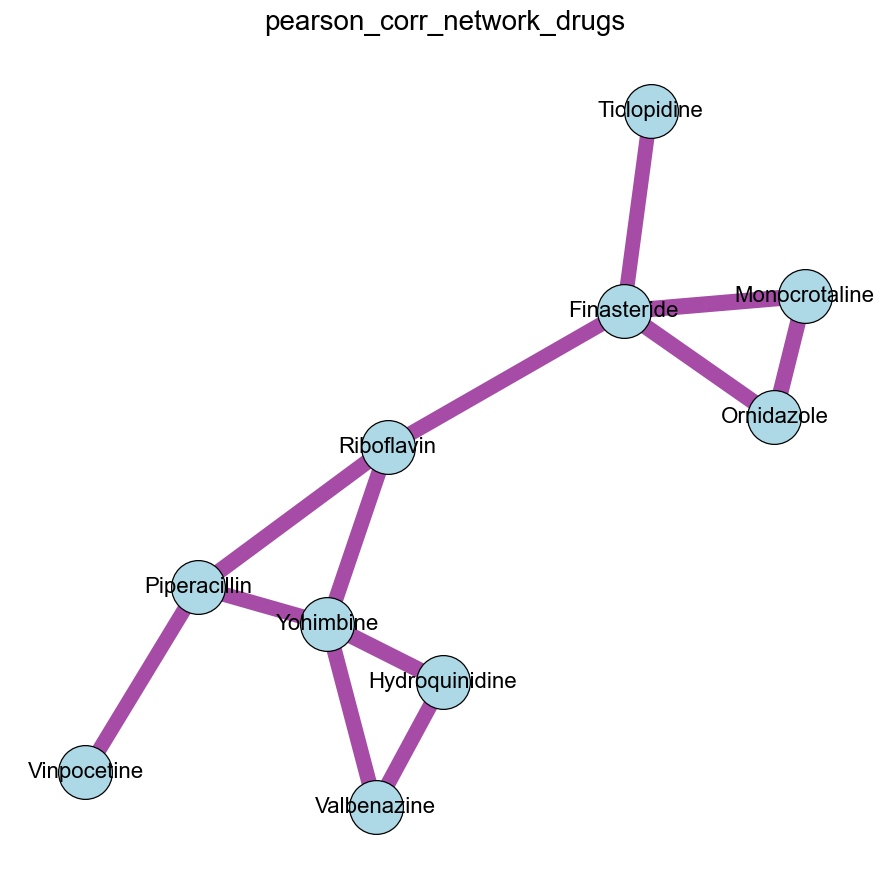

In [181]:
plot_network_drugs(cor_matrix_df = corr_pearson, threshold = 0.7,title_name = "pearson_corr_network_drugs",fig_size=(9, 9))

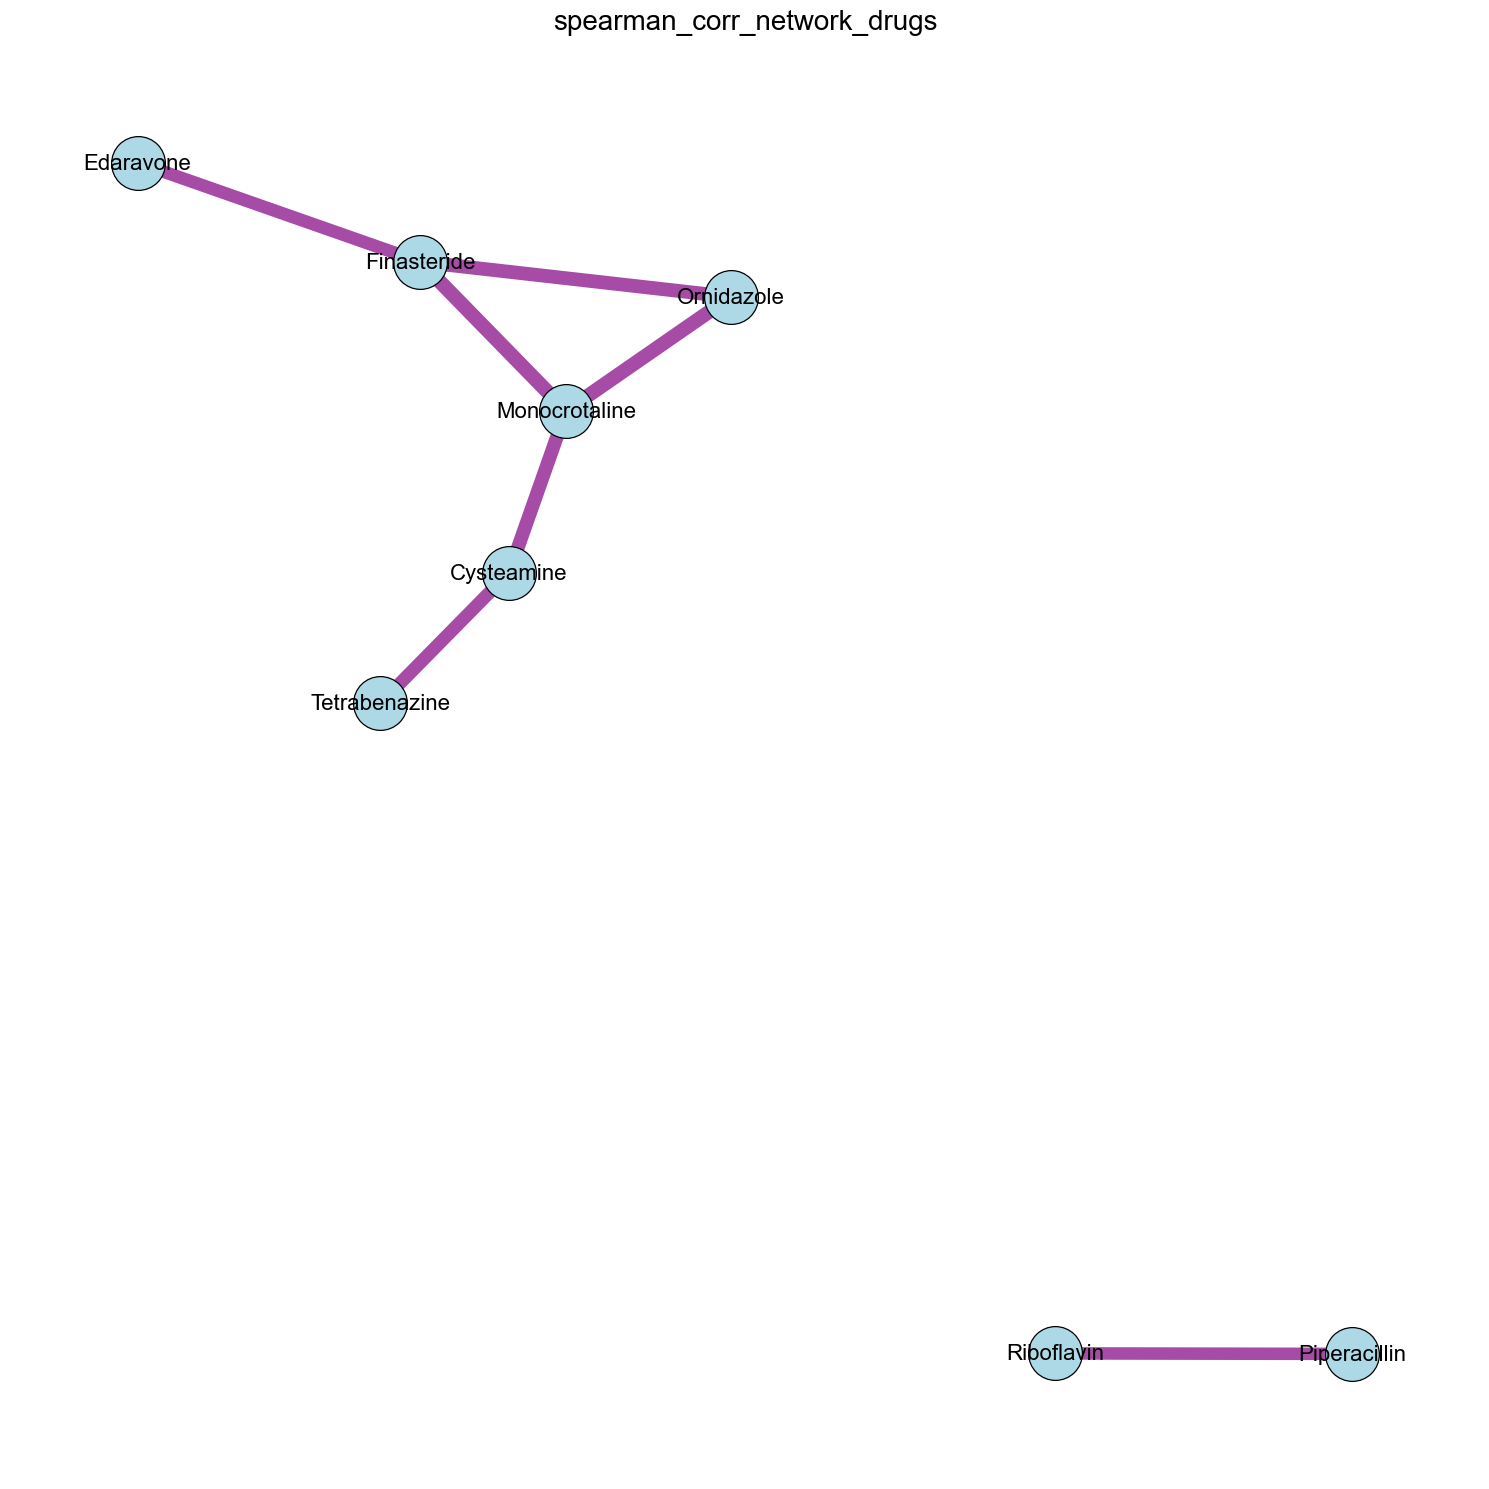

In [257]:
plot_network_drugs(cor_matrix_df = corr_spearman, threshold = 0.6,title_name = "spearman_corr_network_drugs")

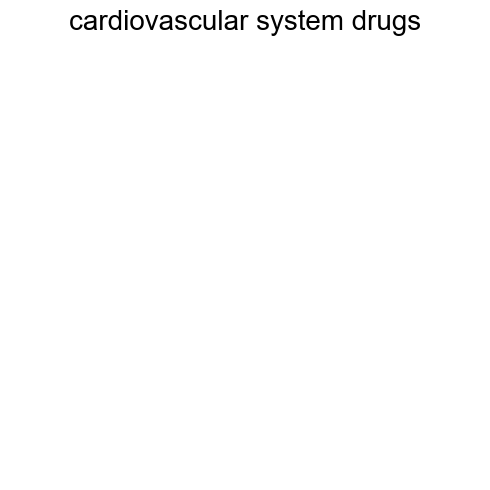

In [164]:
# selected_drugs = cluster4.index

selected_drugs = ['Cobimetinib', 'Selumetinib','Baricitinib', 'Fedratinib']   # tinibs 
# selected_drugs = ['Chlorthalidone','Hydroquinidine','Nilvadipine','Pentoxifylline','Vinpocetine']  # 心血管系统药物 cardiovascular system 

# selected_drugs = ['Azithromycin','Piperacillin','Cefetamet pivoxil','Cefodizime','Fidaxomicin','Ornidazole','Secnidazole','Trimethoprim','Triclosan',]
# selected_drugs = ['Cefodizime','Fidaxomicin','Triclosan']   # antiviral
# selected_drugs = list(set(high_p_values['Drug 1']))
selected_cor_matrix_df = corr_pearson.loc[selected_drugs,selected_drugs]
plot_network_drugs(cor_matrix_df = selected_cor_matrix_df, threshold = 0.2,title_name = "cardiovascular system drugs", fig_size=(5, 5))

In [240]:
# input_multi_df[input_multi_df.index.str.contains("AT")]

In [103]:
def select_by_index(df, index_name = None):
    """
    Input a DataFrame and select a subset by index names.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    index_name (str): The string to filter index names by.

    Returns:
    pd.DataFrame: A DataFrame containing rows where the index contains the specified name.
    """
    return df[df.index.str.contains(index_name)]
def select_by_columns(df, column_contains = None):
    """
    Input a DataFrame and select columns based on partial or exact matches.
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    column_contains (str, optional): Substring to match in column names.
    Returns:
    pd.DataFrame: A DataFrame containing only the selected columns.
    """
    if column_contains:
        # Select columns containing the substring
        matching_columns = [col for col in df.columns if column_contains in col]
    if not matching_columns:
        raise ValueError("No matching columns found in the DataFrame.")
    return df[matching_columns]

In [161]:
ff = input_multi_df.loc[:, selected_drugs]
ff[ff.index.str.contains("CDK|GH")]

Chlorthalidone  Hydroquinidine  Nilvadipine  Pentoxifylline  Vinpocetine
CDK1       -0.012871          0.0031     0.030912       -0.089598     0.032435

In [162]:

from adjustText import adjust_text
def plot_scatter_genes(ef = ff.T , gene1 = 'CDK1' , gene2 = 'HSP74'):
    fig = plt.figure(figsize=(5.3, 5))
    sns.scatterplot(data=ef, x=gene1, y=gene2, s=150)
    # Label each point with the index
    texts = []
    for i in range(len(ef)):
        text = plt.text(x=ef[gene1].iloc[i], 
                        y=ef[gene2].iloc[i], 
                        s=ef.index[i],  # Use the index as label
                        fontsize=16)
        texts.append(text)
    
    # Adjust text to avoid overlap
    adjust_text(texts, 
                arrowprops=dict(arrowstyle="->", color='gray', lw=0.5))
    plt.xlim(-3, 3)  
    plt.ylim(-3, 3)
    plt.xlabel(gene1, fontsize = 22)
    plt.ylabel(gene2, fontsize = 22)
    plt.xticks(fontsize=20,  fontfamily='Arial')  # Adjust as needed
    plt.yticks(fontsize=20,  fontfamily='Arial')  # Adjust as needed
    plt.show()

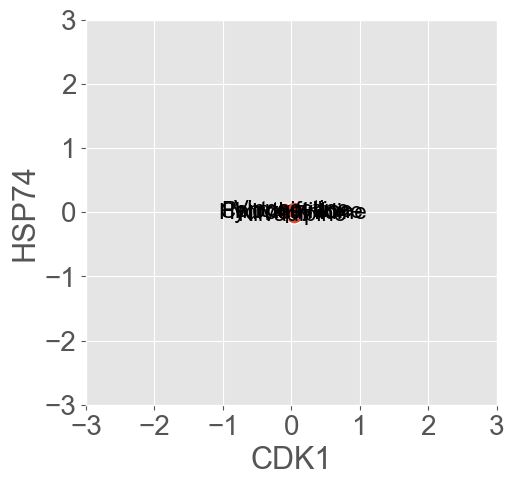

In [163]:
plot_scatter_genes(ef = ff.T , gene1 = 'CDK1' , gene2 = 'HSP74')

In [449]:
list(set(high_p_values['Drug 1']))

['Edaravone',
 'Piperacillin',
 'Ornidazole',
 'Vinpocetine',
 'Cysteamine',
 'Monocrotaline',
 'Valbenazine',
 'Deoxycorticosterone',
 'Hydroquinidine',
 'Phenazine',
 'Riboflavin',
 'Cloperastine',
 'Nilvadipine',
 'Finasteride',
 'Cefodizime']

In [279]:
# plot_network_drugs(cor_matrix_df = corr_spearman, threshold = 0.5,title_name = "spearman_corr_network_drugs")

Spearman correlation: 0.16916617921311408, p-value: 3.9180736672632156e-10
 Pearman correlation: 0.14539286783844899, p-value: 7.976823156410357e-08


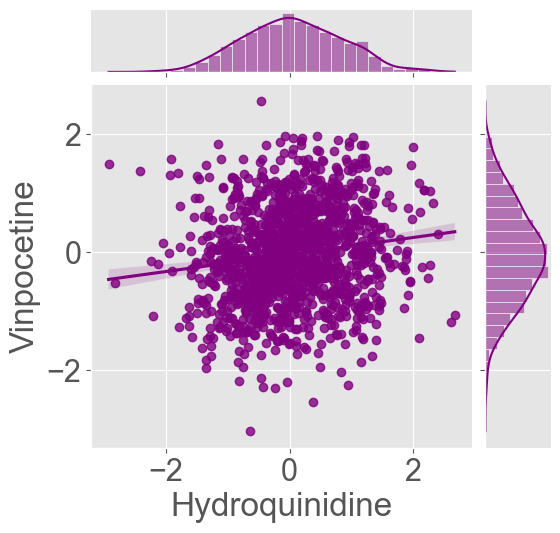

In [159]:
plot_jointplot(drug1 = 'Hydroquinidine', drug2 ='Vinpocetine', df = input_multi_df)

Spearman correlation: 0.5067818746451282, p-value: 4.796429058623678e-89
 Pearman correlation: 0.6747853127037367, p-value: 3.3613478557606587e-180


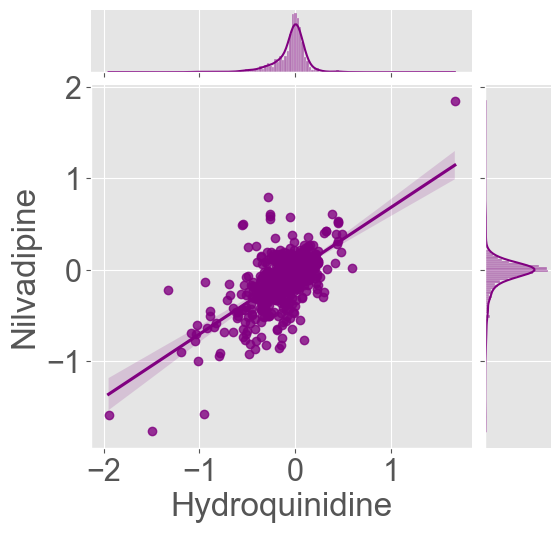

In [479]:
plot_jointplot(drug1 = 'Hydroquinidine', drug2 ='Nilvadipine', df = input_multi_df)

Spearman correlation: 0.5316581905425163, p-value: 1.9805144587695903e-99
 Pearman correlation: 0.6632992583901866, p-value: 4.8461152920050064e-172


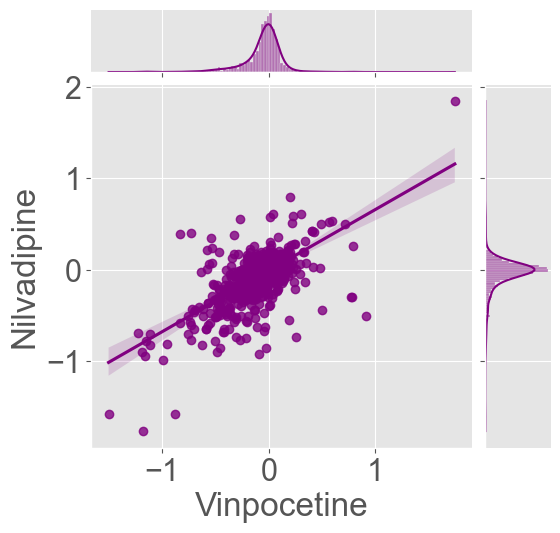

In [480]:
plot_jointplot(drug1 = 'Vinpocetine', drug2 ='Nilvadipine', df = input_multi_df)

Spearman correlation: 0.11308353933916908, p-value: 3.0997002209767696e-05
 Pearman correlation: 0.13725523312603122, p-value: 4.099849320481846e-07


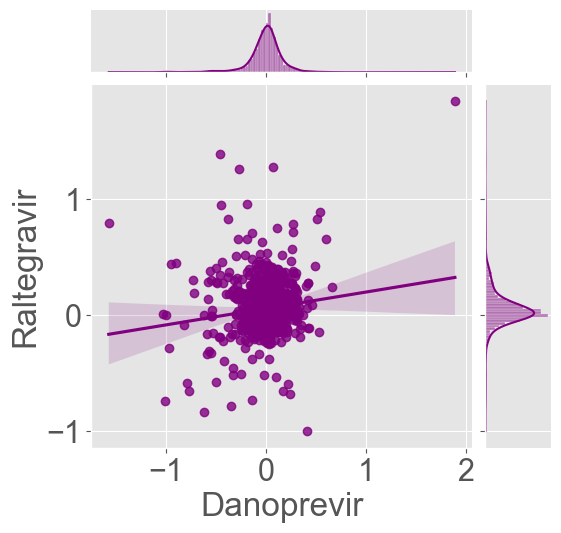

In [372]:
plot_jointplot(drug1 = 'Danoprevir', drug2 ='Raltegravir', df = input_multi_df)

Spearman correlation: 0.12918609952486293, p-value: 3.7581619448369265e-05
 Pearman correlation: 0.1127070993745173, p-value: 0.00032757937968380793


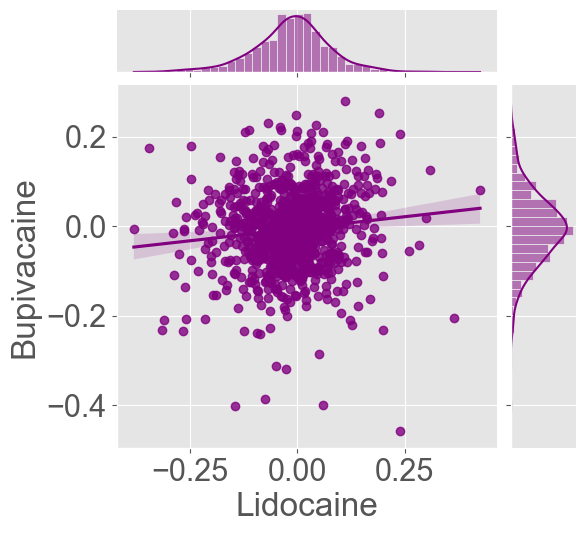

In [371]:
plot_jointplot(drug1 = 'Lidocaine', drug2 ='Bupivacaine', df = log_pro_updown)

Spearman correlation: 0.5072398790659849, p-value: 3.143479123534755e-89
 Pearman correlation: 0.6275252229091531, p-value: 8.298879788444315e-149


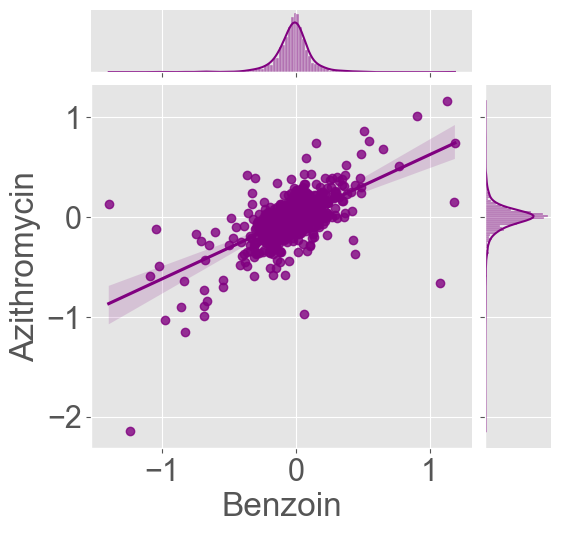

In [282]:
plot_jointplot(drug1 = 'Benzoin', drug2 ='Azithromycin', df = input_multi_df)

In [222]:
# plot_jointplot(drug1 = 'Benzoin', drug2 ='Azithromycin', df = DatasetNormalizeDf.standardscaler(heatmap_meta.T).T)

Spearman correlation: 0.5304820791812203, p-value: 5.331765471808107e-26
 Pearman correlation: 0.4916224976123962, p-value: 4.967804465044156e-22


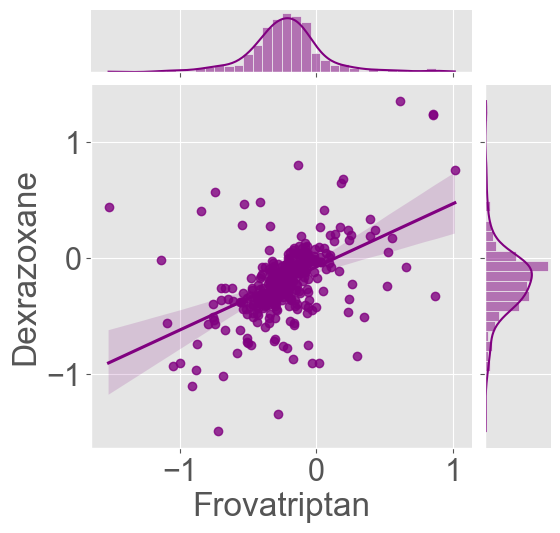

In [365]:
plot_jointplot(drug1 = 'Frovatriptan', drug2 ='Dexrazoxane', df = log_meta_updown)

Spearman correlation: 0.3691835189877699, p-value: 7.00783371564679e-45
 Pearman correlation: 0.44615582481134475, p-value: 4.6354640386119596e-67


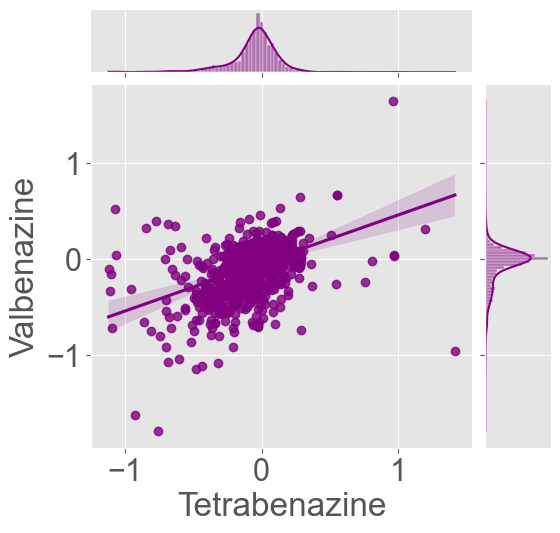

In [399]:
plot_jointplot(drug1 = 'Tetrabenazine', drug2 ='Valbenazine', df = input_multi_df)

Spearman correlation: 0.3126253602114813, p-value: 5.151019734030467e-32
 Pearman correlation: 0.4137725619874251, p-value: 5.130592258697061e-57


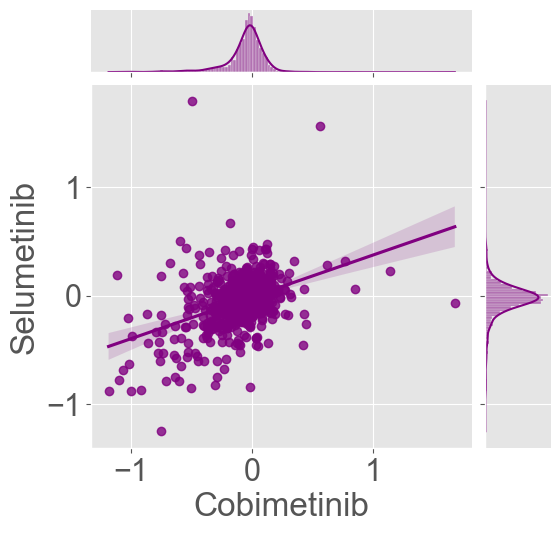

In [395]:
plot_jointplot(drug1 = 'Cobimetinib', drug2 ='Selumetinib', df = input_multi_df)

Spearman correlation: 0.1906199055576236, p-value: 1.6084169176619798e-12
 Pearman correlation: 0.31364541182432987, p-value: 3.1843595883668674e-32


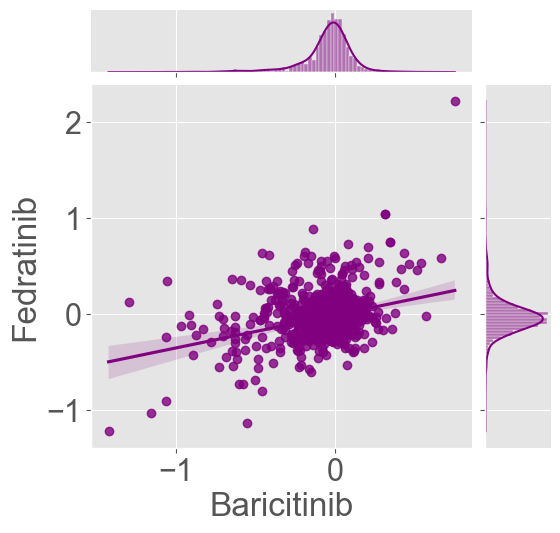

In [398]:
plot_jointplot(drug1 = 'Baricitinib', drug2 ='Fedratinib', df = input_multi_df)

# 'Baricitinib'

Spearman correlation: -0.08930435314261662, p-value: 0.0010162262326407418
 Pearman correlation: -0.08105661177632047, p-value: 0.0028687558092726616


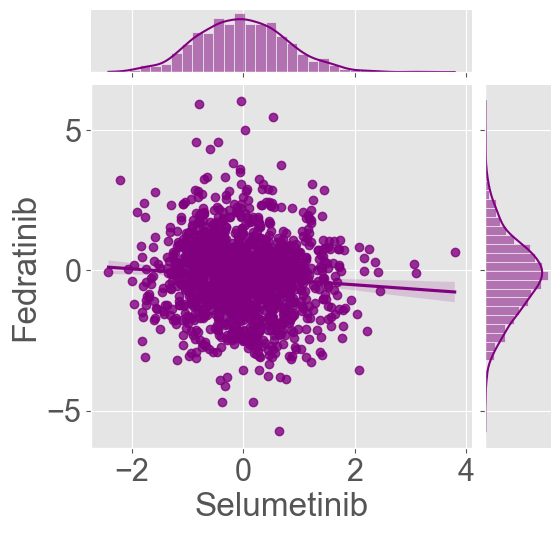

In [147]:
plot_jointplot(drug1 = 'Selumetinib', drug2 ='Fedratinib', df = input_multi_df)

Spearman correlation: 0.07837080059617077, p-value: 0.003947071375768495
 Pearman correlation: 0.18498948098906168, p-value: 7.262392186836455e-12


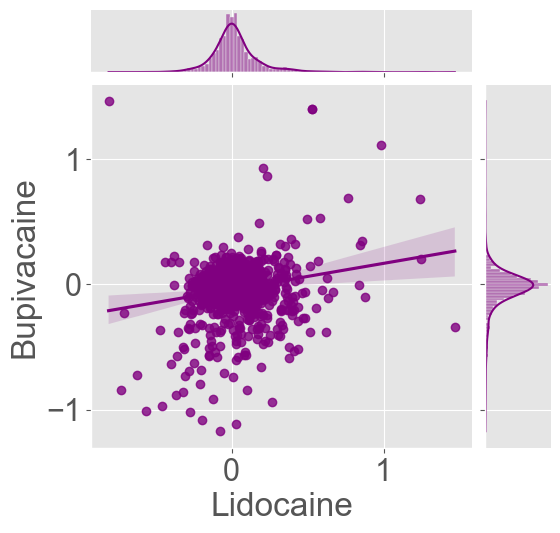

In [492]:
plot_jointplot(drug1 = 'Lidocaine', drug2 ='Bupivacaine', df = input_multi_df)

In [144]:
input_multi_df

DFO  Acamprosate  Acenocoumarol  \
1-aminocyclopropane-1-carboxylic acid -0.311719     0.352708      -0.415947   
1-aminocyclopropanecarboxylate        -0.692848    -0.345540       0.181446   
proline                                3.235627    -0.217768       0.441381   
indoline                               3.899163    -0.272755      -0.177947   
2,6-xylidine                           3.541564     0.292982       0.633044   
...                                         ...          ...            ...   
SUMO4                                 -0.130692     0.947163      -0.515563   
SRSF6                                 -1.613934    -0.548765       0.167702   
SEP11                                 -0.536467    -0.337194      -1.261767   
HBG2                                   0.901696     1.409116      -0.621578   
H2B1L                                  1.143903     0.189091       1.678922   

                                       Adenosylcobalamin  Aminophylline  \
1-aminocyclopropane-1-carboxylic acid          -0.250043       0.226196   
1-aminocyclopropanecarboxylate                 -1.738119      -0.145030   
proline                                         2.109261      -0.381553   
indoline                                        2.454076      -0.732865   
2,6-xylidine                                    1.969560       0.196778   
...                                                  ...            ...   
SUMO4                                           1.180305      -1.074235   
SRSF6                                           0.244920      -0.952892   
SEP11                                           0.325381      -0.992493   
HBG2                                           -0.420875      -0.958055   
H2B1L                                           0.578321      -0.675971   

                                       Asenapine  Azithromycin  Baricitinib  \
1-aminocyclopropane-1-carboxylic acid  -0.298755     -1.216582     0.495626   
1-aminocyclopropanecarboxylate          0.339021      1.531353     0.560177   
proline                                 1.598457     -0.008149     0.728046   
indoline                               -0.056877     -0.400455    -0.527665   
2,6-xylidine                            0.490752     -0.059259    -1.410555   
...                                          ...           ...          ...   
SUMO4                                   1.269807      0.491517    -0.012787   
SRSF6                                   0.536298      1.366111     0.457401   
SEP11                                   0.489381      1.604700     0.209166   
HBG2                                   -0.621834      1.017931     0.738632   
H2B1L                                  -0.466235      1.273418     0.280563   

                                       Benzbromarone   Benzoin  ...  \
1-aminocyclopropane-1-carboxylic acid       0.254481 -0.837695  ...   
1-aminocyclopropanecarboxylate             -0.187527 -0.151334  ...   
proline                                    -0.115125  0.056792  ...   
indoline                                    0.933087  0.128002  ...   
2,6-xylidine                                0.142487  1.389971  ...   
...                                              ...       ...  ...   
SUMO4                                      -1.462718  1.088895  ...   
SRSF6                                       0.192543  0.562445  ...   
SEP11                                      -0.403654  0.736418  ...   
HBG2                                        0.471506 -0.366599  ...   
H2B1L                                       0.409346 -0.569343  ...   

                                       Thymopentin  Ticlopidine  Triclosan  \
1-aminocyclopropane-1-carboxylic acid     0.288842    -0.086057  -0.024066   
1-aminocyclopropanecarboxylate            0.817737    -0.276548  -0.269235   
proline                                  -0.327102     1.154797   0.947913   
indoline                                 -1.341259     0.145611  -0.297575   
2,

Spearman correlation: -0.014779655303860086, p-value: 0.5872901671419231
 Pearman correlation: -0.01595616246652786, p-value: 0.5578900485759103


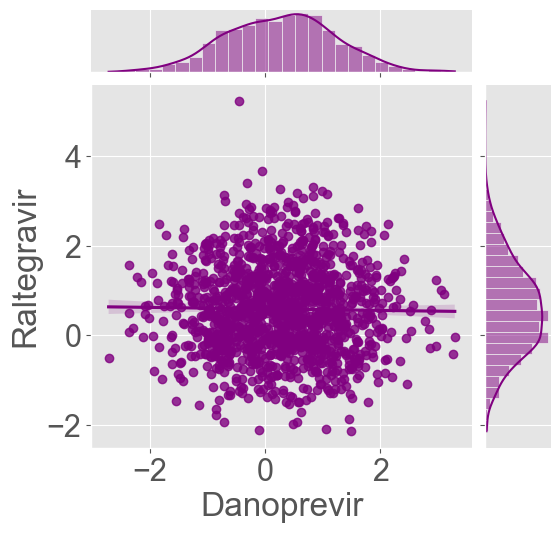

In [145]:
plot_jointplot(drug1 = 'Danoprevir', drug2 ='Raltegravir', df = input_multi_df)

Spearman correlation: -0.04864247207888591, p-value: 0.07388845712065435
 Pearman correlation: -0.046950967874529445, p-value: 0.08451278891231433


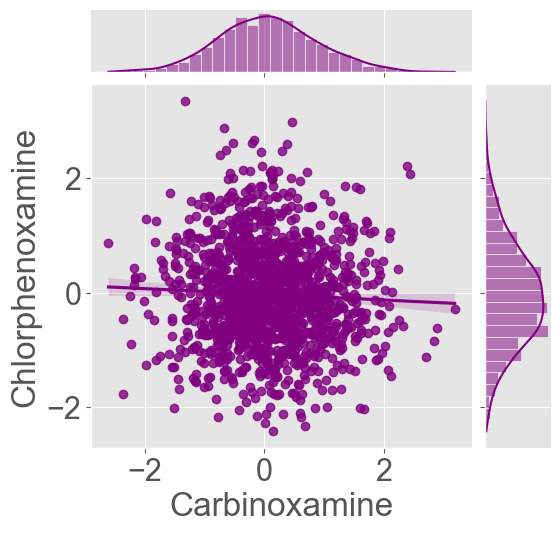

In [146]:
plot_jointplot(drug1 = 'Carbinoxamine', drug2 ='Chlorphenoxamine', df = input_multi_df)

In [225]:
# plot_jointplot(drug1 = 'Frovatriptan', drug2 ='Dexrazoxane', df = DatasetNormalizeDf.standardscaler(heatmap_pro.T).T)

In [358]:
# plot_clusterheatmap(multi_hm_df , low=-2, high=2)

In [ ]:
# 蛋白组学和代谢组学的差异分析

# calculate drugs similarity according to their structures 

In [291]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.DataStructs import FingerprintSimilarity
from rdkit.ML.Cluster import Butina
from rdkit.Chem import rdMolDescriptors
from rdkit import DataStructs
import pubchempy as pcp

In [347]:
drugnames = input_multi_df.columns.to_list()
drugnames[0] = 'Deferoxamine'
drugnames

['Deferoxamine',
 'Acamprosate',
 'Acenocoumarol',
 'Adenosylcobalamin',
 'Aminophylline',
 'Asenapine',
 'Azithromycin',
 'Baricitinib',
 'Benzbromarone',
 'Benzoin',
 'Bromfenac',
 'Bupivacaine',
 'Carbinoxamine',
 'Cefetamet pivoxil',
 'Cefodizime',
 'Chlorotrianisene',
 'Chlorphenoxamine',
 'Chlorthalidone',
 'Chlorzoxazone',
 'Cloperastine',
 'Cobimetinib',
 'Cysteamine',
 'D-Pantothenic acid',
 'Danoprevir',
 'Deoxycorticosterone',
 'Dexrazoxane',
 'Edaravone',
 'Fedratinib',
 'Fenofibrate',
 'Fidaxomicin',
 'Finasteride',
 'Frovatriptan',
 'Glafenine',
 'Granisetron',
 'Hexylresorcinol',
 'Hydroquinidine',
 'Ixabepilone',
 'Lidocaine',
 'Linagliptin',
 'Mafenide',
 'Melitracen',
 'Monocrotaline',
 'Mozavaptan',
 'Nilvadipine',
 'Nortriptyline',
 'Ornidazole',
 'Oxyphenisatine',
 'Penfluridol',
 'Pentoxifylline',
 'Phenazine',
 'Phenazopyridine',
 'Piperacillin',
 'Propofol',
 'Quetiapine',
 'Raltegravir',
 'Riboflavin',
 'Rotigotine',
 'Saccharin',
 'Secnidazole',
 'Selumetinib'

In [293]:
drug_names = drugnames
# Function to get SMILES from drug names
def get_smiles_from_names(drug_names):
    smiles_dict = {}
    for name in drug_names:
        try:
            compounds = pcp.get_compounds(name, 'name')
            if compounds:  # Check if any compounds were found
                smiles = compounds[0].to_dict(properties=['canonical_smiles'])['canonical_smiles']
                smiles_dict[name] = smiles
            else:
                print(f"No compounds found for {name}")
        except Exception as e:
            print(f"Could not find SMILES for {name}: {e}")
    return smiles_dict

# Get SMILES for the drugs
drugs_smiles = get_smiles_from_names(drug_names)

# Check retrieved SMILES
print("Retrieved SMILES:")
print(drugs_smiles)

# Convert SMILES to RDKit Mol objects if SMILES were found
drugs_mols = {name: Chem.MolFromSmiles(smiles) for name, smiles in drugs_smiles.items() if smiles}

# Generate fingerprints for each drug using MorganGenerator
fingerprints = {}
for name, mol in drugs_mols.items():
    if mol:  # Ensure the molecule was created successfully
        generator = rdMolDescriptors.GetMorganFingerprintAsBitVect(mol, radius=2)
        fingerprints[name] = generator

# Calculate the Tanimoto similarity
similarity_matrix = pd.DataFrame(index=drugs_smiles.keys(), columns=drugs_smiles.keys())

for drug1 in drugs_smiles.keys():
    for drug2 in drugs_smiles.keys():
        if drug1 == drug2:
            similarity_matrix.loc[drug1, drug2] = 1.0  # Similarity with itself
        else:
            if drug1 in fingerprints and drug2 in fingerprints:
                similarity = DataStructs.TanimotoSimilarity(fingerprints[drug1], fingerprints[drug2])
                similarity_matrix.loc[drug1, drug2] = similarity

print("Tanimoto Similarity Matrix:")
print(similarity_matrix)

Retrieved SMILES:
{'Deferoxamine': 'CC(=O)N(CCCCCNC(=O)CCC(=O)N(CCCCCNC(=O)CCC(=O)N(CCCCCN)O)O)O', 'Acamprosate': 'CC(=O)NCCCS(=O)(=O)O', 'Acenocoumarol': 'CC(=O)CC(C1=CC=C(C=C1)[N+](=O)[O-])C2=C(C3=CC=CC=C3OC2=O)O', 'Adenosylcobalamin': 'CC1=CC2=C(C=C1C)N(C=N2)C3C(C(C(O3)CO)OP(=O)([O-])OC(C)CNC(=O)CCC4(C(C5C6(C(C(C(=N6)C(=C7C(C(C(=N7)C=C8C(C(C(=N8)C(=C4[N-]5)C)CCC(=O)N)(C)C)CCC(=O)N)(C)CC(=O)N)C)CCC(=O)N)(C)CC(=O)N)C)CC(=O)N)C)O.[CH2-]C1C(C(C(O1)N2C=NC3=C(N=CN=C32)N)O)O.[Co]', 'Aminophylline': 'CN1C2=C(C(=O)N(C1=O)C)NC=N2.CN1C2=C(C(=O)N(C1=O)C)NC=N2.C(CN)N', 'Asenapine': 'CN1CC2C(C1)C3=C(C=CC(=C3)Cl)OC4=CC=CC=C24', 'Azithromycin': 'CCC1C(C(C(N(CC(CC(C(C(C(C(C(=O)O1)C)OC2CC(C(C(O2)C)O)(C)OC)C)OC3C(C(CC(O3)C)N(C)C)O)(C)O)C)C)C)O)(C)O', 'Baricitinib': 'CCS(=O)(=O)N1CC(C1)(CC#N)N2C=C(C=N2)C3=C4C=CNC4=NC=N3', 'Benzbromarone': 'CCC1=C(C2=CC=CC=C2O1)C(=O)C3=CC(=C(C(=C3)Br)O)Br', 'Benzoin': 'C1=CC=C(C=C1)C(C(=O)C2=CC=CC=C2)O', 'Bromfenac': 'C1=CC(=C(C(=C1)C(=O)C2=CC=C(C=C2)Br)N)CC(=O)O', 'Bup

[20:29:05] DEPRECATION WARNING: please use MorganGenerator
[20:29:05] DEPRECATION WARNING: please use MorganGenerator
[20:29:05] DEPRECATION WARNING: please use MorganGenerator
[20:29:05] DEPRECATION WARNING: please use MorganGenerator
[20:29:05] DEPRECATION WARNING: please use MorganGenerator
[20:29:05] DEPRECATION WARNING: please use MorganGenerator
[20:29:05] DEPRECATION WARNING: please use MorganGenerator
[20:29:05] DEPRECATION WARNING: please use MorganGenerator
[20:29:05] DEPRECATION WARNING: please use MorganGenerator
[20:29:05] DEPRECATION WARNING: please use MorganGenerator
[20:29:05] DEPRECATION WARNING: please use MorganGenerator
[20:29:05] DEPRECATION WARNING: please use MorganGenerator
[20:29:05] DEPRECATION WARNING: please use MorganGenerator
[20:29:05] DEPRECATION WARNING: please use MorganGenerator
[20:29:05] DEPRECATION WARNING: please use MorganGenerator
[20:29:05] DEPRECATION WARNING: please use MorganGenerator
[20:29:05] DEPRECATION WARNING: please use MorganGenerat

Tanimoto Similarity Matrix:
                  Deferoxamine Acamprosate Acenocoumarol Adenosylcobalamin  \
Deferoxamine               1.0     0.26087      0.093333          0.072727   
Acamprosate            0.26087         1.0      0.096774          0.058442   
Acenocoumarol         0.093333    0.096774           1.0          0.074713   
Adenosylcobalamin     0.072727    0.058442      0.074713               1.0   
Aminophylline         0.098361        0.06      0.084507          0.068323   
...                        ...         ...           ...               ...   
Troxerutin            0.039604     0.05814      0.138614           0.09375   
Valbenazine           0.070588    0.069444       0.10989          0.076923   
Vinpocetine           0.070588    0.069444      0.147727          0.076923   
Yohimbine             0.058824    0.070423      0.123596          0.059783   
Zaltoprofen           0.070423    0.068966      0.194444          0.064706   

                  Aminophylline Ase

In [348]:
similarity_matrix

Deferoxamine Acamprosate Acenocoumarol Adenosylcobalamin  \
Deferoxamine               1.0     0.26087      0.093333          0.072727   
Acamprosate            0.26087         1.0      0.096774          0.058442   
Acenocoumarol         0.093333    0.096774           1.0          0.074713   
Adenosylcobalamin     0.072727    0.058442      0.074713               1.0   
Aminophylline         0.098361        0.06      0.084507          0.068323   
...                        ...         ...           ...               ...   
Troxerutin            0.039604     0.05814      0.138614           0.09375   
Valbenazine           0.070588    0.069444       0.10989          0.076923   
Vinpocetine           0.070588    0.069444      0.147727          0.076923   
Yohimbine             0.058824    0.070423      0.123596          0.059783   
Zaltoprofen           0.070423    0.068966      0.194444          0.064706   

                  Aminophylline Asenapine Azithromycin Baricitinib  \
Deferoxamine           0.098361  0.014493     0.045045    0.071429   
Acamprosate                0.06  0.018182     0.040816    0.101449   
Acenocoumarol          0.084507   0.09589     0.067797    0.075269   
Adenosylcobalamin      0.068323  0.047904     0.099502    0.071429   
Aminophylline               1.0  0.083333     0.067308    0.148649   
...                         ...       ...          ...         ...   
Troxerutin             0.086957  0.072917     0.120301    0.078947   
Valbenazine            0.088608    0.1125     0.097561        0.09   
Vinpocetine            0.088608    0.1125     0.097561    0.112245   
Yohimbine              0.075949  0.142857     0.116667    0.113402   
Zaltoprofen            0.075758  0.121212     0.071429     0.08046   

                  Benzbromarone   Benzoin  ... Thymopentin Ticlopidine  \
Deferoxamine           0.088235  0.055556  ...    0.136364    0.014286   
Acamprosate            0.090909     0.075  ...    0.088608    0.017857   
Acenocoumarol          0.292308  0.218182  ...    0.122449        0.08   
Adenosylcobalamin      0.059172  0.038462  ...    0.078947    0.035294   
Aminophylline          0.078125  0.061224  ...    0.104651    0.064516   
...                         ...       ...  ...         ...         ...   
Troxerutin             0.138298  0.058824  ...    0.081301        0.04   
Valbenazine            0.094118  0.085714  ...     0.15534    0.111111   
Vinpocetine            0.177215  0.117647  ...    0.072072       0.125   
Yohimbine              0.135802  0.119403  ...    0.092593    0.171053   
Zaltoprofen            0.147059      0.22  ...     0.11828    0.119403   

                  Triclosan Trimetazidine Trimethoprim Troxerutin Valbenazine  \
Deferoxamine       0.016949      0.030303     0.044776   0.039604    0.070588   
Acamprosate        0.022222      0.038462     0.037037    0.05814    0.069444   
Acenocoumarol      0.076923      0.098592     0.066667   0.138614     0.10989   
Adenosylcobalamin  0.037736      0.042169     0.080247    0.09375    0.076923   
Aminophylline      0.037736      0.105263     0.140351   0.086957    0.088608   
...                     ...           ...          ...        ...         ...   
Troxerutin         0.120482       0.10989     0.095745        1.0    0.087719   
Valbenazine        0.082192      0.175676     0.155844   0.087719         1.0   
Vinpocetine        0.067568      0.115385     0.059524   0.087719    0.170213   
Yohimbine          0.068493      0.146667     0.073171   0.078947    0.238636   
Zaltoprofen        0.084746      0.074627     0.057143    0.10101    0.130952   

                  Vinpocetine Yohimbine Zaltoprofen  
Deferoxamine         0.070588  0.058824    0.070423  
Acamprosate          0.069444  0.070423    0.068966  
Acenocoumarol        0.147727  0.123596    0.194444  
Adenosylcobalamin    0.076923  0.059783    0.064706  
Aminophylline        0.088608  0.075949    0.075758  
...                       ...       ...         ...  


In [349]:
# Stack the similarity matrix
pairs = similarity_matrix.stack()

# Create a DataFrame from the stacked Series
tanimoto_pairs_df = pairs.reset_index()
tanimoto_pairs_df.columns = ['Drug 1', 'Drug 2', 'Similarity']

# Remove self-correlation pairs
tanimoto_pairs_df = tanimoto_pairs_df[tanimoto_pairs_df['Drug 1'] != tanimoto_pairs_df['Drug 2']]

# Sort the drug names to ensure pairs are in a consistent order
tanimoto_pairs_df[['Drug 1', 'Drug 2']] = np.sort(tanimoto_pairs_df[['Drug 1', 'Drug 2']], axis=1)

# Remove duplicates
tanimoto_pairs_df = tanimoto_pairs_df.drop_duplicates()

In [509]:
def get_one_on_one_pairs_from_matrix(input_matrix = corr_pearson): 
    '''function used to make one on one pairs(2D) from a high dimention matrix(n*n)'''
    # Stack the similarity matrix
    pairs = input_matrix.stack()
    # Create a DataFrame from the stacked Series
    pairs_df = pairs.reset_index()
    pairs_df.columns = ['Drug 1', 'Drug 2', 'Similarity']
    # Remove self-correlation pairs
    pairs_df = pairs_df[pairs_df['Drug 1'] != pairs_df['Drug 2']]
    # Sort the drug names to ensure pairs are in a consistent order
    pairs_df[['Drug 1', 'Drug 2']] = np.sort(pairs_df[['Drug 1', 'Drug 2']], axis=1)
    # Remove duplicates
    pairs_df = pairs_df.drop_duplicates()
    return pairs_df

In [510]:
get_one_on_one_pairs_from_matrix(input_matrix = corr_pearson)

Drug 1        Drug 2  Similarity
1           Acamprosate  Deferoxamine    0.379602
2         Acenocoumarol  Deferoxamine    0.173313
3     Adenosylcobalamin  Deferoxamine    0.362017
4         Aminophylline  Deferoxamine   -0.034725
5             Asenapine  Deferoxamine    0.392027
...                 ...           ...         ...
5108        Valbenazine     Yohimbine    0.737250
5109        Valbenazine   Zaltoprofen    0.613618
5181        Vinpocetine     Yohimbine    0.677412
5182        Vinpocetine   Zaltoprofen    0.569234
5255          Yohimbine   Zaltoprofen    0.595013

[2628 rows x 3 columns]

In [512]:
get_one_on_one_pairs_from_matrix(input_matrix = log_pro_updown.corr(method='pearson'))

Drug 1       Drug 2  Similarity
1           Acamprosate          DFO    0.382276
2         Acenocoumarol          DFO    0.196038
3     Adenosylcobalamin          DFO    0.312836
4         Aminophylline          DFO    0.295275
5             Asenapine          DFO    0.289247
...                 ...          ...         ...
5108        Valbenazine    Yohimbine    0.350685
5109        Valbenazine  Zaltoprofen    0.144776
5181        Vinpocetine    Yohimbine    0.340290
5182        Vinpocetine  Zaltoprofen    0.234568
5255          Yohimbine  Zaltoprofen    0.075008

[2628 rows x 3 columns]

In [515]:
get_one_on_one_pairs_from_matrix(input_matrix = log_meta_updown.corr(method='pearson')).Similarity

1       0.391844
2       0.195273
3       0.384425
4      -0.087439
5       0.465514
          ...   
5108    0.651699
5109    0.524883
5181    0.608784
5182    0.480026
5255    0.497674
Name: Similarity, Length: 2628, dtype: float64

In [518]:
def plot_scatter_joint(x_value = [1,2], y_value = [1,2],
                       x_label = 'a', y_label = 'b'):
    corre1, p_value1 = pearsonr(x_value, y_value)
    corre2, p_value2 = spearmanr(x_value, y_value)
    gg= sns.jointplot( x = x_value, y = y_value,
                        # xlim = (13,26), ylim = (13,26),
                        kind="reg", 
                        # truncate=False,
                        color="purple", height=6)
    gg.fig.set_size_inches(5.3, 5) 
    gg.ax_joint.tick_params(labelsize=22)
    gg.set_axis_labels(x_label,y_label, fontsize=24)
    print(f"Spearman correlation: {corre2}, p-value: {p_value2}\n",
          f"Pearman correlation: {corre1}, p-value: {p_value1}")
    plt.show()

Spearman correlation: 0.48962115005996815, p-value: 1.6349620778990413e-158
 Pearman correlation: 0.5124524730430713, p-value: 5.895497776959905e-176


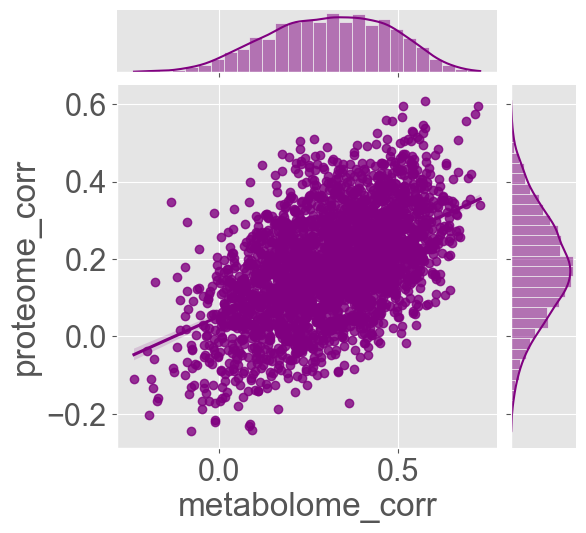

In [520]:
plot_scatter_joint(x_value = get_one_on_one_pairs_from_matrix(input_matrix = log_meta_updown.corr(method='pearson')).Similarity, 
                   y_value = get_one_on_one_pairs_from_matrix(input_matrix = log_pro_updown.corr(method='pearson')).Similarity,
                   x_label = 'metabolome_corr', 
                   y_label = 'proteome_corr')

In [374]:
tanimoto_pairs_df[tanimoto_pairs_df['Similarity'] > 0.3]

Drug 1            Drug 2 Similarity  pearson_R
840           Bupivacaine         Lidocaine   0.372549   0.184989
892         Carbinoxamine  Chlorphenoxamine   0.428571   0.263182
895         Carbinoxamine      Cloperastine   0.377358   0.294741
963     Cefetamet pivoxil        Cefodizime   0.565217   0.104663
1782  Deoxycorticosterone       Finasteride   0.338028   0.640569
2964           Melitracen     Nortriptyline   0.340909   0.324412
3343           Ornidazole       Secnidazole   0.717949   0.064402
4522        Tetrabenazine       Valbenazine    0.53125   0.446156

In [351]:
corr_pearson = corr_pearson.rename(columns = {'DFO': 'Deferoxamine'})
corr_pearson = corr_pearson.rename(index = {'DFO': 'Deferoxamine'})

In [352]:

# Stack the similarity matrix
pairs2 = corr_pearson.stack()

# Create a DataFrame from the stacked Series
tanimoto_pairs_df2 = pairs2.reset_index()
tanimoto_pairs_df2.columns = ['Drug 1', 'Drug 2', 'Similarity']

# Remove self-correlation pairs
tanimoto_pairs_df2 = tanimoto_pairs_df2[tanimoto_pairs_df2['Drug 1'] != tanimoto_pairs_df2['Drug 2']]

# Sort the drug names to ensure pairs are in a consistent order
tanimoto_pairs_df2[['Drug 1', 'Drug 2']] = np.sort(tanimoto_pairs_df2[['Drug 1', 'Drug 2']], axis=1)

# Remove duplicates
tanimoto_pairs_df2 = tanimoto_pairs_df2.drop_duplicates()

In [353]:
tanimoto_pairs_df['pearson_R'] = tanimoto_pairs_df2.Similarity.tolist()

In [354]:
tanimoto_pairs_df[tanimoto_pairs_df['Similarity'] > 0.3]

Drug 1            Drug 2 Similarity  pearson_R
840           Bupivacaine         Lidocaine   0.372549   0.184989
892         Carbinoxamine  Chlorphenoxamine   0.428571   0.263182
895         Carbinoxamine      Cloperastine   0.377358   0.294741
963     Cefetamet pivoxil        Cefodizime   0.565217   0.104663
1782  Deoxycorticosterone       Finasteride   0.338028   0.640569
2964           Melitracen     Nortriptyline   0.340909   0.324412
3343           Ornidazole       Secnidazole   0.717949   0.064402
4522        Tetrabenazine       Valbenazine    0.53125   0.446156

In [458]:
high_p_values = tanimoto_pairs_df[tanimoto_pairs_df['pearson_R'] > 0.7]

In [495]:
tanimoto_pairs_df[tanimoto_pairs_df['Similarity'] > 0.4]

Drug 1            Drug 2 Similarity  pearson_R
892       Carbinoxamine  Chlorphenoxamine   0.428571   0.263182
963   Cefetamet pivoxil        Cefodizime   0.565217   0.104663
3343         Ornidazole       Secnidazole   0.717949   0.064402
4522      Tetrabenazine       Valbenazine    0.53125   0.446156

In [499]:
# high_p_values

In [447]:
list(set(high_p_values['Drug 1']))

['Edaravone',
 'Piperacillin',
 'Ornidazole',
 'Vinpocetine',
 'Cysteamine',
 'Monocrotaline',
 'Valbenazine',
 'Deoxycorticosterone',
 'Hydroquinidine',
 'Phenazine',
 'Riboflavin',
 'Cloperastine',
 'Nilvadipine',
 'Finasteride',
 'Cefodizime']

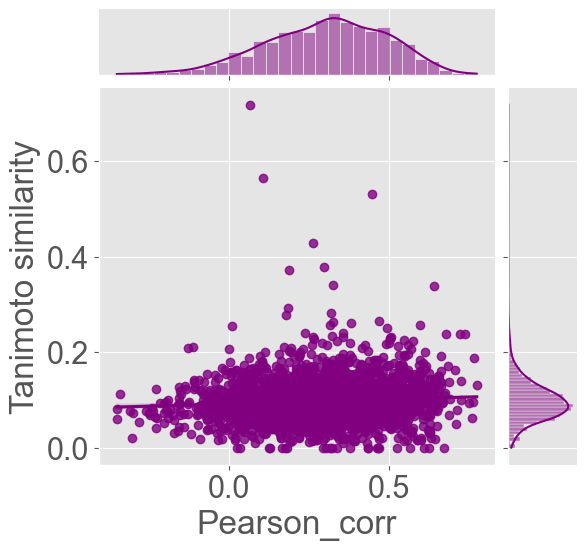

In [357]:
g1= sns.jointplot( x = tanimoto_pairs_df2.Similarity.to_list(), y = tanimoto_pairs_df.Similarity.to_list(),
                    # xlim = (13,26), ylim = (13,26),
                    kind="reg", 
                    # truncate=False,
                    color="purple", height=6)
g1.fig.set_size_inches(5.3, 5) 
g1.ax_joint.tick_params(labelsize=22)
g1.set_axis_labels('Pearson_corr','Tanimoto similarity', fontsize=24)
plt.show()

# multiomic molecules network

In [2]:
pearson_corr_mols  = input_multi_df.T.corr(method='pearson')
spearman_corr_mols = input_multi_df.T.corr(method='spearman')

NameError: name 'input_multi_df' is not defined

In [379]:
pearson_corr_mols

1-aminocyclopropane-1-carboxylic acid  \
1-aminocyclopropane-1-carboxylic acid                               1.000000   
1-aminocyclopropanecarboxylate                                      0.424527   
proline                                                            -0.158908   
indoline                                                           -0.200016   
2,6-xylidine                                                       -0.267786   
...                                                                      ...   
SUMO4                                                              -0.136107   
SRSF6                                                              -0.326014   
SEP11                                                              -0.110439   
HBG2                                                                0.258904   
H2B1L                                                               0.176088   

                                       1-aminocyclopropanecarboxylate  \
1-aminocyclopropane-1-carboxylic acid                        0.424527   
1-aminocyclopropanecarboxylate                               1.000000   
proline                                                     -0.217458   
indoline                                                    -0.449701   
2,6-xylidine                                                -0.435508   
...                                                               ...   
SUMO4                                                       -0.267059   
SRSF6                                                       -0.159433   
SEP11                                                       -0.021173   
HBG2                                                         0.318313   
H2B1L                                                        0.181440   

                                        proline  indoline  2,6-xylidine  \
1-aminocyclopropane-1-carboxylic acid -0.158908 -0.200016     -0.267786   
1-aminocyclopropanecarboxylate        -0.217458 -0.449701     -0.435508   
proline                                1.000000  0.557090      0.400616   
indoline                               0.557090  1.000000      0.615093   
2,6-xylidine                           0.400616  0.615093      1.000000   
...                                         ...       ...           ...   
SUMO4                                  0.186675  0.055776     -0.083778   
SRSF6                                 -0.024478  0.090283     -0.146246   
SEP11                                  0.032284  0.161687      0.037926   
HBG2                                   0.091805  0.022863      0.187997   
H2B1L                                  0.238529  0.172359      0.170483   

                                       2,4,6-trimethylpyridine  \
1-aminocyclopropane-1-carboxylic acid                -0.249140   
1-aminocyclopropanecarboxylate                       -0.426969   
proline                                               0.570446   
indoline                                              0.667787   
2,6-xylidine                                          0.790783   
...                                                        ...   
SUMO4                                                 0.051709   
SRSF6                                                -0.030588   
SEP11                                                 0.187796   
HBG2                                                  0.291575   
H2B1L                                                 0.222303   

                                       pipecolic acid  indole-3-carbinol  \
1-aminocyclopropane-1-carboxylic acid       -0.122757          -0.263388   
1-aminocyclopropanecarboxylate              -0.420419          -0.361109   
proline                                      0.613701           0.614994   
indoline                                     0.780000           0.545172   
2,6-xylidine                                 0.718342           0.635923   
...                                               .

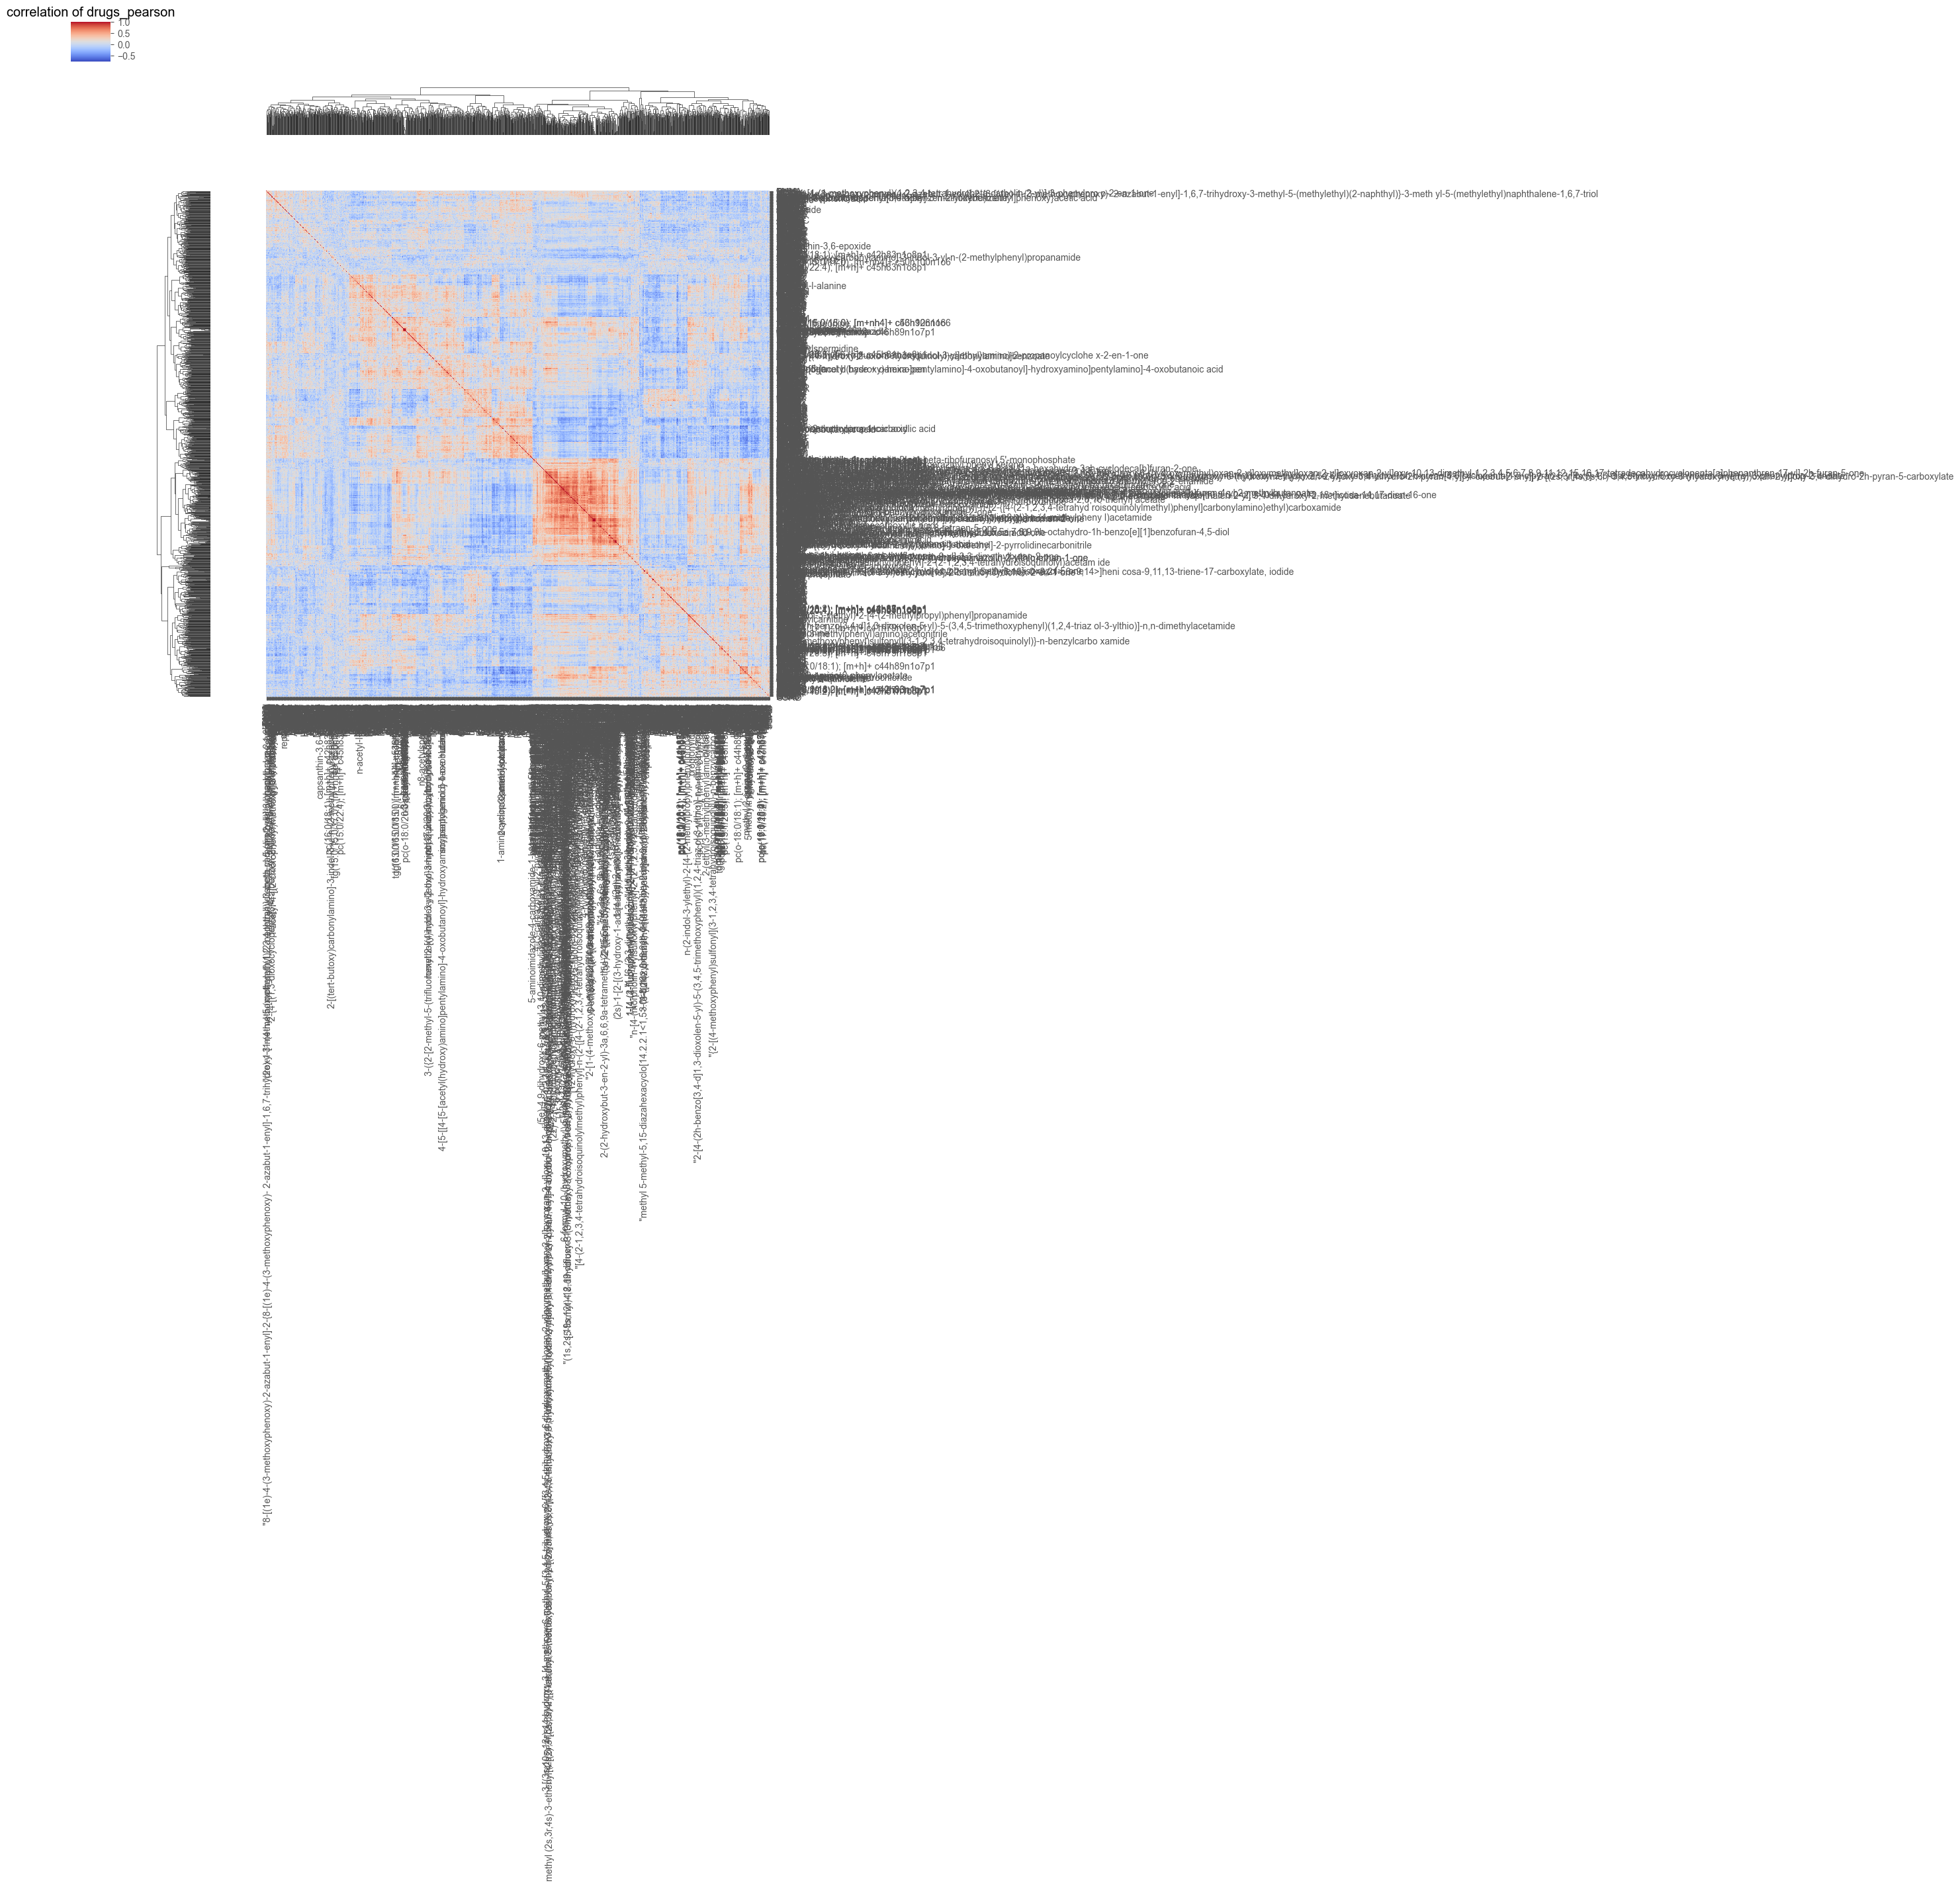

In [381]:
plot_corr_clustered_heatmap(plot_df = pearson_corr_mols,title_name = "correlation of drugs_pearson")

In [ ]:
plot_corr_clustered_heatmap(plot_df = spearman_corr_mols,title_name = "correlation of drugs_spearman")

In [506]:
log_pro_updown.loc['FBLL1'].std()

0.17037022366981922

In [507]:
log_pro_updown.loc['DX39A'].std()

0.04494930936878757

In [508]:
log_pro_updown.loc['BACH'].std()

0.054995654578418804

In [59]:
import gseapy as gp

In [60]:
enr_pro = gp.enrichr(gene_list= log_pro_updown.index[2:].tolist(), 
                 gene_sets='KEGG_2021_Human', 
                 organism='Human',  
                 outdir='enrichr_results'  
                )

C:\Users\jiangy5\Anaconda3\lib\site-packages\gseapy\plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
C:\Users\jiangy5\Anaconda3\lib\site-packages\gseapy\plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


In [61]:
pathway_pro = enr_pro.results

In [127]:
top_pathways = pathway_pro.iloc[:15,:]

In [128]:
top_pathways

Gene_set                                         Term Overlap  \
0   KEGG_2021_Human                                  Spliceosome  32/150   
1   KEGG_2021_Human                              DNA replication    9/36   
2   KEGG_2021_Human                   Non-homologous end-joining    5/13   
3   KEGG_2021_Human                    Pentose phosphate pathway    7/30   
4   KEGG_2021_Human                                RNA transport  20/186   
5   KEGG_2021_Human                                   Proteasome    8/46   
6   KEGG_2021_Human                 Glycolysis / Gluconeogenesis    8/67   
7   KEGG_2021_Human                         Base excision repair    5/33   
8   KEGG_2021_Human                            Parkinson disease  19/249   
9   KEGG_2021_Human                                   Cell cycle  11/124   
10  KEGG_2021_Human                         Renal cell carcinoma    7/69   
11  KEGG_2021_Human                    Citrate cycle (TCA cycle)    4/30   
12  KEGG_2021_Human                         Steroid biosynthesis    3/20   
13  KEGG_2021_Human  Protein processing in endoplasmic reticulum  13/171   
14  KEGG_2021_Human            Ribosome biogenesis in eukaryotes   9/108   

         P-value  Adjusted P-value  Old P-value  Old Adjusted P-value  \
0   2.973977e-12      7.048325e-10            0                     0   
1   5.639712e-05      6.683059e-03            0                     0   
2   2.977996e-04      2.352617e-02            0                     0   
3   6.004109e-04      3.557434e-02            0                     0   
4   1.191635e-03      5.648352e-02            0                     0   
5   1.939740e-03      7.661974e-02            0                     0   
6   1.920536e-02      6.502387e-01            0                     0   
7   2.381156e-02      7.054174e-01            0                     0   
8   4.858413e-02      9.999960e-01            0                     0   
9   4.918992e-02      9.999960e-01            0                     0   
10  5.881661e-02      9.999960e-01            0                     0   
11  6.245033e-02      9.999960e-01            0                     0   
12  7.718650e-02      9.999960e-01            0                     0   
13  9.284929e-02      9.999960e-01            0                     0   
14  9.570177e-02      9.999960e-01            0                     0   

    Odds Ratio  Combined Score  \
0     5.232956      138.888507   
1     6.314685       61.777150   
2    11.804726       95.843631   
3     5.755299       42.692214   
4     2.290860       15.423054   
5     3.981931       24.867959   
6     2.561792       10.125650   
7     3.369225       12.592763   
8     1.563813        4.729689   
9     1.839423        5.540466   
10    2.130640        6.036809   
11    2.900138        8.043195   
12    3.324902        8.516839   
13    1.554131        3.693823   
14    1.715648        4.025800   

                                                Genes  
0   DDX5;RBM25;SF3B2;SF3B3;RBM8A;DDX46;SF3B6;SRSF1...  
1        RFC5;FEN1;PCNA;MCM7;MCM3;MCM4;MCM5;MCM6;MCM2  
2                        FEN1;XRCC6;MRE11;PRKDC;XRCC5  
3               PRPS2;PRPS1;G6PD;ALDOC;ALDOA;TKT;PGM1  
4   RBM8A;FUS;FMR1;SUMO4;FXR2;XPO1;XPOT;EIF3I;TPR;...  
5     PSMD8;PSMD7;PSMD4;PSMD2;PSME3;PSMD3;PSME1;PSMD1  
6         LDHB;LDHA;ALDH2;PGAM1;PGK1;ALDOC;ALDOA;PGM1  
7                         FEN1;PCNA;PARP1;APEX1;HMGB1  
8   TRAP1;PARK7;COX5B;SDHA;SDHB;PSMD8;UCHL1;PSMD7;...  
9   HDAC2;PCNA;MCM7;PRKDC;CDK1;MCM3;MCM4;MCM5;MCM6...  
10               CDC42;RAP1A;ELOB;GRB2;ELOC;RAC1;CRKL  
11                               ACLY;SDHA;SDHB;IDH3A  
12                                    NSDHL;DHCR7;LBR  
13  ERO1A;PDIA3;UBXN1;SAR1A;RPN1;MOGS;PDIA6;CKAP4;...  
14     NOP56;NOP58;XPO1;IMP3;DKC1;NHP2;SBDS;FBLL1;RAN

In [129]:
top_pathways['Genes'] = top_pathways['Genes'].apply(lambda x: x.split(';'))
top_pathways

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_10424\1285090923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_pathways['Genes'] = top_pathways['Genes'].apply(lambda x: x.split(';'))


Gene_set                                         Term Overlap  \
0   KEGG_2021_Human                                  Spliceosome  32/150   
1   KEGG_2021_Human                              DNA replication    9/36   
2   KEGG_2021_Human                   Non-homologous end-joining    5/13   
3   KEGG_2021_Human                    Pentose phosphate pathway    7/30   
4   KEGG_2021_Human                                RNA transport  20/186   
5   KEGG_2021_Human                                   Proteasome    8/46   
6   KEGG_2021_Human                 Glycolysis / Gluconeogenesis    8/67   
7   KEGG_2021_Human                         Base excision repair    5/33   
8   KEGG_2021_Human                            Parkinson disease  19/249   
9   KEGG_2021_Human                                   Cell cycle  11/124   
10  KEGG_2021_Human                         Renal cell carcinoma    7/69   
11  KEGG_2021_Human                    Citrate cycle (TCA cycle)    4/30   
12  KEGG_2021_Human                         Steroid biosynthesis    3/20   
13  KEGG_2021_Human  Protein processing in endoplasmic reticulum  13/171   
14  KEGG_2021_Human            Ribosome biogenesis in eukaryotes   9/108   

         P-value  Adjusted P-value  Old P-value  Old Adjusted P-value  \
0   2.973977e-12      7.048325e-10            0                     0   
1   5.639712e-05      6.683059e-03            0                     0   
2   2.977996e-04      2.352617e-02            0                     0   
3   6.004109e-04      3.557434e-02            0                     0   
4   1.191635e-03      5.648352e-02            0                     0   
5   1.939740e-03      7.661974e-02            0                     0   
6   1.920536e-02      6.502387e-01            0                     0   
7   2.381156e-02      7.054174e-01            0                     0   
8   4.858413e-02      9.999960e-01            0                     0   
9   4.918992e-02      9.999960e-01            0                     0   
10  5.881661e-02      9.999960e-01            0                     0   
11  6.245033e-02      9.999960e-01            0                     0   
12  7.718650e-02      9.999960e-01            0                     0   
13  9.284929e-02      9.999960e-01            0                     0   
14  9.570177e-02      9.999960e-01            0                     0   

    Odds Ratio  Combined Score  \
0     5.232956      138.888507   
1     6.314685       61.777150   
2    11.804726       95.843631   
3     5.755299       42.692214   
4     2.290860       15.423054   
5     3.981931       24.867959   
6     2.561792       10.125650   
7     3.369225       12.592763   
8     1.563813        4.729689   
9     1.839423        5.540466   
10    2.130640        6.036809   
11    2.900138        8.043195   
12    3.324902        8.516839   
13    1.554131        3.693823   
14    1.715648        4.025800   

                                                Genes  
0   [DDX5, RBM25, SF3B2, SF3B3, RBM8A, DDX46, SF3B...  
1   [RFC5, FEN1, PCNA, MCM7, MCM3, MCM4, MCM5, MCM...  
2                  [FEN1, XRCC6, MRE11, PRKDC, XRCC5]  
3       [PRPS2, PRPS1, G6PD, ALDOC, ALDOA, TKT, PGM1]  
4   [RBM8A, FUS, FMR1, SUMO4, FXR2, XPO1, XPOT, EI...  
5   [PSMD8, PSMD7, PSMD4, PSMD2, PSME3, PSMD3, PSM...  
6   [LDHB, LDHA, ALDH2, PGAM1, PGK1, ALDOC, ALDOA,...  
7                   [FEN1, PCNA, PARP1, APEX1, HMGB1]  
8   [TRAP1, PARK7, COX5B, SDHA, SDHB, PSMD8, UCHL1...  
9   [HDAC2, PCNA, MCM7, PRKDC, CDK1, MCM3, MCM4, M...  
10       [CDC42, RAP1A, ELOB, GRB2, ELOC, RAC1, CRKL]  
11                          [ACLY, SDHA, SDHB, IDH3A]  
12                                [NSDHL, DHCR7, LBR]  
13  [ERO1A, PDIA3, UBXN1, SAR1A, RPN1, MOGS, PDIA6...  
14  [NOP56, NOP58, XPO1, IMP3, DKC1, NHP2, SBDS, F...

In [135]:
log_pro_updown.apply(zscore, axis=1)

DFO  Acamprosate  Acenocoumarol  Adenosylcobalamin  Aminophylline  \
TRYP  -0.783017     0.702680       0.472390          -0.945904       1.434679   
ALBU   1.383439     0.969670       0.129897           0.535916       0.242239   
FBLL1 -0.089873     0.322865       0.104500          -0.191502      -1.530937   
DX39A  2.579201    -1.071214      -0.270427          -0.148763       0.042482   
BACH  -3.497119    -0.828785       1.035602          -0.542500       0.146266   
...         ...          ...            ...                ...            ...   
SUMO4 -0.107324     0.929548      -0.488875           1.147960      -1.053930   
SRSF6 -1.638499    -0.522860       0.191477           0.266848      -0.938271   
SEP11 -0.524708    -0.320646      -1.282343           0.345714      -0.998282   
HBG2   0.949606     1.422622      -0.619167          -0.398071      -1.000987   
H2B1L  1.128907     0.211403       1.625343           0.590477      -0.657506   

       Asenapine  Azithromycin  Baricitinib  Benzbromarone   Benzoin  ...  \
TRYP    0.225984     -0.497008    -0.504413       0.730277  0.300471  ...   
ALBU   -0.271786      0.976441     2.041850      -0.339848  0.676217  ...   
FBLL1  -0.392851     -1.075342     0.599153      -1.259738 -0.214788  ...   
DX39A  -1.259223     -1.343070    -0.153891      -0.003416  0.967721  ...   
BACH   -0.285300      0.680365    -0.620856      -1.500974 -0.074109  ...   
...          ...           ...          ...            ...       ...  ...   
SUMO4   1.231274      0.496767     0.008340      -1.454975  1.062566  ...   
SRSF6   0.548526      1.328030     0.472676       0.215757  0.573594  ...   
SEP11   0.507850      1.582535     0.230156      -0.388512  0.750044  ...   
HBG2   -0.619452      1.059922     0.792797       0.530567 -0.339098  ...   
H2B1L  -0.443374      1.250208     0.301131       0.426785 -0.548360  ...   

       Thymopentin  Ticlopidine  Triclosan  Trimetazidine  Trimethoprim  \
TRYP     -0.735179     0.865886   0.530987       0.526322     -0.987328   
ALBU     -0.173576     0.705606  -1.107285       0.137186     -1.147731   
FBLL1     0.157650     0.550627   0.714100       0.956025      0.522329   
DX39A    -0.026744     0.222256   0.507088      -1.971449      0.141867   
BACH      0.559719    -0.694896   0.236588      -0.116112     -1.982558   
...            ...          ...        ...            ...           ...   
SUMO4    -1.089837     0.936067   1.265857       0.450938     -0.103520   
SRSF6    -0.454467    -0.344939   0.285626       1.291825      1.054418   
SEP11     0.543941     0.297305  -0.921714      -1.444793      0.263164   
HBG2      0.330237    -0.706318  -1.222986      -0.778433     -2.394797   
H2B1L    -0.998690     1.237635  -0.392736       0.561065      0.564807   

       Troxerutin  Valbenazine  Vinpocetine  Yohimbine  Zaltoprofen  
TRYP    -0.437550     1.214996     0.470892   0.531144    -1.306352  
ALBU     0.082610     0.073076    -1.497788   0.154888     0.640550  
FBLL1   -1.317416     0.178552     0.030529   1.855549    -1.638754  
DX39A   -0.353448     0.828797    -0.028491   0.061172     2.900463  
BACH     0.458667     1.271646    -0.077446  -0.057698    -0.380489  
...           ...          ...          ...        ...          ...  
SUMO4   -0.350358    -0.490608     0.168793   0.624128    -0.099580  
SRSF6   -2.203247     0.180811     0.690643   0.732180    -1.203686  
SEP11   -1.055435    -1.533823    -0.188467  -2.013059    -1.215731  
HBG2    -1.068495     0.404024    -1.084128  -0.336814     1.259914  
H2B1L   -1.082446    -1.271922     0.139941  -0.854749     2.859973  

[1012 rows x 73 columns]

In [1]:
# log_pro_updown.apply(zscore, axis=1).iloc[3,:].hist()

In [312]:
# df_expression = log_pro_updown.apply(zscore, axis=1)
df_expression = log_pro_updown
df_pathways = top_pathways

df_result = pd.DataFrame(columns=df_expression.columns)

for i, row in df_pathways.iterrows():
    pathway_genes = row['Genes']
    df_genes = df_expression.loc[pathway_genes]
    df_sum = df_genes.sum()
    df_result.loc[row['Term']] = df_sum
# df_result
# df_result = df_result.apply(zscore, axis=1)
# df_result = df_result.apply(lambda x: x / np.abs(x).max(), axis=1)
df_result

DFO  Acamprosate  \
Spliceosome                                  1.518492    -0.583835   
DNA replication                             -0.713493    -0.570590   
Non-homologous end-joining                  -0.194233    -0.239457   
Pentose phosphate pathway                    0.163183     0.059907   
RNA transport                                0.679932    -0.627662   
Proteasome                                  -0.694967    -0.484639   
Glycolysis / Gluconeogenesis                 0.395020     0.199941   
Base excision repair                         0.120748     0.122204   
Parkinson disease                           -0.877181    -0.932366   
Cell cycle                                  -0.723869    -0.625507   
Renal cell carcinoma                        -0.320868    -0.078355   
Citrate cycle (TCA cycle)                   -0.606157    -0.323377   
Steroid biosynthesis                        -0.118109    -0.268153   
Protein processing in endoplasmic reticulum  0.801856    -0.013923   
Ribosome biogenesis in eukaryotes            0.148603    -0.251320   

                                             Acenocoumarol  Adenosylcobalamin  \
Spliceosome                                      -1.055063          -0.150830   
DNA replication                                  -0.179258          -0.428140   
Non-homologous end-joining                       -0.070197          -0.146661   
Pentose phosphate pathway                        -0.027871          -0.219232   
RNA transport                                    -0.569234          -0.571022   
Proteasome                                        0.044710          -0.247584   
Glycolysis / Gluconeogenesis                     -0.100964          -0.099293   
Base excision repair                              0.047787           0.280943   
Parkinson disease                                -0.082676          -0.257954   
Cell cycle                                       -0.582884          -0.377172   
Renal cell carcinoma                             -0.189353          -0.210707   
Citrate cycle (TCA cycle)                        -0.196616          -0.020065   
Steroid biosynthesis                             -0.219896          -0.298752   
Protein processing in endoplasmic reticulum      -0.062497          -0.293743   
Ribosome biogenesis in eukaryotes                -0.260691          -0.184985   

                                             Aminophylline  Asenapine  \
Spliceosome                                      -1.499892   1.391306   
DNA replication                                   0.144139   0.030135   
Non-homologous end-joining                       -0.186652  -0.205778   
Pentose phosphate pathway                        -0.185852   0.106157   
RNA transport                                    -0.663355   0.759336   
Proteasome                                       -0.127936  -0.194554   
Glycolysis / Gluconeogenesis                      0.172658   0.630380   
Base excision repair                             -0.106287   0.080878   
Parkinson disease                                -0.376600   0.460659   
Cell cycle                                        0.294651   0.237856   
Renal cell carcinoma                             -0.476806   0.043243   
Citrate cycle (TCA cycle)                        -0.152733  -0.181866   
Steroid biosynthesis                             -0.288191  -0.200026   
Protein processing in endoplasmic reticulum      -0.317479  -0.115556   
Ribosome biogenesis in eukaryotes                -0.668875   0.313115   

                                             Azithromycin  Baricitinib  \
Spliceosome                                      0.312740    -0.288887   
DNA replication                                 -0.359768    -0.712797   
Non-homologous end-joining                      -0.115480    -0.324186   
Pentose phosphate pathway                        0.412998     0.030311   
RNA transport                                   -0.560895    -0.199538   
Proteasome         

In [313]:
def plot_clusterheatmap2(dfheatmap, low=-2, high=2, figure_size = (21, 9)):
    # Define custom color map
    colors = ["#437EB8", "#8EBBE7", "#D8E2EB", "white", "#D8E2EB", "#EB6CB6", "#E72998"]
    n_bins = 10  # Number of bins in the color map
    cmap_name = "custom_diverging"
    custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)
#     custom_cmap = "viridis"
    # Create the heatmap with the custom color map
    plt.rcParams['font.family'] = 'Arial'
        # Create the heatmap with the custom color map, figure size, and hidden dendrograms
    ax = sns.clustermap(dfheatmap, annot=False, cmap='viridis',cbar=True, vmin=low, vmax=high,
                        figsize = figure_size,  # Set the figure size here
                        row_cluster=False,  # Enable row clustering
                        col_cluster=False,  # Enable column clustering
                        dendrogram_ratio=(.001, .001),  # Minimize the dendrogram size
                        tree_kws={'linewidths': 0}, # Make dendrogram lines invisible
                        cbar_pos=(-0.05, 0.76, 0.025, 0.20))
    # Customize the color bar ticks and labels
    cbar = ax.ax_heatmap.collections[0].colorbar
    cbar.ax.tick_params(labelsize = 20) 

    ax.ax_heatmap.set_xticklabels(ax.ax_heatmap.get_xticklabels(), rotation=90, fontsize=22)  # Customize x-tick labels
    ax.ax_heatmap.set_yticklabels(ax.ax_heatmap.get_yticklabels(), fontsize=20)  # Customize y-tick labels
    ax.ax_heatmap.tick_params(axis='x', which='both', length=0)
    # plt.savefig(f'{figure_save_path}/_clustered_heatmap.svg', dpi=800, bbox_inches='tight')
    # plt.tight_layout()
    plt.show()

In [309]:
# ['Chlorthalidone','Hydroquinidine','Nilvadipine','Pentoxifylline','Vinpocetine'] 

In [310]:
# select_drugs_for_heatmap

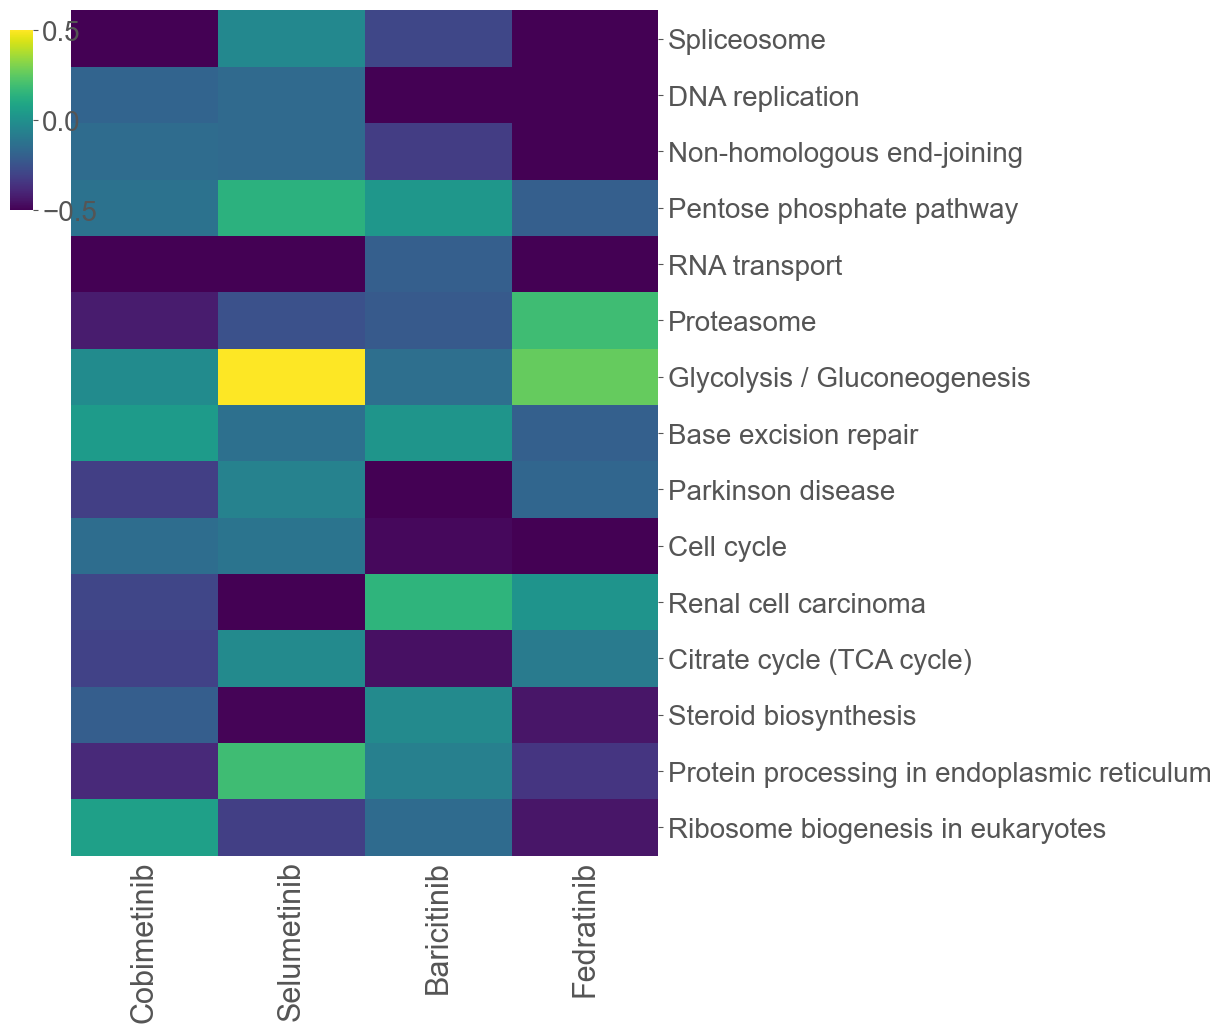

In [315]:
# drug_lists_heatmap = ['Chlorthalidone','Hydroquinidine','Nilvadipine','Pentoxifylline','Vinpocetine'] 
# drug_lists_heatmap = ['Hydroquinidine','Nilvadipine','Vinpocetine'] 
# drug_lists_heatmap = ['Trimetazidine','Linagliptin','Fenofibrate']
drug_lists_heatmap = ['Cobimetinib', 'Selumetinib','Baricitinib', 'Fedratinib']
# drug_lists_heatmap = ['Lidocaine','Bupivacaine']
# drug_lists_heatmap = ['Yohimbine','Riboflavin','Piperacillin','Hydroquinidine','Valbenazine']
# drug_lists_heatmap = ['Carbinoxamine',	'Chlorphenoxamine']
select_drugs_for_heatmap = df_result.loc[:, drug_lists_heatmap]
plot_clusterheatmap2(select_drugs_for_heatmap, low=-0.5, high=0.5,figure_size = (9, 9))

# clustering analysis

In [31]:
def optimise_k_means(data,max_k):
    means=[]
    inertias=[]
    for k in range(1,max_k):
        kmeans=KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)
    fig=plt.subplots(figsize=(10,5))
    plt.plot(means,inertias)
    plt.xlabel('number of clusters')
    plt.ylabel('inertia')
    plt.show()

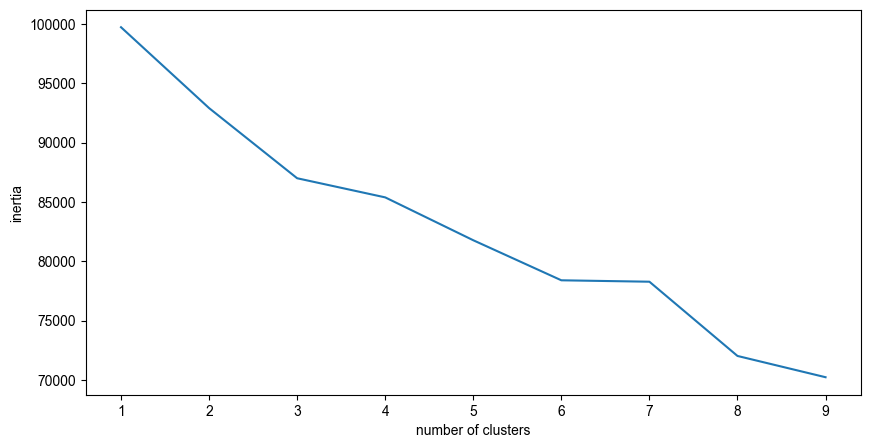

In [32]:
optimise_k_means(multi_hm_df,10)

In [34]:
kmean_df = multi_hm_df 

kmeans=KMeans(n_clusters=4,random_state=26)
kmeans.fit(kmean_df)

kmean_df['kmeans']=kmeans.labels_
kmean_df

0         1         2         3         4         5  \
DFO               -0.726048  2.132182  2.132182  3.029935  3.030446  3.119271   
Acamprosate        0.205498 -0.460505 -0.460505 -0.069497 -0.070666  0.260887   
Acenocoumarol     -0.605921  0.378469  0.378469 -0.082405 -0.082645  0.611005   
Adenosylcobalamin -0.396566  1.863384  1.863384  1.863853  1.863391  2.273244   
Aminophylline      0.053522 -0.431801 -0.431801 -0.851519 -0.851447 -0.008418   
...                     ...       ...       ...       ...       ...       ...   
Troxerutin         0.256464 -0.465497 -0.465497 -0.921213 -0.922245 -0.740697   
Valbenazine       -0.507178 -0.720219 -0.720219 -1.223947 -1.221594 -0.773604   
Vinpocetine        0.962519 -1.112213 -1.112213 -0.820409 -0.818133 -0.922477   
Yohimbine         -0.672800 -0.751955 -0.751955 -1.268992 -1.266589 -0.994085   
Zaltoprofen        2.451940 -0.565972 -0.565972 -0.995281 -0.994250 -0.672747   

                          6         7         8         9  ...     H2A1C  \
DFO                3.011129  4.582389  4.266695  4.576217  ...  0.233669   
Acamprosate        0.805121  0.703751  0.596500  0.754953  ...  1.798060   
Acenocoumarol      0.405461 -0.396861 -0.456427 -0.365363  ... -1.477469   
Adenosylcobalamin  1.775585  1.300003  1.314701  1.232062  ...  0.110574   
Aminophylline     -0.752547 -0.794681 -0.848222 -0.769656  ... -0.497334   
...                     ...       ...       ...       ...  ...       ...   
Troxerutin        -1.240129 -0.707605 -0.772199 -0.791377  ...  0.800942   
Valbenazine       -0.937071 -1.704805 -1.717884 -1.722825  ... -0.799952   
Vinpocetine       -0.701658 -0.398381  0.364556 -0.421102  ... -0.764779   
Yohimbine         -0.914233 -1.216538 -1.243513 -1.220091  ... -0.250186   
Zaltoprofen       -0.841402 -1.158475 -1.204359 -1.202062  ... -2.127607   

                      CALM3       H12     GNAS1     SUMO4     SRSF6     SEP11  \
DFO                0.416248 -2.977887  0.803466  0.139270 -2.291159 -0.140664   
Acamprosate       -0.708186  0.720977 -0.069137  0.883156 -0.726550 -0.417983   
Acenocoumarol      0.511567 -0.683114  0.626527 -0.435191  0.150437 -1.319875   
Adenosylcobalamin  0.337924 -0.951219 -0.728504  1.164443 -0.273526  0.201295   
Aminophylline     -0.216722  0.240325 -0.826706 -1.180443 -1.038919 -1.288257   
...                     ...       ...       ...       ...       ...       ...   
Troxerutin         0.085950  1.765054  2.720661 -0.319048 -1.783597 -1.014519   
Valbenazine        0.036204 -1.495912 -0.594155 -0.589128 -0.445726 -1.583011   
Vinpocetine        0.572863 -0.792191 -0.391010  0.121393  0.520175 -0.288311   
Yohimbine          0.383994 -0.213941  0.118457  0.541737  0.920315 -1.602668   
Zaltoprofen       -2.531521 -0.078723 -0.071393  0.093402 -0.604263 -0.773247   

                       HBG2     H2B1L  kmeans  
DFO                1.015484  1.337646       2  
Acamprosate        1.391986  0.142421       2  
Acenocoumarol     -0.570602  1.732988       3  
Adenosylcobalamin -0.418260  0.583742       2  
Aminophylline     -0.996529 -0.764923       3  
...                     ...       ...     ...  
Troxerutin        -0.993697 -0.995982       3  
Valbenazine        0.307940 -1.321579       3  
Vinpocetine       -1.039907  0.054532       3  
Yohimbine         -0.369578 -0.845207       3  
Zaltoprofen        1.320742  3.194897       3  

[73 rows x 1367 columns]

In [35]:
ji = kmean_df.sort_values(by='kmeans')

In [37]:
df = ji

# cluster9=df.loc[df['kmeans']==9]
# cluster8=df.loc[df['kmeans']==8]
# cluster7=df.loc[df['kmeans']==7]
# cluster6=df.loc[df['kmeans']==6]
# cluster5=df.loc[df['kmeans']==5]
# cluster4=df.loc[df['kmeans']==4]
cluster3=df.loc[df['kmeans']==3]
cluster2=df.loc[df['kmeans']==2]
cluster1=df.loc[df['kmeans']==1]
cluster0=df.loc[df['kmeans']==0]

In [38]:
cluster3.index

Index(['Quetiapine', 'Piperacillin', 'Thymopentin', 'Tetrabenazine',
       'Trimetazidine', 'Troxerutin', 'Valbenazine', 'Vinpocetine',
       'Riboflavin', 'Phenazopyridine', 'Ixabepilone', 'Penfluridol',
       'Acenocoumarol', 'Aminophylline', 'Baricitinib', 'Benzbromarone',
       'Carbinoxamine maleate salt', 'Chlorthalidone', 'Cysteamine',
       'Deoxycorticosterone acetate', 'Dexrazoxane', 'Fedratinib',
       'Fenofibrate', 'Fidaxomicin', 'Frovatriptan', 'Granisetron',
       'Hydroquinidine', 'Yohimbine', 'Mozavaptan', 'Nilvadipine',
       'Oxyphenisatine', 'Phenazine', 'Zaltoprofen'],
      dtype='object')

In [39]:
cluster2.index

Index(['Saccharin', 'Secnidazole', 'Hexylresorcinol', 'Lidocaine', 'Glafenine',
       'DFO', 'Pentoxifylline', 'Chlorotrianisene', 'Cefetamet pivoxil',
       'Bupivacaine', 'Benzoin', 'Azithromycin', 'Propofol',
       'Adenosylcobalamin', 'Acamprosate', 'Sulpiride', 'Cobimetinib'],
      dtype='object')

In [40]:
cluster0.index

Index(['Danoprevir', 'D-Pantothenic acid', 'Edaravone'], dtype='object')

In [41]:
cluster1.index

Index(['Monocrotaline', 'Thiabendazole', 'Finasteride', 'Ticlopidine',
       'Melitracen', 'Cloperastine', 'Chlorzoxazone', 'Triclosan',
       'Chlorphenoxamine', 'Cefodizime', 'Selumetinib', 'Bromfenac',
       'Trimethoprim', 'Ornidazole', 'Rotigotine', 'Asenapine', 'Raltegravir',
       'Linagliptin', 'Mafenide', 'Nortriptyline'],
      dtype='object')

In [42]:
# data = cluster5

# plt.figure(figsize=(10, 4), edgecolor='#04253a')
# plt.rcParams['font.family'] = 'Arial'
# for i in range(data.shape[0]):
#     plt.plot(range(data.shape[1]-1), data.iloc[i,:-1])  
#     #plt.title(title, fontsize=24)
# plt.xlabel('Treatment', fontsize=24)
# plt.ylabel('Score', fontsize=24)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=22)

In [43]:
cluster_data = {'drug_Cluster 1': cluster0,
                'drug_Cluster 2': cluster1,
                'drug_Cluster 3': cluster2,
                'drug_Cluster 4': cluster3,}
#                 'drug_Cluster 5': cluster4,
#                 'drug_Cluster 6': cluster5,
#                 'drug_Cluster 7': cluster6,
#                 'drug_Cluster 8': cluster7,
#                 'drug_Cluster 9': cluster8,}

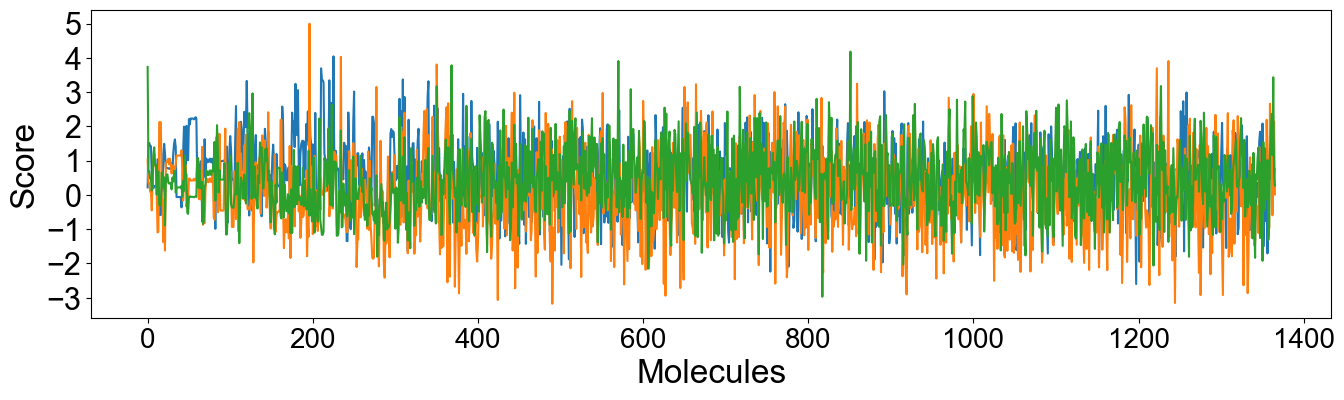

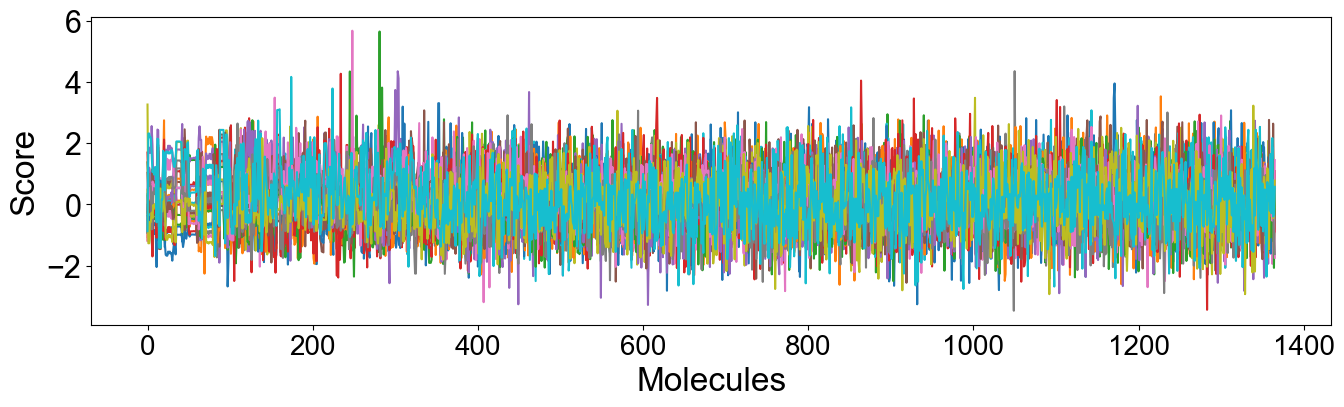

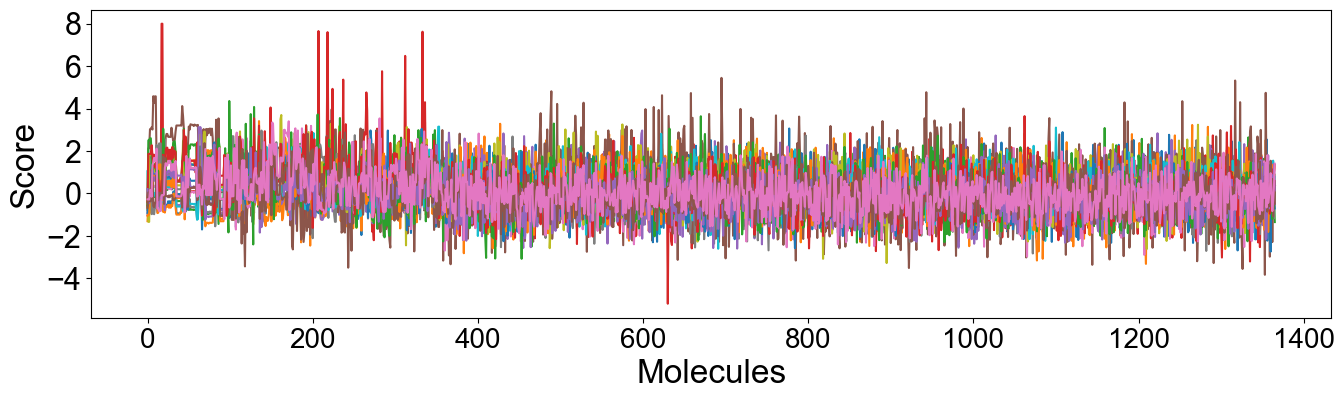

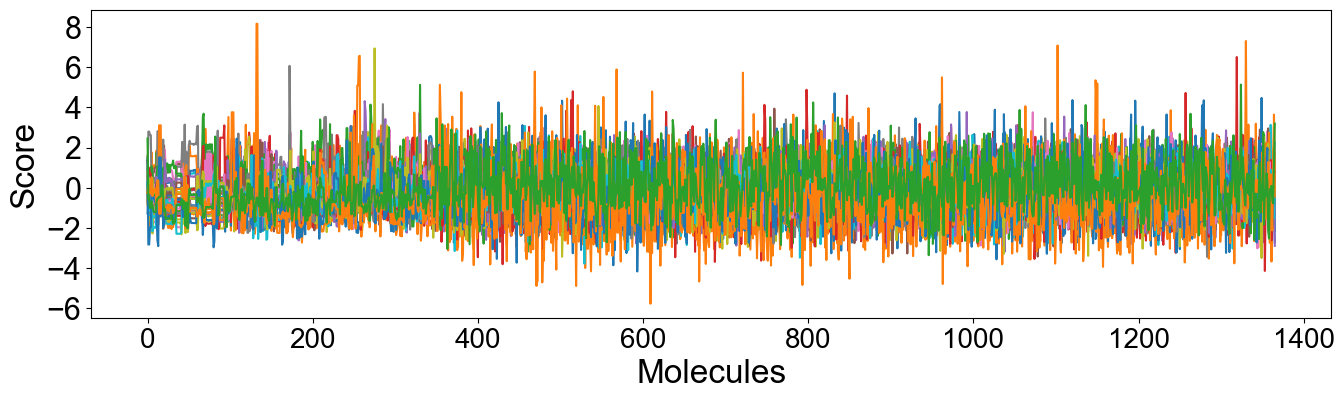

In [384]:
for title, data in cluster_data.items():
    plt.figure(figsize=(16, 4), edgecolor='#04253a')
    plt.rcParams['font.family'] = 'Arial'
    for i in range(data.shape[0]):
        plt.plot(range(data.shape[1]-1), data.iloc[i,:-1])  
        #plt.title(title, fontsize=24)
    plt.xlabel('Molecules', fontsize=24)
    plt.ylabel('Score', fontsize=24)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=22)
#     plt.legend()
#     plt.savefig(r'D:\\project7_SMAD\\figure_3_macro_clustering_analysis\\SI_figures\\{}.svg'.format(title),dpi=800,bbox_inches='tight')
    plt.show()

In [ ]:
df = ji

cluster3=df.loc[df['kmeans']==3]
cluster2=df.loc[df['kmeans']==2]
cluster1=df.loc[df['kmeans']==1]
cluster0=df.loc[df['kmeans']==0]

# Create a dictionary of cluster names and corresponding data
cluster_data = {'drug_Cluster 1': sigpro_stdrow.loc[list(sig_cluster0.index)],
                'drug_Cluster 2': sigpro_stdrow.loc[list(sig_cluster1.index)],
                'drug_Cluster 3': sigpro_stdrow.loc[list(sig_cluster2.index)],
                'drug_Cluster 4': sigpro_stdrow.loc[list(sig_cluster3.index)],}
                #'Cluster 5': sigpro_stdrow.loc[list(sig_cluster4.index)]}

# Loop over the dictionary items to plot the data for each cluster
for title, data in cluster_data.items():
    plt.figure(figsize=(6, 5), edgecolor='#04253a')
    plt.rcParams['font.family'] = 'Arial'
    for i in range(len(data)):
        plt.plot(x, data.iloc[i, :3])  
    #plt.title(title, fontsize=24)
    plt.xlabel('Treatment', fontsize=24)
    plt.ylabel('Score', fontsize=24)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=22)
#     plt.savefig(r'D:\\project7_SMAD\\figure_3_macro_clustering_analysis\\SI_figures\\{}.svg'.format(title),dpi=800,bbox_inches='tight')
    plt.show()

In [58]:
pro_mean = pd.read_csv(r'C:\Users\jiangy5\Box\SMAD PROJECT\new_druganalysis\proteome\test\files\proteome_mean.csv',index_col = 0)

meta_mean = pd.read_csv(r'C:\Users\jiangy5\Box\SMAD PROJECT\new_druganalysis\metabolome\test\files\metabolome_mean.csv',index_col = 0)

In [61]:
# pro_mean

In [62]:
# meta_mean

In [94]:
# pro_all = pd.read_csv(r'C:\Users\jiangy5\Box\SMAD PROJECT\new_druganalysis\proteome\test\files\proteome_scaled_for_chord.csv',index_col = 0)

# meta_all = pd.read_csv(r'C:\Users\jiangy5\Box\SMAD PROJECT\new_druganalysis\metabolome\test\files\metabolome_scaled_for_chord.csv',index_col = 0)

#  heatmap _ clustered_ all_ with _duplicates 

In [149]:
meta_all = pd.read_csv(r'C:\Users\jiangy5\Box\SMAD PROJECT\new_druganalysis\metabolome\test\files\metabolome_up_down_scaled.csv',index_col = 0).T
pro_all  = pd.read_csv(r'C:\Users\jiangy5\Box\SMAD PROJECT\new_druganalysis\proteome\test\files\proteome_up_down_scaled.csv',index_col = 0).T

In [150]:
# DatasetNormalizeDf.standardscaler(df_meta)

In [151]:
# DatasetNormalizeDf.standardscaler(df_pro)

In [152]:
meta_all.columns = [str(item) for item in range(meta_all.shape[1])]

all_dual = pd.concat([meta_all,pro_all], axis=1)

list_name =  ['no'] * meta_all.shape[1]+['yes']* pro_all.shape[1]

In [153]:
len(list_name)

1519

In [154]:
all_dual.T

DFO  Acamprosate  Acenocoumarol  Adenosylcobalamin  Aminophylline  \
0     -0.692692     0.481974      -0.443984          -0.336520       0.259366   
1     -0.686562    -0.341802      -0.160574          -1.589803      -0.171199   
2      2.970358    -0.062831       0.454830           1.768677      -0.411856   
3      3.790890    -0.107755      -0.449430           2.174696      -0.656319   
4      3.790890    -0.107755      -0.449430           2.174696      -0.656319   
...         ...          ...            ...                ...            ...   
SUMO4  0.139270     0.883156      -0.435191           1.164443      -1.180443   
SRSF6 -2.291159    -0.726550       0.150437          -0.273526      -1.038919   
SEP11 -0.140664    -0.417983      -1.319875           0.201295      -1.288257   
HBG2   1.015484     1.391986      -0.570602          -0.418260      -0.996529   
H2B1L  1.337646     0.142421       1.732988           0.583742      -0.764923   

       Asenapine  Azithromycin  Baricitinib  Benzbromarone   Benzoin  ...  \
0      -0.206484     -1.038616     0.818983       0.113689 -0.898844  ...   
1       0.381562      1.638669     0.658416      -0.265531 -0.136224  ...   
2       1.805514      0.307265     0.959437      -0.230617  0.110862  ...   
3      -0.082493     -0.324043    -0.436053       1.454932  0.161753  ...   
4      -0.082493     -0.324043    -0.436053       1.454932  0.161753  ...   
...          ...           ...          ...            ...       ...  ...   
SUMO4   1.062382      0.439580     0.002667      -1.233094  0.871436  ...   
SRSF6   0.373302      1.142281     0.393206       0.472177  0.258343  ...   
SEP11   0.363219      1.354738     0.540491      -0.194186  0.457809  ...   
HBG2   -0.682445      1.009468     0.731390       0.522725 -0.427264  ...   
H2B1L  -0.589910      1.283321     0.259543       0.514488 -0.705878  ...   

       Thymopentin  Ticlopidine  Triclosan  Trimetazidine  Trimethoprim  \
0         0.240468    -0.495356  -0.093257      -0.491762     -0.941181   
1         0.891344    -0.466697  -0.434121      -1.244786     -1.043638   
2        -0.219515     0.926846   0.786699      -0.943041      0.054173   
3        -1.352745    -0.194360  -0.529529      -0.016167      0.568274   
4        -1.352745    -0.194360  -0.529529      -0.016167      0.568274   
...            ...          ...        ...            ...           ...   
SUMO4    -1.099053     0.719595   1.065244       0.345754     -0.164903   
SRSF6    -0.307866    -0.111621  -0.064245       1.128222      1.485820   
SEP11     0.194999    -0.108732  -1.200854      -1.220134      0.371361   
HBG2      0.242540    -0.764577  -1.201378      -0.798863     -2.072207   
H2B1L    -1.028794     1.091699  -0.543643       0.491454      0.508130   

       Troxerutin  Valbenazine  Vinpocetine  Yohimbine  Zaltoprofen  
0        0.276824    -0.568886     0.842581  -0.699466     2.877844  
1       -0.422390     0.557852     0.046274   0.413876     1.834564  
2       -0.907903     0.188267    -0.001483  -1.076976    -0.457208  
3       -1.013419    -1.533918    -0.922109  -1.453629    -0.879550  
4       -1.013419    -1.533918    -0.922109  -1.453629    -0.879550  
...           ...          ...          ...        ...          ...  
SUMO4   -0.319048    -0.589128     0.121393   0.541737     0.093402  
SRSF6   -1.783597    -0.445726     0.520175   0.920315    -0.604263  
SEP11   -1.014519    -1.583011    -0.288311  -1.602668    -0.773247  
HBG2    -0.993697     0.307940    -1.039907  -0.369578     1.320742  
H2B1L   -0.995982    -1.321579     0.054532  -0.845207     3.194897  

[1519 rows x 73 columns]

In [155]:
category_colors = {
    'Analgesics/Anesthetics': 'green',
    'Miscellaneous': 'orange',
    'Nutritional Supplements': 'blue',
    'Antihistamines/Antiallergics':'#f4acb7' ,
    'Antibiotics/Antimicrobials': 'purple',
    'Cardiovascular Agents': 'brown',
    'Anticancer Agents': 'red',
    'CNS Agents': 'gray',
    'Immunomodulators': '#606c38',
    'Gastrointestinal Agents': 'cyan'
}

In [156]:
# dict(zip(merged_df2.index, merged_df2['cato']))

In [157]:
# merged_df2

In [158]:
drug_type_dict = dict(zip(merged_df2.index, merged_df2['cato']))

In [159]:
drug_cato_list = ["Miscellaneous"] + [drug_type_dict[drug] for drug in all_dual.index if drug in drug_type_dict]

In [160]:
# pd.Series(drug_cato_list).map(category_colors).tolist()

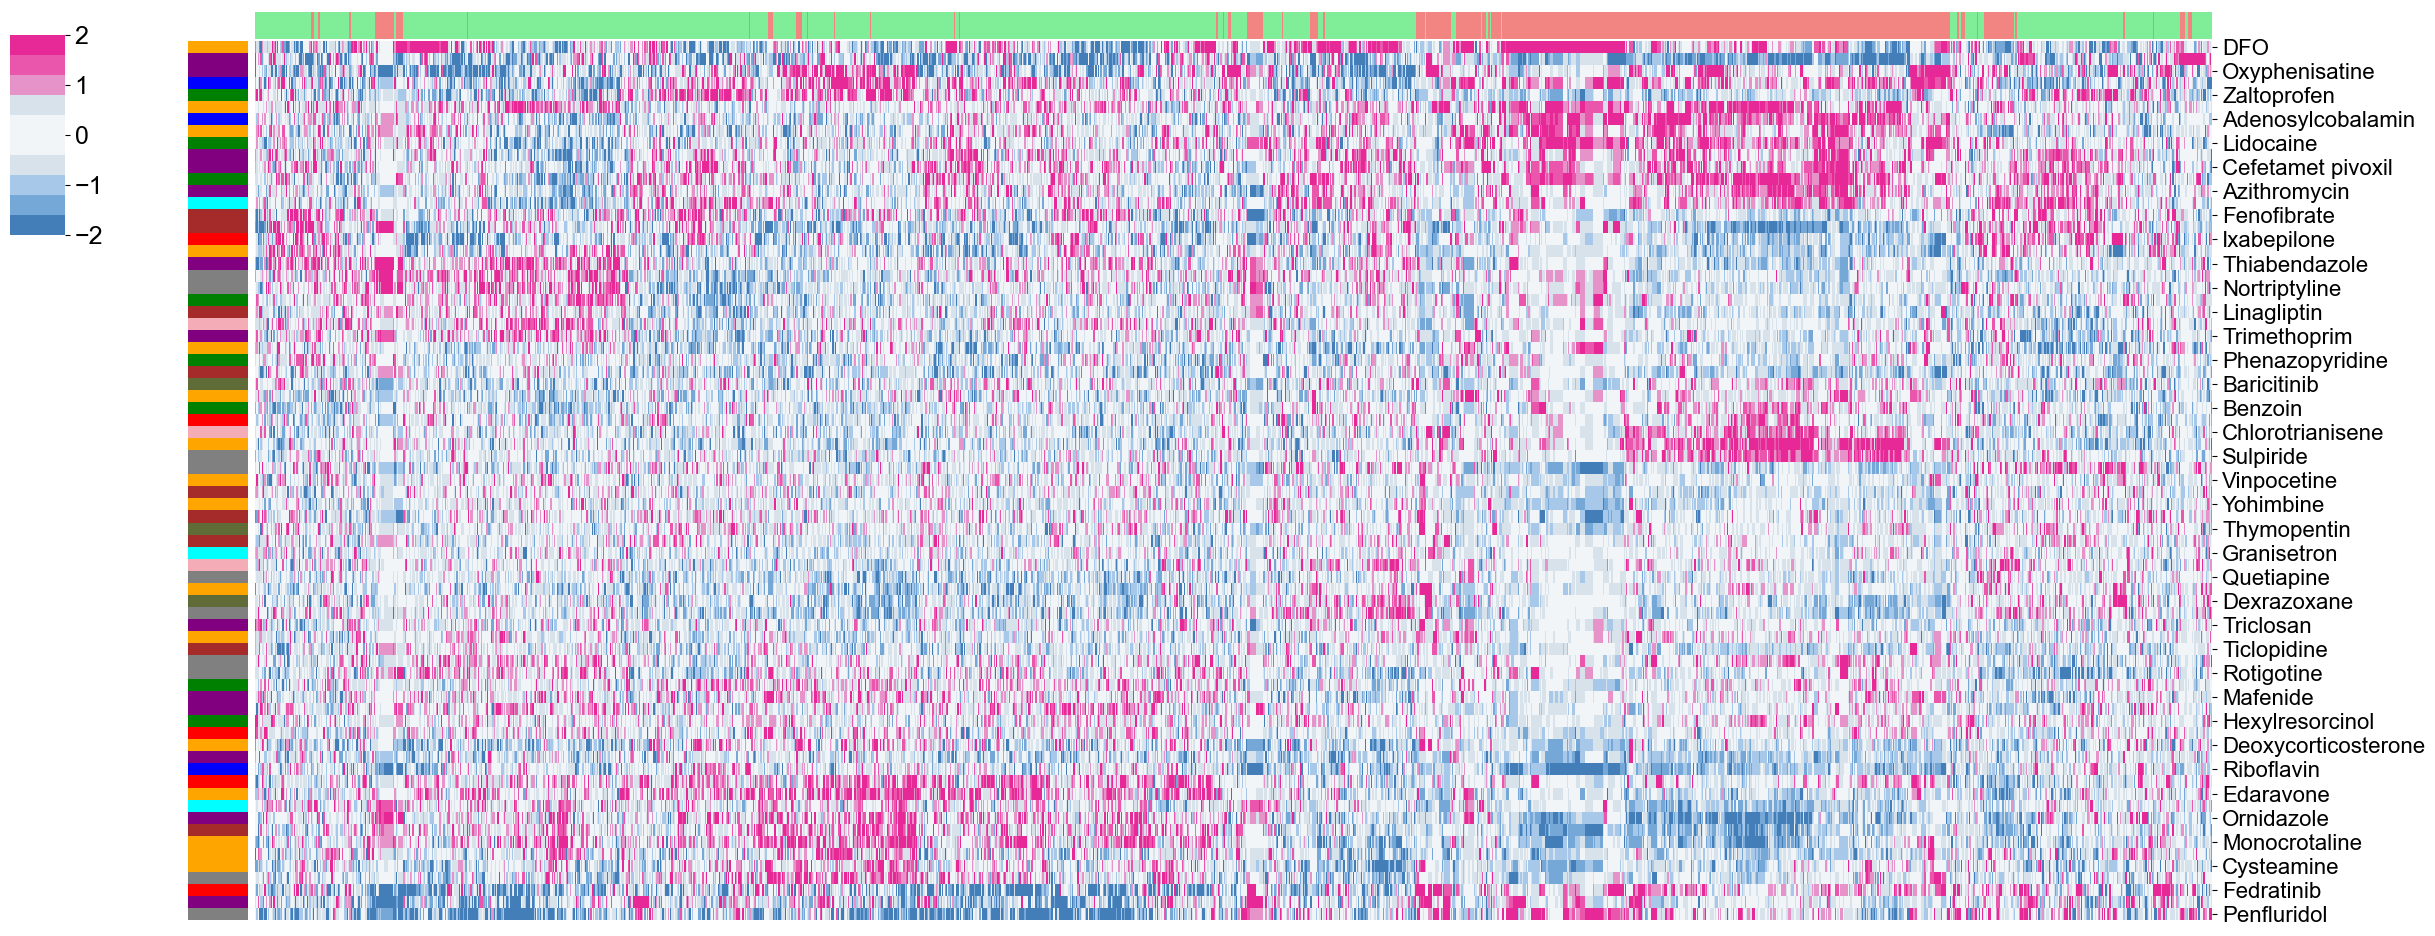

In [171]:
colors = ["#437EB8", "#8EBBE7", "#D8E2EB", "white", "#D8E2EB", "#EB6CB6", "#E72998"]
n_bins = 10  # Number of bins in the color map
cmap_name = "custom_diverging"
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

color_dict = {"yes": '#80ed99', "no": '#f28482'} 
category_colors = {
    'Analgesics/Anesthetics': 'green',
    'Miscellaneous': 'orange',
    'Nutritional Supplements': 'blue',
    'Antihistamines/Antiallergics':'#f4acb7' ,
    'Antibiotics/Antimicrobials': 'purple',
    'Cardiovascular Agents': 'brown',
    'Anticancer Agents': 'red',
    'CNS Agents': 'gray',
    'Immunomodulators': '#606c38',
    'Gastrointestinal Agents': 'cyan'
}

col_colors = pd.Series(list_name).map(color_dict).tolist()
row_colors = pd.Series(drug_cato_list).map(category_colors).tolist()
colors_transposed = dict(zip(all_dual.T.index, col_colors))
row_colors_transposed = dict(zip(all_dual.index, row_colors))
# Create the heatmap with the custom color map
plt.rcParams['font.family'] = 'Arial'
 # Create the heatmap with the custom color map, figure size, and hidden dendrograms
g = sns.clustermap(all_dual, annot=False, cmap=custom_cmap, vmin=-2, vmax=2,
                   col_colors=all_dual.T.index.map(colors_transposed),
                   row_colors= all_dual.index.map(row_colors_transposed),
                        figsize=(22, 10),  # Set the figure size here
                        row_cluster=True,  # Enable row clustering
                        col_cluster=True,  # Enable column clustering
                        dendrogram_ratio=(.001, .001),  # Minimize the dendrogram size
                        tree_kws={'linewidths': 0},
                        fmt=".3f",
                        cbar_pos=(-0.07, 0.76, 0.025, 0.20))  # Make dendrogram lines invisible
# Set tick label size
# g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(),rotation=90, fontsize=16)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize=16)
# g.ax_heatmap.set_yticklabels([])
g.ax_heatmap.set_xticklabels([])
g.ax_heatmap.tick_params(axis='x', which='both', length=0)
g.ax_row_dendrogram.set_position([0.12, 0.12, 0.20, 0.65])  # [x, y, width, height]
cbar = g.cax
for label in cbar.get_yticklabels():
    label.set_size(18)  # 设置字体大小为16   
plt.show()

# UMAP analysis

In [181]:
rawdf_meta = pd.read_csv(r'C:\Users\jiangy5\Box\SMAD PROJECT\new_druganalysis\metabolome\test\files\metabolome_after_Normalization imputation BC and index rename.csv',index_col = 0)

In [182]:
rawdf_pro = pd.read_csv(r'C:\Users\jiangy5\Box\SMAD PROJECT\new_druganalysis\proteome\test\files\proteome_after_Normalization imputation BC and index rename.csv',index_col = 0)

In [201]:
# rawdf_meta

In [185]:
combine = pd.concat([rawdf_meta,rawdf_pro], axis=0)

In [196]:
import umap

# Function to determine label
def get_label(index):
    for name in namestrings:
        if name in index:
            return name
    return 'others'
def plot_umap(df, namestring = ['1'], figuretitle = 'UMAP'):
    plt.rcParams['font.family'] = 'Arial'
    reducer = umap.UMAP(n_neighbors=15, n_components=2, random_state=42)

    embedding = reducer.fit_transform(df)   
    # Step 3: Create a new DataFrame for UMAP results
    umap_df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'], index=df.index)
    
    # Step 4: Add non-numeric labels to the new DataFrame
#     umap_df['Label'] = df.index.map(lambda x: namestring1 if namestring1 in x else
#                                               namestring2 if namestring2 in x else
#                                               namestring3 if namestring3 in x else 'others')
    umap_df['Label'] = df.index.map(get_label)

    # Step 5: Plot using the new DataFrame
    #palette = {namestring: 'red', 'others': 'grey'}
    #palette = color_dict
    plt.figure(figsize=(5, 4))
    sns.scatterplot(x='UMAP1', y='UMAP2', hue='Label', data=umap_df, s=60, alpha=0.8, legend=True)
    plt.title(figuretitle,fontsize=20)
    plt.xlabel('UMAP 1',fontsize=20)
    plt.ylabel('UMAP 2',fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

In [199]:
def plot_umap2(df, namestring = ['1'], figuretitle = 'UMAP'):
    plt.rcParams['font.family'] = 'Arial'
    reducer = umap.UMAP(n_neighbors=15, n_components=2, random_state=42)
    scaler = StandardScaler()
    # Fit and transform the data according to rows
    df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
    embedding = reducer.fit_transform(df_scaled)   
    # Step 3: Create a new DataFrame for UMAP results
    umap_df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'], index=df.index)
    
    # Step 4: Add non-numeric labels to the new DataFrame
#     umap_df['Label'] = df.index.map(lambda x: namestring1 if namestring1 in x else
#                                               namestring2 if namestring2 in x else
#                                               namestring3 if namestring3 in x else 'others')
    umap_df['Label'] = df.index.map(get_label)

    # Step 5: Plot using the new DataFrame
    #palette = {namestring: 'red', 'others': 'grey'}
    #palette = color_dict
    plt.figure(figsize=(5, 4))
    sns.scatterplot(x='UMAP1', y='UMAP2', hue='Label', data=umap_df, s=40, alpha=0.8, legend=True)
    plt.title(figuretitle,fontsize=20)
    plt.xlabel('UMAP 1',fontsize=20)
    plt.ylabel('UMAP 2',fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
#     plt.savefig(f'{figure_save_path}/{figuretitle}.svg',dpi=800,bbox_inches='tight')
    plt.show()

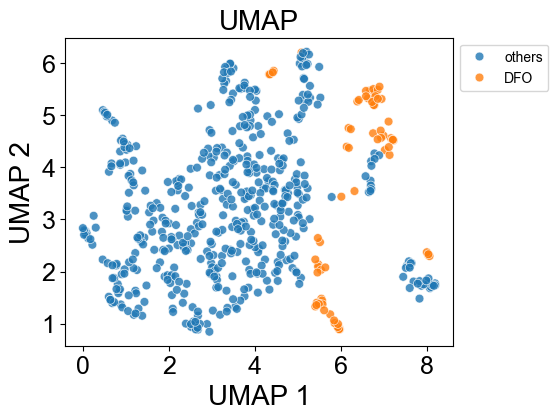

In [200]:
namestrings = ['DFO']

plot_umap2(combine.T, namestring = namestrings, figuretitle = 'UMAP')

In [29]:
pro_all 

TRYP      ALBU     FBLL1     DX39A      BACH      SMAP  \
DFO               -0.629098  1.560063 -0.052639  2.986600 -3.164628  1.673678   
Acamprosate        0.624163  0.941379  0.245700 -1.024791 -0.923974  1.185195   
Acenocoumarol      0.459005  0.081906  0.111738 -0.105770  1.101587 -0.756664   
Adenosylcobalamin -0.898440  0.512818 -0.248629 -0.060809 -0.567072  0.409324   
Aminophylline      1.330097  0.138553 -1.543070 -0.218265 -0.053726 -0.671589   
...                     ...       ...       ...       ...       ...       ...   
Troxerutin        -0.400156  0.052956 -1.302367 -0.335606  0.637187  0.235068   
Valbenazine        1.156222  0.000584  0.115570  0.700193  1.224638 -0.079198   
Vinpocetine        0.421070 -1.439986 -0.063386 -0.037180 -0.039251  1.249016   
Yohimbine          0.469899  0.143227  2.101086  0.082453 -0.195647 -0.504798   
Zaltoprofen       -1.121076  0.708065 -1.539518  3.161389 -0.145682 -0.833230   

                      PSD11     PSD12     PGRC1      DFFA  ...     RAB1B  \
DFO               -0.962388 -0.119824  1.473542  1.152320  ...  1.312462   
Acamprosate       -0.413468  1.422591  2.424608  0.889014  ...  0.283903   
Acenocoumarol      0.879547 -0.309204 -1.000588  1.151491  ...  0.073769   
Adenosylcobalamin  0.238538 -0.453544  0.197594 -0.291601  ... -0.561696   
Aminophylline     -0.235491 -0.508910 -0.860037 -1.235006  ... -0.458981   
...                     ...       ...       ...       ...  ...       ...   
Troxerutin         1.626686  1.312949  0.729660  0.391163  ... -0.854547   
Valbenazine        0.284084 -0.807369 -0.439838 -0.538900  ...  2.820195   
Vinpocetine        0.462966 -0.302540  0.047322 -1.267917  ... -0.396374   
Yohimbine         -0.550234 -0.591056 -1.125770 -0.122957  ...  0.730162   
Zaltoprofen        1.049054 -0.834478  1.044853 -3.042932  ...  0.359128   

                      H2A1C     CALM3       H12     GNAS1     SUMO4     SRSF6  \
DFO                0.233669  0.416248 -2.977887  0.803466  0.139270 -2.291159   
Acamprosate        1.798060 -0.708186  0.720977 -0.069137  0.883156 -0.726550   
Acenocoumarol     -1.477469  0.511567 -0.683114  0.626527 -0.435191  0.150437   
Adenosylcobalamin  0.110574  0.337924 -0.951219 -0.728504  1.164443 -0.273526   
Aminophylline     -0.497334 -0.216722  0.240325 -0.826706 -1.180443 -1.038919   
...                     ...       ...       ...       ...       ...       ...   
Troxerutin         0.800942  0.085950  1.765054  2.720661 -0.319048 -1.783597   
Valbenazine       -0.799952  0.036204 -1.495912 -0.594155 -0.589128 -0.445726   
Vinpocetine       -0.764779  0.572863 -0.792191 -0.391010  0.121393  0.520175   
Yohimbine         -0.250186  0.383994 -0.213941  0.118457  0.541737  0.920315   
Zaltoprofen       -2.127607 -2.531521 -0.078723 -0.071393  0.093402 -0.604263   

                      SEP11      HBG2     H2B1L  
DFO               -0.140664  1.015484  1.337646  
Acamprosate       -0.417983  1.391986  0.142421  
Acenocoumarol     -1.319875 -0.570602  1.732988  
Adenosylcobalamin  0.201295 -0.418260  0.583742  
Aminophylline     -1.288257 -0.996529 -0.764923  
...                     ...       ...       ...  
Troxerutin        -1.014519 -0.993697 -0.995982  
Valbenazine       -1.583011  0.307940 -1.321579  
Vinpocetine       -0.288311 -1.039907  0.054532  
Yohimbine         -1.602668 -0.369578 -0.845207  
Zaltoprofen       -0.773247  1.320742  3.194897  

[73 rows x 1012 columns]

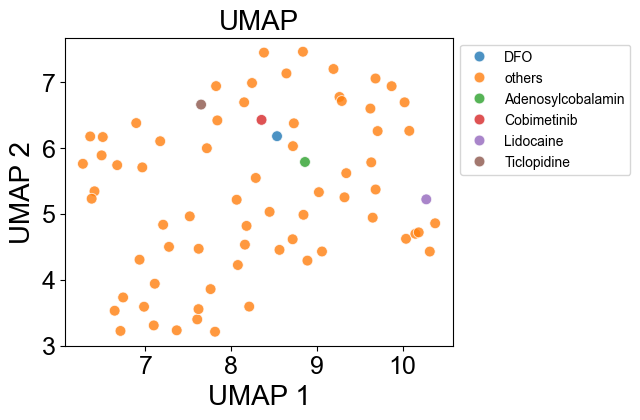

In [40]:
namestrings = ['Cobimetinib', 'Lidocaine', 'Ticlopidine', 'Adenosylcobalamin', 'DFO']

plot_umap(pro_all, namestring = namestrings, figuretitle = 'UMAP')

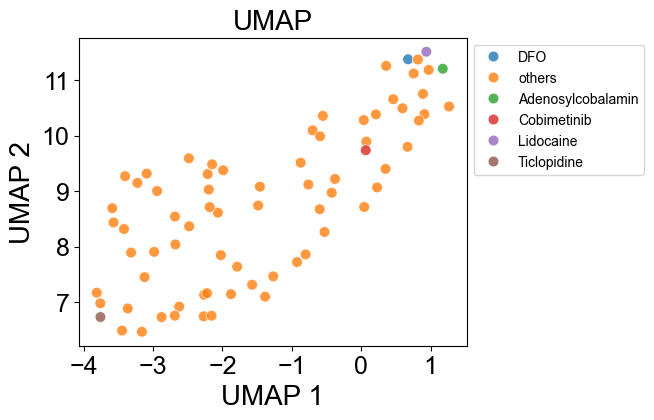

In [41]:
namestrings = ['Cobimetinib', 'Lidocaine', 'Ticlopidine', 'Adenosylcobalamin', 'DFO']

plot_umap(meta_all, namestring = namestrings, figuretitle = 'UMAP')

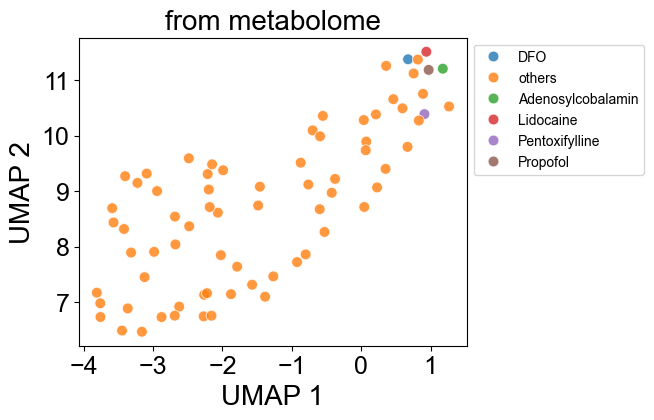

In [47]:
namestrings = ['Adenosylcobalamin', 'Lidocaine', 'Pentoxifylline', 'Propofol', 'DFO']

plot_umap(meta_all, namestring = namestrings, figuretitle = 'from metabolome')


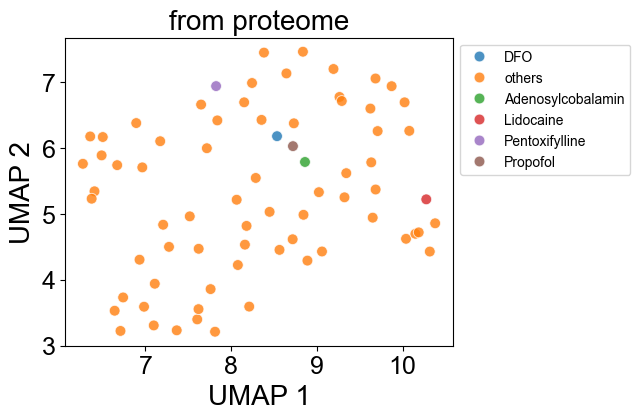

In [48]:


namestrings = ['Adenosylcobalamin', 'Lidocaine', 'Pentoxifylline', 'Propofol', 'DFO']

plot_umap(pro_all, namestring = namestrings, figuretitle = 'from proteome')


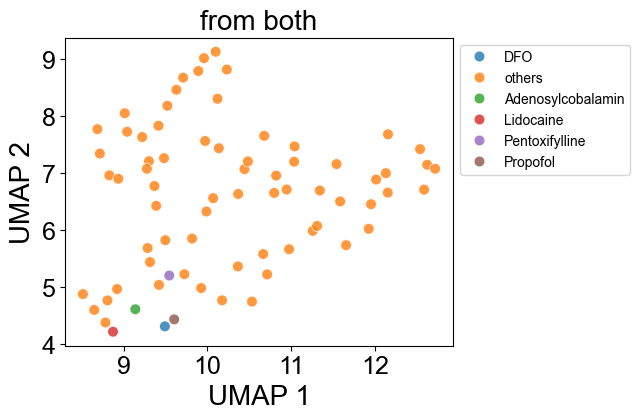

In [49]:
namestrings = ['Adenosylcobalamin', 'Lidocaine', 'Pentoxifylline', 'Propofol', 'DFO']

plot_umap(all_dual, namestring = namestrings, figuretitle = 'from both')

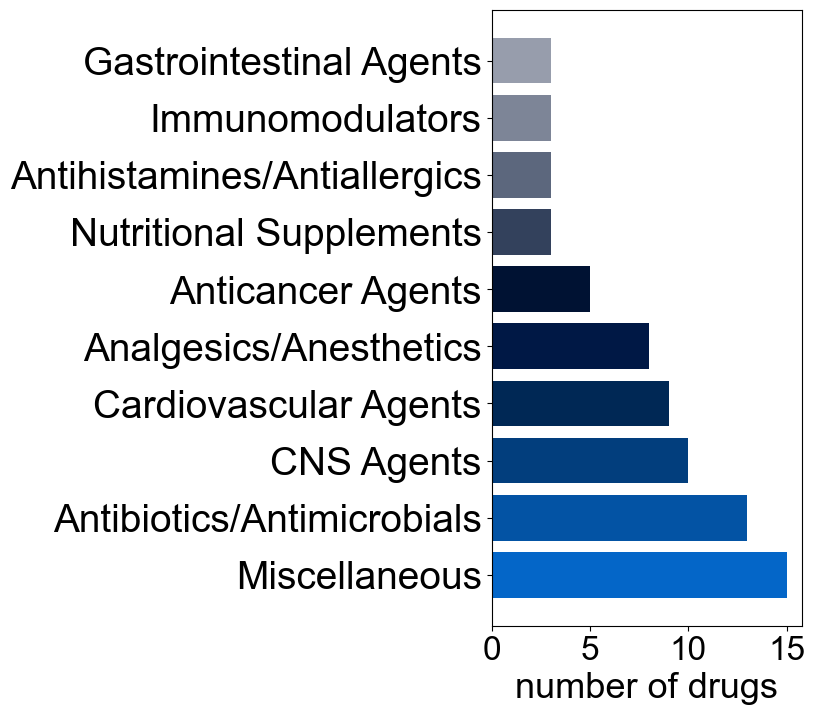

In [287]:
from collections import Counter

plt.figure(figsize=(4, 8))
plt.rcParams['font.family'] = 'Arial'
# Example list
example_list = [item.split('.')[-1] for item in df_drug_cato['cato']]

# Count the occurrences of each element in the list
count = Counter(example_list)

# Get the top 3 most common items
top_items = count.most_common(10)

# Separate the keys and values for plotting
labels, values = zip(*top_items)
# colorss = ["#437EB8", "#8EBBE7", "#D8E2EB", "white", "#D8E2EB", "#EB6CB6", "#E72998",'#0466c8', '#023e7d', '#023e7d']
colorss =["#0466c8","#0353a4","#023e7d","#002855","#001845","#001233","#33415c","#5c677d","#7d8597","#979dac"]
# Create a bar plot
plt.barh(labels, values,color = colorss)
plt.xlabel('number of drugs',fontsize = 26)
# plt.ylabel('number of drugs')
plt.xticks([0, 5, 10,15],fontsize = 24)
plt.yticks(fontsize = 28)
# plt.title('Count of Items in List')
plt.show()



In [5]:
cor_meta = pd.read_csv(r'C:\Users\jiangy5\Box\SMAD PROJECT\new_druganalysis\metabolome\test\files\metabolome_correlation.csv',index_col = 0)
cor_pro = pd.read_csv(r'C:\Users\jiangy5\Box\SMAD PROJECT\new_druganalysis\proteome\test\files\proteome_correlation.csv',index_col = 0)

In [6]:
cor_meta

DFO  Acamprosate  Acenocoumarol  Adenosylcobalamin  \
DFO                1.000000     0.221538       0.322456           0.643012   
Acamprosate        0.221538     1.000000       0.350130           0.021710   
Acenocoumarol      0.322456     0.350130       1.000000           0.055426   
Adenosylcobalamin  0.643012     0.021710       0.055426           1.000000   
Aminophylline     -0.350737     0.271040      -0.049087          -0.489417   
...                     ...          ...            ...                ...   
Troxerutin        -0.362654     0.458214      -0.025835          -0.096533   
Valbenazine       -0.464479     0.220867      -0.004453          -0.860486   
Vinpocetine       -0.339461     0.249925      -0.172510          -0.653860   
Yohimbine         -0.039947     0.720017       0.285529          -0.438409   
Zaltoprofen       -0.212127     0.499514       0.457655          -0.730596   

                   Aminophylline  Asenapine  Azithromycin  Baricitinib  \
DFO                    -0.350737  -0.036194     -0.303921    -0.346883   
Acamprosate             0.271040   0.518193     -0.008943     0.497823   
Acenocoumarol          -0.049087   0.494923      0.355155     0.142315   
Adenosylcobalamin      -0.489417  -0.663039     -0.852203    -0.815679   
Aminophylline           1.000000   0.490410      0.331334     0.658598   
...                          ...        ...           ...          ...   
Troxerutin              0.551529   0.101979     -0.202174     0.332714   
Valbenazine             0.804051   0.747637      0.723547     0.906643   
Vinpocetine             0.841851   0.569956      0.444163     0.784001   
Yohimbine               0.661043   0.802727      0.384705     0.840694   
Zaltoprofen             0.463364   0.940431      0.797567     0.909780   

                   Benzbromarone   Benzoin  ...  Thymopentin  Ticlopidine  \
DFO                     0.009299  0.204637  ...    -0.258913     0.638135   
Acamprosate             0.697327  0.170793  ...     0.124375     0.266864   
Acenocoumarol          -0.121814  0.400294  ...     0.494944     0.638822   
Adenosylcobalamin      -0.211942 -0.370802  ...    -0.795328     0.408386   
Aminophylline           0.505103  0.533035  ...     0.389509     0.117760   
...                          ...       ...  ...          ...          ...   
Troxerutin              0.645645  0.010066  ...    -0.100842    -0.006513   
Valbenazine             0.480388  0.610296  ...     0.730408    -0.084404   
Vinpocetine             0.627808  0.563942  ...     0.475946     0.016332   
Yohimbine               0.813326  0.584612  ...     0.485363     0.249122   
Zaltoprofen             0.467247  0.559625  ...     0.849303     0.082770   

                   Triclosan  Trimetazidine  Trimethoprim  Troxerutin  \
DFO                 0.356967       0.446642      0.624886   -0.362654   
Acamprosate         0.308325       0.541427      0.364332    0.458214   
Acenocoumarol       0.728456       0.116412      0.362375   -0.025835   
Adenosylcobalamin   0.320199       0.711452      0.831264   -0.096533   
Aminophylline       0.148423      -0.106279     -0.324122    0.551529   
...                      ...            ...           ...         ...   
Troxerutin          0.062187       0.462479      0.101799    1.000000   
Valbenazine        -0.089233      -0.456680     -0.647928    0.321454   
Vinpocetine        -0.099443      -0.243017     -0.494081    0.443568   
Yohimbine           0.112657       0.207800      0.007751    0.520037   
Zaltoprofen         0.071202      -0.256863     -0.304726    0.212393   

                   Valbenazine  Vinpocetine  Yohimbine  Zaltoprofen  
DFO                  -0.464479    -0.339461  -0.039947    -0.212127  
Acamprosate           0.220867     0.249925   0.720017     0.499514  
Acenocoumarol        -0.004453    -0.172510   0.285529     0.457655  
Adenosylcobalamin    -0.860486    -0.653860  -0.438409    -0.730596  
Aminophylline         0.804051     0.841851   

In [30]:
p_cor  = cor_pro.sort_values(by='DFO')
m_cor  = cor_meta.sort_values(by='DFO')

In [37]:
p_cor 

DFO  Acamprosate  Acenocoumarol  Adenosylcobalamin  \
Chlorthalidone    -0.472426    -0.351908      -0.059021          -0.365874   
Ixabepilone       -0.469825    -0.447682      -0.504225          -0.373183   
Raltegravir       -0.352647    -0.301863      -0.616767          -0.515171   
Tetrabenazine     -0.313403     0.326773      -0.428275          -0.270470   
Frovatriptan      -0.281101    -0.084365      -0.663407          -0.325746   
...                     ...          ...            ...                ...   
Cobimetinib        0.817614     0.477856       0.884327           0.758104   
Lidocaine          0.824841     0.698445       0.512957           0.596890   
Ticlopidine        0.830164     0.544539       0.794698           0.654577   
Adenosylcobalamin  0.838968     0.558432       0.621212           1.000000   
DFO                1.000000     0.606401       0.686184           0.838968   

                   Aminophylline  Asenapine  Azithromycin  Baricitinib  \
Chlorthalidone         -0.297514  -0.164389     -0.186696    -0.299145   
Ixabepilone             0.612996  -0.051969     -0.500392    -0.334131   
Raltegravir             0.388519   0.426878     -0.468566    -0.272687   
Tetrabenazine          -0.046249   0.161616     -0.502873    -0.457975   
Frovatriptan            0.548517   0.025629     -0.586949    -0.420089   
...                          ...        ...           ...          ...   
Cobimetinib            -0.059669  -0.061021      0.829400     0.573068   
Lidocaine               0.117838   0.238029      0.497250     0.359057   
Ticlopidine            -0.076344   0.242174      0.725428     0.513027   
Adenosylcobalamin       0.028695  -0.179282      0.550259     0.357733   
DFO                     0.119132   0.052479      0.645890     0.464312   

                   Benzbromarone   Benzoin  ...  Thymopentin  Ticlopidine  \
Chlorthalidone         -0.054477 -0.650850  ...    -0.442784    -0.229327   
Ixabepilone            -0.167869  0.045520  ...     0.366536    -0.678911   
Raltegravir            -0.471692  0.199792  ...     0.429578    -0.517265   
Tetrabenazine           0.207794 -0.041730  ...     0.118178    -0.182564   
Frovatriptan           -0.040438  0.418426  ...     0.669881    -0.587171   
...                          ...       ...  ...          ...          ...   
Cobimetinib             0.381265  0.374267  ...    -0.087826     0.851868   
Lidocaine               0.250852  0.524374  ...     0.245194     0.776319   
Ticlopidine             0.178019  0.220597  ...    -0.134908     1.000000   
Adenosylcobalamin       0.565933  0.507082  ...     0.221325     0.654577   
DFO                     0.350356  0.558653  ...     0.235223     0.830164   

                   Triclosan  Trimetazidine  Trimethoprim  Troxerutin  \
Chlorthalidone     -0.489946       0.302185      0.202082   -0.593650   
Ixabepilone        -0.152044      -0.376208     -0.576563    0.153514   
Raltegravir         0.230057      -0.747292     -0.647173    0.335856   
Tetrabenazine       0.091602       0.146029      0.227726    0.272439   
Frovatriptan        0.151072      -0.442178     -0.628828    0.455376   
...                      ...            ...           ...         ...   
Cobimetinib         0.341234       0.396688      0.553424    0.125811   
Lidocaine           0.746104       0.041125      0.457797    0.543414   
Ticlopidine         0.532549       0.293128      0.611308    0.126172   
Adenosylcobalamin   0.352441       0.469370      0.510855    0.306010   
DFO                 0.588015       0.223577      0.452949    0.404768   

                   Valbenazine  Vinpocetine  Yohimbine  Zaltoprofen  
Chlorthalidone       -0.508446    -0.048448  -0.662124     0.235888  
Ixabepilone           0.193053    -0.102616   0.266329    -0.600328  
Raltegravir           0.591671    -0.128178   0.385841    -0.732299  
Tetrabenazine        -0.015075    -0.109415  -0.236371    -0.154541  
Frovatriptan          0.486813    -0.208057   

In [31]:
p_cor.index[-5:]

Index(['Cobimetinib', 'Lidocaine', 'Ticlopidine', 'Adenosylcobalamin', 'DFO'], dtype='object')

In [42]:
m_cor.index[-5:]

Index(['Ticlopidine', 'Adenosylcobalamin', 'Lidocaine', 'Pentoxifylline',
       'Propofol', 'DFO'],
      dtype='object')